# 009c. ECONOMIC WORDS IN TWEETS - Sentiment Analysis

### Table of Contents 

- [009c. ECONOMIC WORDS IN TWEETS - Sentiment Analysis](#009c-economic-words-in-tweets-sentiment-analysis)
    - [Table of Contents](#table-of-contents)
  - [Sentiment of Economic Tweets using Bert-based Models](#sentiment-of-economic-tweets-using-bert-based-models)
    - [1. Preparation of data for Sentiment Analysis](#1-preparation-of-data-for-sentiment-analysis)
    - [2. Sentiment Analysis - Bert-based Models](#2-sentiment-analysis-bert-based-models)
    - [3. Loading Sentiment Models Outputs](#3-loading-sentiment-models-outputs)
    - [4. Plotting the results of Sentiments Models](#4-plotting-the-results-of-sentiments-models)
      - [Check of data quality, model quality and model selection](#check-of-data-quality-model-quality-and-model-selection)
      - [Plots:](#plots)
        - [0. After model selection checkout](#0-after-model-selection-checkout)
        - [1. Overall Party Sentiment Proportions](#1-overall-party-sentiment-proportions)
        - [2.1. Party Sentiment by Year](#21-party-sentiment-by-year)
        - [2.2. Party Sentiment before and after the election](#22-party-sentiment-before-and-after-the-election)
        - [3. Plot Overall Sentiment Over Time](#3-plot-overall-sentiment-over-time)
        - [4. Plot Sentiment by Party Over Time with Annotations](#4-plot-sentiment-by-party-over-time-with-annotations)
        - [5. Stacked Area Chart - Overall Sentiment](#5-stacked-area-chart-overall-sentiment)
        - [6.1. Sentiment Distribution for Top Users by Party (# number of tweets)](#61-sentiment-distribution-for-top-users-by-party-number-of-tweets)
        - [6.2. Sentiment Distribution for Top Users by Party (% percentage of tweets)](#62-sentiment-distribution-for-top-users-by-party-percentage-of-tweets)
        - [6.3. Sentiment Distribution for Top Users by Party (Weighted tweets)](#63-sentiment-distribution-for-top-users-by-party-weighted-tweets)
        - [7.1. Positive vs Negative Analysis (Excluding Neutral) by User (# number of tweets)](#71-positive-vs-negative-analysis-excluding-neutral-by-user-number-of-tweets)
        - [7.2. Positive vs Negative Analysis (Excluding Neutral) by User (% percentage of tweets)](#72-positive-vs-negative-analysis-excluding-neutral-by-user-percentage-of-tweets)
        - [7.3. Positive vs Negative Analysis (Excluding Neutral) by User (Weighted tweets)](#73-positive-vs-negative-analysis-excluding-neutral-by-user-weighted-tweets)
        - [8. Percentage Sentiment Change (Before vs. After Election)](#8-percentage-sentiment-change-before-vs-after-election)
        - [9. Net Sentiment Score Over Time](#9-net-sentiment-score-over-time)
        - [10. Sentiment Distribution for Top Keywords](#10-sentiment-distribution-for-top-keywords)
        - [11. Party Sentiment Distribution - Before vs After Election](#11-party-sentiment-distribution-before-vs-after-election)
        - [12. Top Keywords Sentiment Analysis by Party (Heatmap)](#12-top-keywords-sentiment-analysis-by-party-heatmap)
        - [13. Calculate and Plot Percentage Sentiment Change (Before vs After Election)](#13-calculate-and-plot-percentage-sentiment-change-before-vs-after-election)
        - [14. Combined Positive/Negative Before vs After Election](#14-combined-positivenegative-before-vs-after-election)
        - [15. Average Sentiment Score for Top Keywords by Party](#15-average-sentiment-score-for-top-keywords-by-party)


TOC GENERATION

In [5]:
# import sys
# import os

# # Add project root to sys.path
# notebook_dir = os.getcwd() 
# project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
# if project_root not in sys.path:
#     sys.path.insert(0, project_root)

# # Import TOC generator function
# from src.ToC_generator import generate_toc_from_jupyter_notebook

# target_notebook_path = "009c.EconomicWords_sentiment.ipynb" 

# toc_markdown = generate_toc_from_jupyter_notebook(target_notebook_path)

## Sentiment of Economic Tweets using Bert-based Models 

loading data

In [6]:
import pandas as pd
import numpy as np 

import gc 

# Load the Parquet file into a DataFrame
df_clean_translated = pd.read_parquet('../data/05.final/df_final_data.parquet')


# Then correctly convert token columns to lists
token_cols = ['matched_exact_econ_words_naive', 
              'matched_exact_econ_words_regex',
              'matched_exact_econ_words_flashtext', 
              'matched_exact_econ_words_ac',
              'extracted_terms_FILTERED',
              'matched_keywords_FILTERED']

for col in token_cols:
    df_clean_translated[col] = df_clean_translated[col].apply(
        lambda x: x.tolist() if isinstance(x, np.ndarray) else x
    )

def load_economic_words(csv_path):
    # Read the CSV without assuming a header row
    df = pd.read_csv(csv_path, header=None)
    # Convert the first row to a list, dropping any missing values
    words = df.iloc[0].dropna().tolist()
    # Strip extra whitespace from each word
    words = [word.strip() for word in words]
    # Remove the header element if present (e.g., 'economic_words')
    if words and words[0].lower() == 'economic_words':
        words = words[1:]
    return words

# example usage
economic_words = load_economic_words('../data/06.analysis/economic_words.csv')

# economic_words already defined earlier
print("Economic words list:", economic_words)

Economic words list: ['agricultural', 'allowance', 'bank', 'budget', 'consumer', 'credit', 'crisis', 'currency', 'debt', 'demand', 'deregulation', 'development', 'economics', 'economy', 'emissions', 'energy', 'entrepreneurs', 'equalities', 'euro', 'export', 'finance', 'fund', 'gap', 'natural gas', 'highway', 'import', 'inequalities', 'inflation', 'infrastructure', 'industry', 'innovations', 'investment', 'labour', 'macroeconomics', 'market', 'pensions', 'pricey', 'privatization', 'poverty', 'recession', 'savings', 'sector', 'stock market', 'supply', 'taxes', 'trade', 'transition', 'unemployment', 'valorization', 'VAT', 'treasury', 'state-owned companies', 'GDP', 'economic growth', 'economic development', 'economic crisis']


In [7]:
df_clean_translated.columns

Index(['created_at', 'text', 'id', 'author_id', 'edit_controls',
       'possibly_sensitive', 'reply_settings', 'lang',
       'edit_history_tweet_ids', 'conversation_id', 'category', 'attachments',
       'username', 'party', 'in_reply_to_user_id', 'context_annotations',
       'referenced_tweets', 'geo', 'text_clean', 'mentions', 'links',
       'hashtags', 'retweet_count', 'reply_count', 'like_count', 'quote_count',
       'impression_count', 'text_clean_en', 'text_clean_en_demojized',
       'text_clean_demojized', 'emoji_count_en', 'emoji_count', 'name',
       'matched_exact_econ_words_naive', 'has_exact_econ_word_naive',
       'matched_exact_econ_words_regex', 'has_exact_econ_word_regex',
       'matched_exact_econ_words_flashtext', 'has_exact_econ_word_flashtext',
       'matched_exact_econ_words_ac', 'has_exact_econ_word_ac',
       'matched_keywords_ORIG', 'has_econ_term_ORIG',
       'extracted_terms_FILTERED', 'matched_keywords_FILTERED',
       'has_econ_term_FILTERED', '

### 1. Preparation of data for Sentiment Analysis

Cropping data for sentiment analysis

What does this code do?

**Prepares Data (Step 1):**

- Filters tweets that contain economic terms using has_econ_term_FILTERED
- Selects only necessary columns for sentiment analysis
- Normalizes list columns (converts numpy arrays to Python lists)

**Cleans Text Data (Step 2):**

- Removes extra whitespace from text columns
- Trims leading/trailing spaces
- Collapses multiple spaces into single spaces
- This ensures consistent text formatting for sentiment analysis


**Saves Two Versions (Step 3):**

- df_sentiment_input.parquet: Standard version (for compatibility)
- df_sentiment_input_CLEANED.parquet: Cleaned version for external scripts

In [8]:
import pandas as pd
import numpy as np
import os
import re

# ==============================================================================
# INTEGRATED SECTION: Create and Clean df_sentiment_input for Sentiment Analysis
# ==============================================================================
# This code:
# 1. Creates a filtered subset of tweets containing economic terms
# 2. Cleans whitespace from text columns to ensure consistent formatting
# 3. Saves both regular and cleaned versions for different use cases

print("\n" + "="*60)
print("--- Creating and Cleaning df_sentiment_input for Sentiment Analysis ---")
print("="*60)

# Configuration
output_dir = '../data/05.final'
sentiment_input_filename = 'df_sentiment_input.parquet'
sentiment_cleaned_filename = 'df_sentiment_input_CLEANED.parquet'  # For external scripts

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Toggle: Set to True to force recreation even if files exist
force_recreate = False  # Change to True when you want to recreate from scratch

# Define columns to extract
essential_columns = [
    'id',                        # Tweet ID (unique identifier)
    'text_clean_en',            # Cleaned English text
    'text_clean_en_demojized'   # Cleaned English text with emojis converted to text
]

optional_columns = [
    'created_at',                # Timestamp of tweet
    'party', 
    'name',                      # Political party of author
    'username',                  # Username of author
    'matched_keywords_FILTERED', # Economic keywords found in tweet
    'extracted_terms_FILTERED'   # Economic terms extracted from tweet
]

# Columns that need list normalization and text cleaning
list_columns = ['matched_keywords_FILTERED', 'extracted_terms_FILTERED']
text_columns = ['text_clean_en', 'text_clean_en_demojized']  # Columns to clean whitespace

# Helper function to normalize list columns
def normalize_list_column(series):
    """Convert numpy arrays to Python lists, handle NaN values"""
    def convert_element(x):
        if isinstance(x, np.ndarray):
            return x.tolist()
        elif isinstance(x, list):
            return x
        else:
            return []
    return series.apply(convert_element)

# Helper function to clean text whitespace
def clean_text_whitespace(text):
    """Remove extra whitespace from text: trim and collapse multiple spaces"""
    if pd.isna(text):
        return text
    text = str(text).strip()  # Remove leading/trailing whitespace
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with single space
    return text

# STEP 1: Create df_sentiment_input
print("\nSTEP 1: Creating df_sentiment_input from df_clean_translated...")

# Filter for tweets containing economic terms
# The 'has_econ_term_FILTERED' flag indicates tweets with economic terms after filtering
df_sentiment_input = df_clean_translated[df_clean_translated['has_econ_term_FILTERED'] == True].copy()
print(f"Found {len(df_sentiment_input)} tweets with economic terms")

# Select only the columns we need
columns_to_keep = []
for col in essential_columns + optional_columns:
    if col in df_sentiment_input.columns:
        columns_to_keep.append(col)

df_sentiment_input = df_sentiment_input[columns_to_keep].copy()
print(f"Selected columns: {columns_to_keep}")

# Normalize list columns (convert numpy arrays to lists)
print("\nNormalizing list columns...")
for col in list_columns:
    if col in df_sentiment_input.columns:
        df_sentiment_input[col] = normalize_list_column(df_sentiment_input[col])
        print(f"  - Normalized: {col}")

# STEP 2: Clean text columns
print("\nSTEP 2: Cleaning whitespace in text columns...")
for col in text_columns:
    if col in df_sentiment_input.columns:
        # Apply whitespace cleaning
        df_sentiment_input[col] = df_sentiment_input[col].apply(clean_text_whitespace)
        print(f"  - Cleaned: {col}")
        
        # Show a sample to verify cleaning
        sample = df_sentiment_input[col].dropna().iloc[0] if not df_sentiment_input[col].dropna().empty else ""
        if sample:
            print(f"    Sample (first 100 chars): '{sample[:100]}...'")

# STEP 3: Save both versions
print("\nSTEP 3: Saving data files...")

# Save regular version (for backwards compatibility)
regular_path = os.path.join(output_dir, sentiment_input_filename)
try:
    df_sentiment_input.to_parquet(regular_path, index=False)
    print(f"  Saved regular version to: {regular_path}")
except Exception as e:
    print(f"  Error saving regular version: {e}")

# Save cleaned version (for external sentiment analysis scripts)
cleaned_path = os.path.join(output_dir, sentiment_cleaned_filename)
try:
    # Note: At this point, df_sentiment_input is already cleaned, so we save it directly
    df_sentiment_input.to_parquet(cleaned_path, index=False)
    print(f"  Saved cleaned version to: {cleaned_path}")
except Exception as e:
    print(f"  Error saving cleaned version: {e}")

# Display summary
print(f"\n--- Summary ---")
print(f"Total tweets for sentiment analysis: {len(df_sentiment_input)}")
print(f"Columns in dataset: {list(df_sentiment_input.columns)}")
print(f"\nData files saved to: {output_dir}")
print(f"  - Regular: {sentiment_input_filename}")
print(f"  - Cleaned: {sentiment_cleaned_filename}")


--- Creating and Cleaning df_sentiment_input for Sentiment Analysis ---

STEP 1: Creating df_sentiment_input from df_clean_translated...
Found 6073 tweets with economic terms
Selected columns: ['id', 'text_clean_en', 'text_clean_en_demojized', 'created_at', 'party', 'name', 'username', 'matched_keywords_FILTERED', 'extracted_terms_FILTERED']

Normalizing list columns...
  - Normalized: matched_keywords_FILTERED
  - Normalized: extracted_terms_FILTERED

STEP 2: Cleaning whitespace in text columns...
  - Cleaned: text_clean_en
    Sample (first 100 chars): '❌ We are a year after the elections, and Poland is sinking into crisis and anarchy. Of the promised ...'
  - Cleaned: text_clean_en_demojized
    Sample (first 100 chars): ':cross_mark: We are a year after the elections, and Poland is sinking into crisis and anarchy. Of th...'

STEP 3: Saving data files...
  Saved regular version to: ../data/05.final\df_sentiment_input.parquet
  Saved cleaned version to: ../data/05.final\df_sentiment

### 2. Sentiment Analysis - Bert-based Models

In [9]:
# %pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126
#pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

In [53]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    #print(f"Current GPU name: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.7.0+cu126
CUDA available: True
CUDA version: 12.6
Number of GPUs: 1


In [ ]:
import sys
import os

# Get the current working directory of the notebook (notebooks/)
notebook_dir = os.getcwd() 
# Get the project root directory (one level up from notebooks/)
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add the project root to sys.path if it's not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added project root to Python path: {project_root}")

from src.run_sentiment import run_sentiment_analysis

print("Successfully imported run_sentiment_analysis from src.")

# Configuration
SENTIMENT_MODELS_TO_RUN = [
    "cardiffnlp/twitter-roberta-base-sentiment-latest",
    "ProsusAI/finbert"
]

SENTIMENT_MODEL_NICKNAMES = {
    "cardiffnlp/twitter-roberta-base-sentiment-latest": "cardiffnlp",
    "ProsusAI/finbert": "finbert"
}

TEXT_COLUMNS_TO_ANALYZE = ['text_clean_en', 'text_clean_en_demojized']

TEXT_COLUMN_SUFFIXES = {
    'text_clean_en': 'emoji', 
    'text_clean_en_demojized': 'demoji'
}

# File Paths
OUTPUT_DIR = '../data/05.final'
INPUT_FILENAME = 'df_sentiment_input_CLEANED.parquet'
OUTPUT_FILENAME = 'df_sentiment_results.parquet'

# Optional: Set custom HuggingFace cache directory
HF_HOME = 'D:/Python_env/Twitter/.venv_twitter/huggingface_cache'  # Adjust as needed

# Processing Parameters
BATCH_SIZE = 32  # Adjust based on your GPU memory


print("Starting sentiment analysis...")
print(f"Input: {os.path.join(OUTPUT_DIR, INPUT_FILENAME)}")
print(f"Output: {os.path.join(OUTPUT_DIR, OUTPUT_FILENAME)}")
print(f"Models: {len(SENTIMENT_MODELS_TO_RUN)} models")
print(f"Text columns: {len(TEXT_COLUMNS_TO_ANALYZE)} columns")
print("-" * 50)

# Run the analysis
result_df = run_sentiment_analysis(
    models=SENTIMENT_MODELS_TO_RUN,
    nicknames=SENTIMENT_MODEL_NICKNAMES,
    text_cols=TEXT_COLUMNS_TO_ANALYZE,
    text_col_suffixes=TEXT_COLUMN_SUFFIXES,
    output_dir=OUTPUT_DIR,
    input_filename=INPUT_FILENAME,
    output_filename=OUTPUT_FILENAME,
    hf_home=HF_HOME,
    batch_size=BATCH_SIZE
)

if result_df is not None:
    print("\nSentiment analysis completed successfully!")
    print(f"Processed {len(result_df)} rows")
    
    # Show new columns added
    sentiment_columns = [col for col in result_df.columns if 'sentiment_' in col]
    print(f"\nAdded {len(sentiment_columns)} sentiment columns:")
    for col in sorted(sentiment_columns):
        print(f"   - {col}")
    
    # Show sentiment distribution
    print("\n--- Sentiment Distribution ---")
    for col in sentiment_columns:
        if '_label' in col:
            print(f"\n{col}:")
            counts = result_df[col].value_counts()
            for label, count in counts.items():
                print(f"  {label}: {count:,} ({count/len(result_df)*100:.1f}%)")
    
    # Show sample results
    print("\n--- Sample Results ---")
    sample_cols = ['id', 'text_clean_en'] + [col for col in sentiment_columns if '_label' in col][:2]
    result_df[sample_cols].head(3)
else:
    print("\nSentiment analysis failed! Check error messages above.")

### 3. Loading Sentiment Models Outputs

In [3]:
import pandas as pd
import os

print("\n" + "="*60)
print("--- Loading Sentiment Analysis Results ---")
print("="*60)

# Load results from sentiment analysis
results_path = '../data/05.final/df_sentiment_results.parquet'

try:
    df_sentiment_results = pd.read_parquet(results_path)
    print(f"Successfully loaded {len(df_sentiment_results):,} rows with sentiment analysis")
    print(f"Total columns: {len(df_sentiment_results.columns)}")
    
    # Show what sentiment columns were added
    sentiment_cols = [col for col in df_sentiment_results.columns if 'sentiment_' in col]
    print(f"\nSentiment columns found: {len(sentiment_cols)}")
    for col in sorted(sentiment_cols):
        print(f"  - {col}")
        
except FileNotFoundError:
    print(f"ERROR: File not found: {results_path}")
    print("Please ensure the sentiment analysis script completed successfully.")
except Exception as e:
    print(f"ERROR loading results: {e}")

print("-" * 60)


--- Loading Sentiment Analysis Results ---
Successfully loaded 6,073 rows with sentiment analysis
Total columns: 17

Sentiment columns found: 8
  - sentiment_cardiffnlp_demoji_label
  - sentiment_cardiffnlp_demoji_score
  - sentiment_cardiffnlp_emoji_label
  - sentiment_cardiffnlp_emoji_score
  - sentiment_finbert_demoji_label
  - sentiment_finbert_demoji_score
  - sentiment_finbert_emoji_label
  - sentiment_finbert_emoji_score
------------------------------------------------------------


In [4]:
df_sentiment_results

id                                      text_clean_en  \
0     1846161400328028160  ❌ We are a year after the elections, and Polan...   
1     1845725230272000256  Poland is soon to launch 49 EU-funded Foreigne...   
2     1844415548211245312  Listening to the statement of Deputy Minister ...   
3     1843984045073428992  Local government investments are crucial for r...   
4     1843740048350691584  We talked about the trends and challenges of t...   
...                   ...                                                ...   
6068  1622276457975222272  Dear Minister of Coal and Straw, if you had li...   
6069  1621767127660220416  In the majesty of the law and stealing from Po...   
6070  1618902451620573184  9th Beef Sector Forum - we met among producers...   
6071  1612071495026483200  The difference is that PKN Orlen has a 49.9% s...   
6072  1701960909369868544  This is one of the largest road investments co...   

                                text_clean_en_demojized  \
0     :cross_mark: We are a year after the elections...   
1     Poland is soon to launch 49 EU-funded Foreigne...   
2     Listening to the statement of Deputy Minister ...   
3     Local government investments are crucial for r...   
4     We talked about the trends and challenges of t...   
...                                                 ...   
6068  Dear Minister of Coal and Straw, if you had li...   
6069  In the majesty of the law and stealing from Po...   
6070  9th Beef Sector Forum - we met among producers...   
6071  The difference is that PKN Orlen has a 49.9% s...   
6072  This is one of the largest road investments co...   

                    created_at         party              name  \
0    2024-10-15 12:09:12+00:00  Konfederacja   Bartłomiej Pejo   
1    2024-10-14 07:16:01+00:00  Konfederacja   Bartłomiej Pejo   
2    2024-10-10 16:31:48+00:00  Konfederacja   Bartłomiej Pejo   
3    2024-10-09 11:57:10+00:00  Konfederacja   Bartłomiej Pejo   
4    2024-10-08 19:47:37+00:00  Konfederacja   Bartłomiej Pejo   
...                        ...           ...               ...   
6068 2023-02-05 16:50:22+00:00           PSL  Stefan Krajewski   
6069 2023-02-04 07:06:28+00:00           PSL  Stefan Krajewski   
6070 2023-01-27 09:23:16+00:00           PSL  Stefan Krajewski   
6071 2023-01-08 12:59:29+00:00           PSL  Stefan Krajewski   
6072 2023-09-13 14:07:56+00:00           PSL      Adam Struzik   

             username        matched_keywords_FILTERED  \
0      bartlomiejpejo                 [crisis, demand]   
1      bartlomiejpejo                           [fund]   
2      bartlomiejpejo                           [fund]   
3      bartlomiejpejo                     [investment]   
4      bartlomiejpejo                         [market]   
...               ...                              ...   
6068  StefanKrajewski                 [import, market]   
6069  StefanKrajewski  [energy, state-owned companies]   
6070  StefanKrajewski                         [sector]   
6071  StefanKrajewski                       [treasury]   
6072      StruzikAdam                     [investment]   

             extracted_terms_FILTERED sentiment_cardiffnlp_emoji_label  \
0                   [crisis, demands]                         Negative   
1                            [funded]                          Neutral   
2                             [funds]                          Neutral   
3                       [investments]                          Neutral   
4                            [market]                         Positive   
...                               ...                              ...   
6068               [imported, market]                         Negative   
6069  [energy, state-owned companies]                         Negative   
6070                         [Sector]                         Positive   
6071                       [Treasury]                          Neutral   
6072                    [investments]            

Clean List Columns for Visualization

In [5]:
import re
import numpy as np

print("\n" + "="*60)
print("--- Preparing Data for Visualization ---")
print("="*60)

def clean_list_column(value):
    """
    Convert various formats to clean Python lists.
    Handles: actual lists, numpy arrays, string representations, and NaN values.
    """
    # Already a list
    if isinstance(value, list):
        return value
    
    # Numpy array
    if isinstance(value, np.ndarray):
        return value.tolist()
    
    # Missing value
    if pd.isna(value):
        return []
    
    # String representation of list
    if isinstance(value, str):
        # Extract items between quotes
        items = re.findall(r"'([^']+)'", value)
        return items if items else []
    
    # Default
    return []

# Apply cleaning to list columns
list_columns = ['extracted_terms_FILTERED', 'matched_keywords_FILTERED']

for col in list_columns:
    if col in df_sentiment_results.columns:
        df_sentiment_results[col] = df_sentiment_results[col].apply(clean_list_column)
        print(f"Cleaned column: {col}")
        
        # Show example
        non_empty = df_sentiment_results[df_sentiment_results[col].apply(len) > 0][col].iloc[0]
        print(f"  Example: {non_empty}")

print("\nData ready for visualization!")
print(f"Final shape: {df_sentiment_results.shape}")

# Quick preview
print("\nPreview of cleaned data:")
preview_cols = ['id', 'text_clean_en'] + list_columns[:1] + [col for col in df_sentiment_results.columns if 'sentiment_' in col and '_label' in col][:2]
preview_cols = [col for col in preview_cols if col in df_sentiment_results.columns]
df_sentiment_results[preview_cols].head(3)

print("-" * 60)


--- Preparing Data for Visualization ---
Cleaned column: extracted_terms_FILTERED
  Example: ['crisis', 'demands']
Cleaned column: matched_keywords_FILTERED
  Example: ['crisis', 'demand']

Data ready for visualization!
Final shape: (6073, 17)

Preview of cleaned data:
------------------------------------------------------------


Quick Data Quality Check

In [6]:
print("\n" + "="*60)
print("--- Data Quality Check ---")
print("="*60)

# Check for any missing sentiment values
sentiment_label_cols = [col for col in df_sentiment_results.columns if 'sentiment_' in col and '_label' in col]

print("Checking for missing sentiment labels:")
for col in sentiment_label_cols:
    missing = df_sentiment_results[col].isna().sum()
    error_count = (df_sentiment_results[col] == 'ERROR').sum()
    print(f"  {col}: {missing} missing, {error_count} errors")

# Check list columns
print("\nList columns summary:")
for col in list_columns:
    if col in df_sentiment_results.columns:
        lengths = df_sentiment_results[col].apply(len)
        print(f"  {col}:")
        print(f"    - Rows with items: {(lengths > 0).sum():,}")
        print(f"    - Average items per row: {lengths.mean():.1f}")
        print(f"    - Max items in a row: {lengths.max()}")

print("\nData is ready for visualization and analysis!")
print(f"Access data using: df_sentiment_results")
print("-" * 60)


--- Data Quality Check ---
Checking for missing sentiment labels:
  sentiment_cardiffnlp_emoji_label: 0 missing, 0 errors
  sentiment_finbert_emoji_label: 0 missing, 0 errors
  sentiment_cardiffnlp_demoji_label: 0 missing, 0 errors
  sentiment_finbert_demoji_label: 0 missing, 0 errors

List columns summary:
  extracted_terms_FILTERED:
    - Rows with items: 6,073
    - Average items per row: 1.4
    - Max items in a row: 6
  matched_keywords_FILTERED:
    - Rows with items: 6,073
    - Average items per row: 1.3
    - Max items in a row: 6

Data is ready for visualization and analysis!
Access data using: df_sentiment_results
------------------------------------------------------------


After running these cells, you'll have df_sentiment_results ready for creating visualizations with properly formatted data.

### 4. Plotting the results of Sentiments Models

#### Check of data quality, model quality and model selection

In [7]:
import pandas as pd 

print("\n" + "="*60)
print("--- Analyzing Value Counts for All Sentiment Predictions ---")
print("="*60)

if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame) and not df_sentiment_results.empty:
    # Define all 4 label columns generated by Section 12.B
    label_columns_generated = [
        'sentiment_cardiffnlp_emoji_label', 'sentiment_cardiffnlp_demoji_label',
        'sentiment_finbert_emoji_label',  'sentiment_finbert_demoji_label'
    ]
    
    found_label_cols = []
    all_cols_found = True
    for col in label_columns_generated:
        if col in df_sentiment_results.columns:
            print(f"\n--- Value Counts for: {col} ---")
            # Display counts including missing values (NaN) if any
            print(df_sentiment_results[col].value_counts(dropna=False)) 
            found_label_cols.append(col)
        else:
            print(f"\nWARNING: Label column '{col}' not found in DataFrame.")
            all_cols_found = False
            
    if not found_label_cols:
         print("\nERROR: No sentiment label columns found to analyze.")
    elif not all_cols_found:
         print("\nWARNING: Not all expected sentiment label columns were found.")
         
else:
    print("ERROR: df_sentiment_results is not available or empty.")

print("\n" + "="*60)
print("--- Value Count Analysis Complete ---")
print("="*60)


--- Analyzing Value Counts for All Sentiment Predictions ---

--- Value Counts for: sentiment_cardiffnlp_emoji_label ---
sentiment_cardiffnlp_emoji_label
Negative    2157
Neutral     2143
Positive    1773
Name: count, dtype: int64

--- Value Counts for: sentiment_cardiffnlp_demoji_label ---
sentiment_cardiffnlp_demoji_label
Negative    2216
Neutral     2200
Positive    1657
Name: count, dtype: int64

--- Value Counts for: sentiment_finbert_emoji_label ---
sentiment_finbert_emoji_label
Neutral     4484
Negative    1021
Positive     568
Name: count, dtype: int64

--- Value Counts for: sentiment_finbert_demoji_label ---
sentiment_finbert_demoji_label
Neutral     4531
Negative    1031
Positive     511
Name: count, dtype: int64

--- Value Count Analysis Complete ---


In [8]:
import pandas as pd
import numpy as np

print("\n" + "="*60)
print("--- Comparing Model Predictions (Crosstabs) ---")
print("="*60)

try:
    import tabulate
    markdown_possible = True
except ImportError:
    print("INFO: 'tabulate' package not found. Using plain text output.")
    markdown_possible = False

if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame):
    
    comparison_pairs = [
        ('sentiment_cardiffnlp_demoji_label', 'sentiment_finbert_demoji_label'),
        ('sentiment_cardiffnlp_emoji_label', 'sentiment_finbert_emoji_label'),
        ('sentiment_cardiffnlp_emoji_label', 'sentiment_cardiffnlp_demoji_label'),
        ('sentiment_finbert_emoji_label', 'sentiment_finbert_demoji_label')
    ]

    for col1, col2 in comparison_pairs:
        print(f"\n--- {col1} vs {col2} ---")
        if col1 in df_sentiment_results.columns and col2 in df_sentiment_results.columns:
            
            crosstab = pd.crosstab(df_sentiment_results[col1], df_sentiment_results[col2], margins=True)
            
            if markdown_possible:
                print(crosstab.to_markdown())
            else:
                print(crosstab.to_string())
                
            # Calculate agreement
            agreement = (df_sentiment_results[col1] == df_sentiment_results[col2]).sum()
            total = len(df_sentiment_results)
            print(f"\nAgreement: {agreement:,}/{total:,} ({agreement/total*100:.1f}%)")
        else:
            print(f"ERROR: Missing columns for comparison")
        print("-" * 60)
else:
    print("ERROR: df_sentiment_results not available")

print("-" * 60)


--- Comparing Model Predictions (Crosstabs) ---

--- sentiment_cardiffnlp_demoji_label vs sentiment_finbert_demoji_label ---
| sentiment_cardiffnlp_demoji_label   |   Negative |   Neutral |   Positive |   All |
|:------------------------------------|-----------:|----------:|-----------:|------:|
| Negative                            |        907 |      1284 |         25 |  2216 |
| Neutral                             |        107 |      1978 |        115 |  2200 |
| Positive                            |         17 |      1269 |        371 |  1657 |
| All                                 |       1031 |      4531 |        511 |  6073 |

Agreement: 3,256/6,073 (53.6%)
------------------------------------------------------------

--- sentiment_cardiffnlp_emoji_label vs sentiment_finbert_emoji_label ---
| sentiment_cardiffnlp_emoji_label   |   Negative |   Neutral |   Positive |   All |
|:-----------------------------------|-----------:|----------:|-----------:|------:|
| Negative          

Score Distribution - quality of the model check


--- Analyzing Score Distributions ---


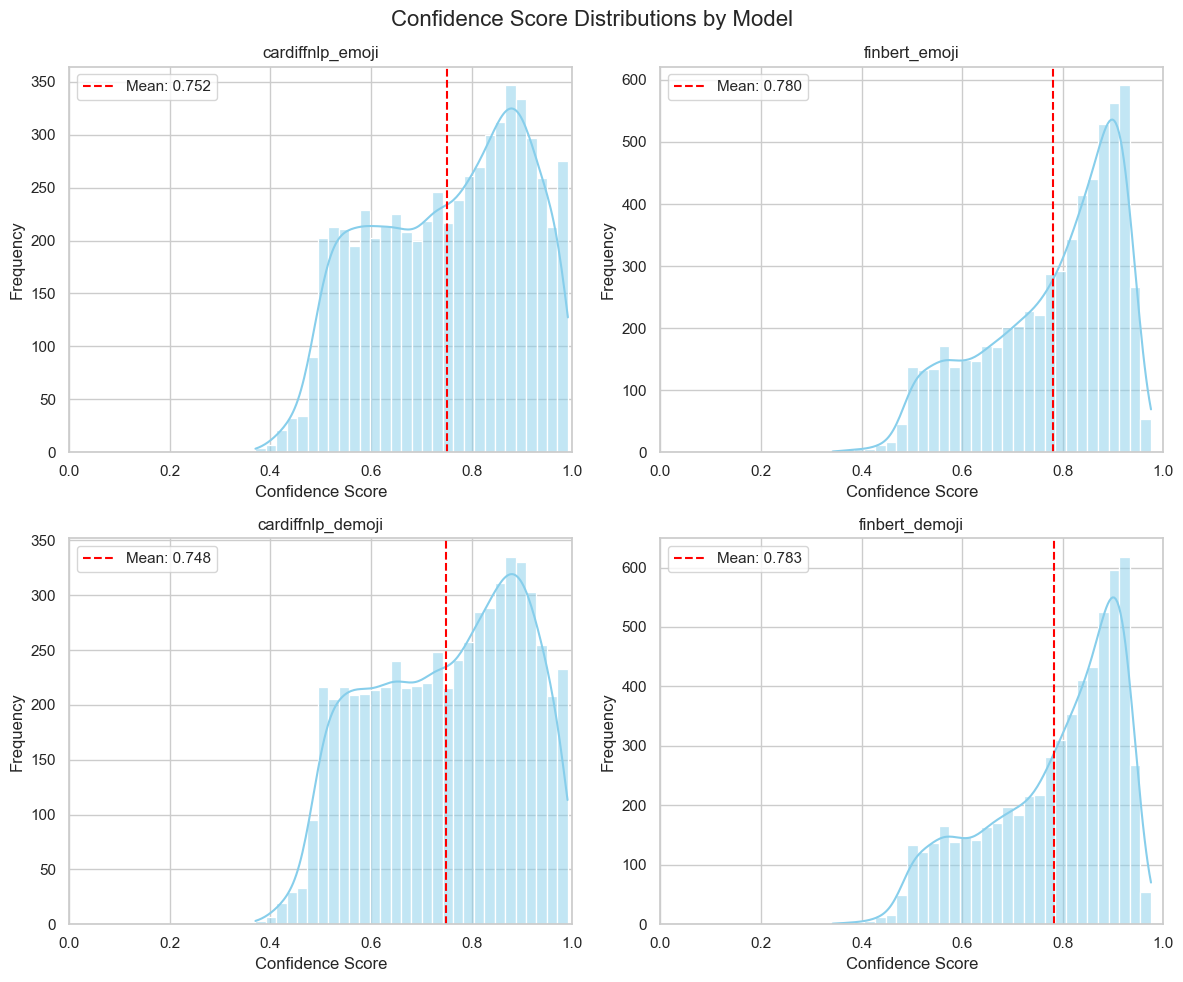


Score Statistics:

sentiment_cardiffnlp_emoji_score:
  Mean: 0.752
  Std: 0.149
  Min: 0.370
  Max: 0.991

sentiment_finbert_emoji_score:
  Mean: 0.780
  Std: 0.132
  Min: 0.343
  Max: 0.975

sentiment_cardiffnlp_demoji_score:
  Mean: 0.748
  Std: 0.147
  Min: 0.370
  Max: 0.990

sentiment_finbert_demoji_score:
  Mean: 0.783
  Std: 0.131
  Min: 0.343
  Max: 0.975
------------------------------------------------------------


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*60)
print("--- Analyzing Score Distributions ---")
print("="*60)

sns.set(style="whitegrid")

if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame):
    
    # Get all score columns
    score_columns = [col for col in df_sentiment_results.columns if col.endswith('_score') and 'sentiment_' in col]
    
    if score_columns:
        num_cols = len(score_columns)
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.flatten()
        
        for i, col in enumerate(score_columns[:4]):
            ax = axes[i]
            data = df_sentiment_results[col].dropna()
            
            sns.histplot(data, kde=True, bins=30, ax=ax, color='skyblue')
            ax.set_title(f'{col.replace("sentiment_", "").replace("_score", "")}')
            ax.set_xlabel('Confidence Score')
            ax.set_ylabel('Frequency')
            ax.set_xlim(0, 1)
            
            # Add mean line
            mean_score = data.mean()
            ax.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.3f}')
            ax.legend()
        
        plt.suptitle('Confidence Score Distributions by Model', fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        print("\nScore Statistics:")
        for col in score_columns:
            scores = df_sentiment_results[col].dropna()
            print(f"\n{col}:")
            print(f"  Mean: {scores.mean():.3f}")
            print(f"  Std: {scores.std():.3f}")
            print(f"  Min: {scores.min():.3f}")
            print(f"  Max: {scores.max():.3f}")
    else:
        print("No score columns found")
else:
    print("ERROR: df_sentiment_results not available")

print("-" * 60)

In [58]:
df_sentiment_results

id                                      text_clean_en  \
0     1846161400328028160  ❌ We are a year after the elections, and Polan...   
1     1845725230272000256  Poland is soon to launch 49 EU-funded Foreigne...   
2     1844415548211245312  Listening to the statement of Deputy Minister ...   
3     1843984045073428992  Local government investments are crucial for r...   
4     1843740048350691584  We talked about the trends and challenges of t...   
...                   ...                                                ...   
6068  1622276457975222272  Dear Minister of Coal and Straw, if you had li...   
6069  1621767127660220416  In the majesty of the law and stealing from Po...   
6070  1618902451620573184  9th Beef Sector Forum - we met among producers...   
6071  1612071495026483200  The difference is that PKN Orlen has a 49.9% s...   
6072  1701960909369868544  This is one of the largest road investments co...   

                                text_clean_en_demojized  \
0     :cross_mark: We are a year after the elections...   
1     Poland is soon to launch 49 EU-funded Foreigne...   
2     Listening to the statement of Deputy Minister ...   
3     Local government investments are crucial for r...   
4     We talked about the trends and challenges of t...   
...                                                 ...   
6068  Dear Minister of Coal and Straw, if you had li...   
6069  In the majesty of the law and stealing from Po...   
6070  9th Beef Sector Forum - we met among producers...   
6071  The difference is that PKN Orlen has a 49.9% s...   
6072  This is one of the largest road investments co...   

                    created_at         party              name  \
0    2024-10-15 12:09:12+00:00  Konfederacja   Bartłomiej Pejo   
1    2024-10-14 07:16:01+00:00  Konfederacja   Bartłomiej Pejo   
2    2024-10-10 16:31:48+00:00  Konfederacja   Bartłomiej Pejo   
3    2024-10-09 11:57:10+00:00  Konfederacja   Bartłomiej Pejo   
4    2024-10-08 19:47:37+00:00  Konfederacja   Bartłomiej Pejo   
...                        ...           ...               ...   
6068 2023-02-05 16:50:22+00:00           PSL  Stefan Krajewski   
6069 2023-02-04 07:06:28+00:00           PSL  Stefan Krajewski   
6070 2023-01-27 09:23:16+00:00           PSL  Stefan Krajewski   
6071 2023-01-08 12:59:29+00:00           PSL  Stefan Krajewski   
6072 2023-09-13 14:07:56+00:00           PSL      Adam Struzik   

             username        matched_keywords_FILTERED  \
0      bartlomiejpejo                 [crisis, demand]   
1      bartlomiejpejo                           [fund]   
2      bartlomiejpejo                           [fund]   
3      bartlomiejpejo                     [investment]   
4      bartlomiejpejo                         [market]   
...               ...                              ...   
6068  StefanKrajewski                 [import, market]   
6069  StefanKrajewski  [energy, state-owned companies]   
6070  StefanKrajewski                         [sector]   
6071  StefanKrajewski                       [treasury]   
6072      StruzikAdam                     [investment]   

             extracted_terms_FILTERED sentiment_cardiffnlp_emoji_label  \
0                   [crisis, demands]                         Negative   
1                            [funded]                          Neutral   
2                             [funds]                          Neutral   
3                       [investments]                          Neutral   
4                            [market]                         Positive   
...                               ...                              ...   
6068               [imported, market]                         Negative   
6069  [energy, state-owned companies]                         Negative   
6070                         [Sector]                         Positive   
6071                       [Treasury]                          Neutral   
6072                    [investments]            

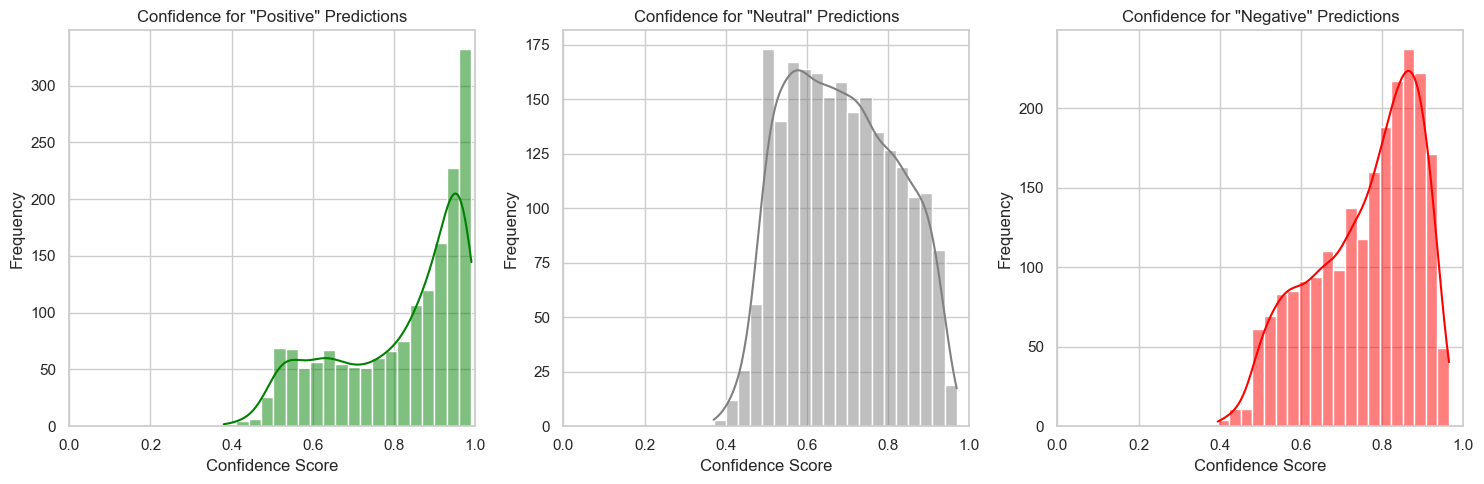

In [ ]:
plt.figure(figsize=(15, 5))

# Positive Score Distribution
plt.subplot(1, 3, 1)
positive_scores = df_sentiment_results[df_sentiment_results['final_sentiment_label'] == 'Positive']['final_sentiment_score']
sns.histplot(positive_scores, kde=True, bins=20, color='green')
plt.title('Confidence for "Positive" Predictions')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.xlim(0, 1)

# Neutral Score Distribution
plt.subplot(1, 3, 2)
neutral_scores = df_sentiment_results[df_sentiment_results['final_sentiment_label'] == 'Neutral']['final_sentiment_score']
sns.histplot(neutral_scores, kde=True, bins=20, color='grey')
plt.title('Confidence for "Neutral" Predictions')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.xlim(0, 1)

# Negative Score Distribution
plt.subplot(1, 3, 3)
negative_scores = df_sentiment_results[df_sentiment_results['final_sentiment_label'] == 'Negative']['final_sentiment_score']
sns.histplot(negative_scores, kde=True, bins=20, color='red')
plt.title('Confidence for "Negative" Predictions')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

Detailed Manual Inspection

In [10]:
# print("\n" + "="*60)
# print("--- Detailed Entry Inspection ---")
# print("="*60)

# if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame):
    
#     # Sample some entries for detailed inspection
#     print("Random sample of 5 entries with all sentiment predictions:\n")
    
#     # Get sentiment columns
#     label_cols = [col for col in df_sentiment_results.columns if col.endswith('_label') and 'sentiment_' in col]
#     score_cols = [col for col in df_sentiment_results.columns if col.endswith('_score') and 'sentiment_' in col]
    
#     # Sample entries
#     sample_df = df_sentiment_results.sample(n=5, random_state=42)
    
#     for idx, row in sample_df.iterrows():
#         print(f"Entry {idx}:")
#         print(f"Text: {row['text_clean_en'][:100]}...")
#         print("\nPredictions:")
        
#         for label_col in sorted(label_cols):
#             score_col = label_col.replace('_label', '_score')
#             if score_col in df_sentiment_results.columns:
#                 model_name = label_col.replace('sentiment_', '').replace('_label', '')
#                 label = row[label_col]
#                 score = row[score_col]
#                 print(f"  {model_name}: {label} (confidence: {score:.3f})")
        
#         print("-" * 80)
    
#     # Show disagreement cases
#     print("\n\nExamples where models strongly disagree:")
    
#     # Find cases where cardiffnlp and finbert disagree
#     cardiff_col = 'sentiment_cardiffnlp_demoji_label'
#     finbert_col = 'sentiment_finbert_demoji_label'
    
#     if cardiff_col in df_sentiment_results.columns and finbert_col in df_sentiment_results.columns:
#         disagreements = df_sentiment_results[
#             df_sentiment_results[cardiff_col] != df_sentiment_results[finbert_col]
#         ]
        
#         print(f"\nFound {len(disagreements)} disagreements between CardiffNLP and FinBERT (demoji)")
        
#         # Show a few examples
#         for idx, row in disagreements.head(3).iterrows():
#             print(f"\nText: {row['text_clean_en'][:150]}...")
#             print(f"CardiffNLP: {row[cardiff_col]} ({row['sentiment_cardiffnlp_demoji_score']:.3f})")
#             print(f"FinBERT: {row[finbert_col]} ({row['sentiment_finbert_demoji_score']:.3f})")
#             print("-" * 40)
    
# else:
#     print("ERROR: df_sentiment_results not available")

# print("-" * 60)

Model Performance Comparison

In [11]:
print("\n" + "="*60)
print("--- Model Performance Comparison ---")
print("="*60)

if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame):
    
    # Analyze confidence scores by model
    models_info = []
    
    label_cols = [col for col in df_sentiment_results.columns if col.endswith('_label') and 'sentiment_' in col]
    
    for label_col in label_cols:
        score_col = label_col.replace('_label', '_score')
        if score_col in df_sentiment_results.columns:
            model_name = label_col.replace('sentiment_', '').replace('_label', '')
            
            # Get label distribution
            label_dist = df_sentiment_results[label_col].value_counts()
            
            # Get average confidence by label
            avg_conf_by_label = df_sentiment_results.groupby(label_col)[score_col].mean()
            
            # Overall metrics
            avg_confidence = df_sentiment_results[score_col].mean()
            high_conf_count = (df_sentiment_results[score_col] > 0.8).sum()
            low_conf_count = (df_sentiment_results[score_col] < 0.5).sum()
            
            models_info.append({
                'Model': model_name,
                'Avg Confidence': avg_confidence,
                'High Conf (>0.8)': high_conf_count,
                'Low Conf (<0.5)': low_conf_count,
                'Most Common Label': label_dist.index[0],
                'Label Distribution': label_dist.to_dict()
            })
    
    # Display comparison
    comparison_df = pd.DataFrame(models_info)
    print("Model Comparison Summary:")
    print(comparison_df.to_string())
    
    # Recommendation based on analysis
    print("\n\n--- RECOMMENDATION ---")
    print("\nBased on the analysis, here are the key differences:")
    
    print("\n1. MODEL COMPARISON:")
    print("   - CardiffNLP: Trained on Twitter data, more balanced sentiment distribution")
    print("   - FinBERT: Trained on financial text, tends to predict more Neutral")
    
    print("\n2. EMOJI vs DEMOJI:")
    print("   - emoji: Keeps emojis as visual symbols")
    print("   - demoji: Converts emojis to text descriptions")
    
    # Find model with highest average confidence
    best_confidence_idx = comparison_df['Avg Confidence'].idxmax()
    best_model = comparison_df.loc[best_confidence_idx, 'Model']
    
    print(f"\n3. HIGHEST AVERAGE CONFIDENCE: {best_model}")
    print(f"   Average confidence: {comparison_df.loc[best_confidence_idx, 'Avg Confidence']:.3f}")
    
    # Specific recommendation
    print("\n4. RECOMMENDED MODEL:")
    print("   For Twitter economic sentiment analysis, consider:")
    print("   - 'sentiment_cardiffnlp_demoji_label' if you want balanced sentiment detection")
    print("   - 'sentiment_finbert_demoji_label' if you prefer conservative/neutral classifications")
    
else:
    print("ERROR: df_sentiment_results not available")

print("-" * 60)


--- Model Performance Comparison ---
Model Comparison Summary:
               Model  Avg Confidence  High Conf (>0.8)  Low Conf (<0.5) Most Common Label                                     Label Distribution
0   cardiffnlp_emoji        0.751589              2667              246          Negative  {'Negative': 2157, 'Neutral': 2143, 'Positive': 1773}
1      finbert_emoji        0.780043              3286              147           Neutral   {'Neutral': 4484, 'Negative': 1021, 'Positive': 568}
2  cardiffnlp_demoji        0.747966              2604              248          Negative  {'Negative': 2216, 'Neutral': 2200, 'Positive': 1657}
3     finbert_demoji        0.782737              3345              153           Neutral   {'Neutral': 4531, 'Negative': 1031, 'Positive': 511}


--- RECOMMENDATION ---

Based on the analysis, here are the key differences:

1. MODEL COMPARISON:
   - CardiffNLP: Trained on Twitter data, more balanced sentiment distribution
   - FinBERT: Trained on financ

Model selection

In [12]:
# Cell 5: Select Final Model and Create Final Column
print("\n" + "="*60)
print("--- Selecting Final Sentiment Model ---")
print("="*60)

# Choose your model here based on the analysis above
CHOSEN_MODEL = 'sentiment_cardiffnlp_demoji_label'  # Change this based on your preference

if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame):
    
    if CHOSEN_MODEL in df_sentiment_results.columns:
        # Create final sentiment column
        df_sentiment_results['final_sentiment_label'] = df_sentiment_results[CHOSEN_MODEL]
        
        # Also copy the corresponding score
        score_col = CHOSEN_MODEL.replace('_label', '_score')
        if score_col in df_sentiment_results.columns:
            df_sentiment_results['final_sentiment_score'] = df_sentiment_results[score_col]
        
        print(f"Selected model: {CHOSEN_MODEL}")
        print("\nFinal sentiment distribution:")
        print(df_sentiment_results['final_sentiment_label'].value_counts())
        print(f"\nTotal entries: {len(df_sentiment_results):,}")
        
        # Show percentage distribution
        print("\nPercentage distribution:")
        pct_dist = df_sentiment_results['final_sentiment_label'].value_counts(normalize=True) * 100
        for label, pct in pct_dist.items():
            print(f"  {label}: {pct:.1f}%")
        
        # Save the results with final labels
        output_path = '../data/05.final/df_sentiment_final.parquet'
        df_sentiment_results.to_parquet(output_path, index=False)
        print(f"\nSaved final results to: {output_path}")
        
    else:
        print(f"ERROR: Chosen model column '{CHOSEN_MODEL}' not found")
        print("Available options:")
        for col in df_sentiment_results.columns:
            if col.endswith('_label') and 'sentiment_' in col:
                print(f"  - {col}")
else:
    print("ERROR: df_sentiment_results not available")

print("-" * 60)


--- Selecting Final Sentiment Model ---
Selected model: sentiment_cardiffnlp_demoji_label

Final sentiment distribution:
final_sentiment_label
Negative    2216
Neutral     2200
Positive    1657
Name: count, dtype: int64

Total entries: 6,073

Percentage distribution:
  Negative: 36.5%
  Neutral: 36.2%
  Positive: 27.3%

Saved final results to: ../data/05.final/df_sentiment_final.parquet
------------------------------------------------------------


#### Plots:

##### 0.1. After model selection checkout


--- Final Sentiment Analysis Visualization ---


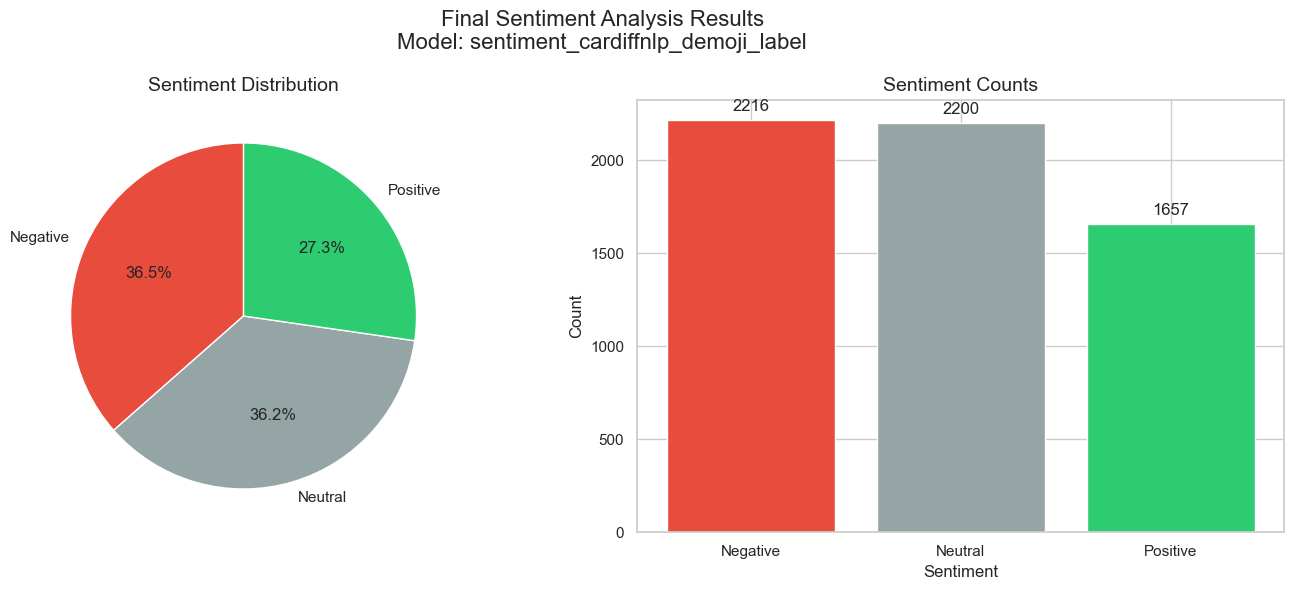


Analysis complete! Final sentiment labels are in the 'final_sentiment_label' column.
------------------------------------------------------------


In [13]:
# Cell 6: Visualize Final Results
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*60)
print("--- Final Sentiment Analysis Visualization ---")
print("="*60)

if 'df_sentiment_results' in locals() and 'final_sentiment_label' in df_sentiment_results.columns:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Pie chart
    sentiment_counts = df_sentiment_results['final_sentiment_label'].value_counts()
    colors = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}
    pie_colors = [colors.get(label, '#34495e') for label in sentiment_counts.index]
    
    ax1.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
            colors=pie_colors, startangle=90)
    ax1.set_title('Sentiment Distribution', fontsize=14)
    
    # Bar chart with counts
    ax2.bar(sentiment_counts.index, sentiment_counts.values, color=pie_colors)
    ax2.set_xlabel('Sentiment', fontsize=12)
    ax2.set_ylabel('Count', fontsize=12)
    ax2.set_title('Sentiment Counts', fontsize=14)
    
    # Add count labels on bars
    for i, (label, count) in enumerate(sentiment_counts.items()):
        ax2.text(i, count + 50, str(count), ha='center')
    
    plt.suptitle(f'Final Sentiment Analysis Results\nModel: {CHOSEN_MODEL}', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    print("\nAnalysis complete! Final sentiment labels are in the 'final_sentiment_label' column.")
    
else:
    print("ERROR: Final sentiment label not created. Run the previous cell first.")

print("-" * 60)

##### 0.2. After model selection checkout - paper graphs

In [14]:
# ==================================================================================
# PLOT 2: SEPARATE PIE AND BAR CHARTS WITH CUSTOM TITLE
# ==================================================================================

def plot_sentiment_distribution_paper(df, 
                                    pie_title="Overall Sentiment Distribution of Economic Tweets",
                                    bar_title="Sentiment Classification Results",
                                    subtitle="Economic Discourse on Polish Political Twitter"):
    """
    Create separate pie and bar charts for sentiment distribution with custom titles
    """
    import matplotlib.pyplot as plt
    
    print("\n" + "="*60)
    print("--- Sentiment Distribution Analysis ---")
    print("="*60)
    
    if 'final_sentiment_label' not in df.columns:
        print("ERROR: 'final_sentiment_label' column not found")
        return
    
    sentiment_counts = df['final_sentiment_label'].value_counts()
    colors = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}
    pie_colors = [colors.get(label, '#34495e') for label in sentiment_counts.index]
    
    # Create summary table data
    total = sentiment_counts.sum()
    summary_data = []
    for sentiment, count in sentiment_counts.items():
        percentage = (count / total) * 100
        summary_data.append({
            'Sentiment': sentiment,
            'Count': count,
            'Percentage': f"{percentage:.1f}%"
        })
    
    # PLOT 2A: Pie Chart
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    
    wedges, texts, autotexts = ax1.pie(sentiment_counts.values, 
                                        labels=sentiment_counts.index, 
                                        autopct='%1.1f%%',
                                        colors=pie_colors, 
                                        startangle=90,
                                        textprops={'fontsize': 12})
    
    for autotext in autotexts:
        autotext.set_fontweight('bold')
        autotext.set_color('white')
    
    ax1.set_title(pie_title, fontsize=16, pad=20, fontweight='bold')
    if subtitle:
        ax1.text(0.5, -0.1, subtitle, transform=ax1.transAxes, 
                ha='center', fontsize=12, style='italic')
    
    plt.tight_layout()
    plt.show()
    
    # PLOT 2B: Bar Chart
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    
    bars = ax2.bar(sentiment_counts.index, sentiment_counts.values, 
                    color=pie_colors, edgecolor='black', linewidth=1.5)
    
    ax2.set_xlabel('Sentiment Category', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Number of Tweets', fontsize=14, fontweight='bold')
    ax2.set_title(bar_title, fontsize=16, pad=20, fontweight='bold')
    if subtitle:
        ax2.text(0.5, -0.15, subtitle, transform=ax2.transAxes, 
                ha='center', fontsize=12, style='italic')
    
    # Add count labels on bars
    for bar, count in zip(bars, sentiment_counts.values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 50,
                f'{count:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Add percentage labels inside bars
    for bar, count in zip(bars, sentiment_counts.values):
        height = bar.get_height()
        percentage = (count / total) * 100
        ax2.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{percentage:.1f}%', ha='center', va='center', 
                fontsize=11, color='white', fontweight='bold')
    
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_ylim(0, max(sentiment_counts.values) * 1.1)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary table
    print("\nTable 1: Sentiment Distribution Summary")
    print("-" * 50)
    print(f"{'Sentiment':<12} {'Count':>10} {'Percentage':>12}")
    print("-" * 50)
    for item in summary_data:
        print(f"{item['Sentiment']:<12} {item['Count']:>10,} {item['Percentage']:>12}")
    print("-" * 50)
    print(f"{'Total':<12} {total:>10,} {'100.0%':>12}")


--- Sentiment Distribution Analysis ---


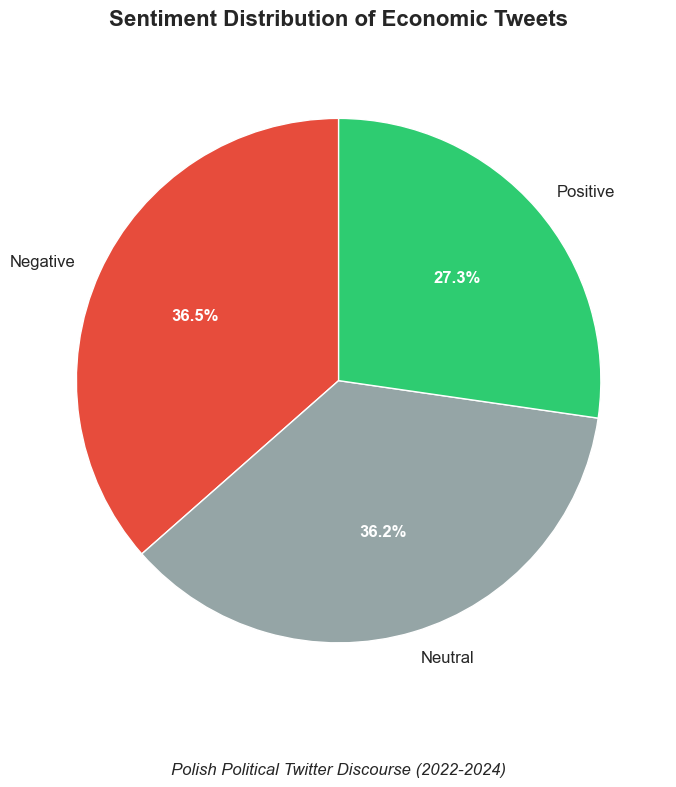

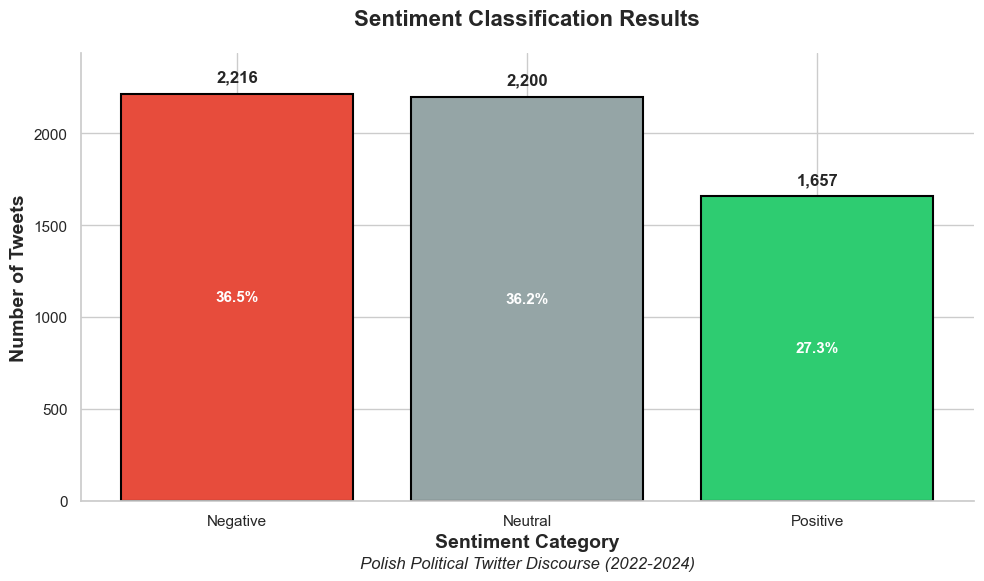


Table 1: Sentiment Distribution Summary
--------------------------------------------------
Sentiment         Count   Percentage
--------------------------------------------------
Negative          2,216        36.5%
Neutral           2,200        36.2%
Positive          1,657        27.3%
--------------------------------------------------
Total             6,073       100.0%


In [15]:
# 2. Sentiment distribution with custom titles
plot_sentiment_distribution_paper(
    df_sentiment_results,
    pie_title="Sentiment Distribution of Economic Tweets",
    bar_title="Sentiment Classification Results",
    subtitle="Polish Political Twitter Discourse (2022-2024)"
)

In [16]:
print("\n--- Sentiment Distribution by Party ---")
print(df_sentiment_results.groupby('party')['final_sentiment_label'].value_counts().unstack(fill_value=0))


--- Sentiment Distribution by Party ---
final_sentiment_label  Negative  Neutral  Positive
party                                             
Konfederacja                816      643       232
NL                          378      471       366
PIS                         360      295       247
PL2050                      179      316       258
PO                          268      225       336
PSL                         215      250       218


Our sentiment analysis of Polish political discourse on Twitter reveals a predominantly negative tone, with 36.5% negative, 36.2% neutral, and only 27.3% positive tweets. 
This negativity is particularly pronounced for right-wing (Konfederacja, PiS) while centrist parties (PO, PL2050) show more balanced sentiment distributions.

In [ ]:
When it comes to sentiment analysis most of the extracted tweets were 

##### 1. Overall Party Sentiment Proportions


--- Party Sentiment Proportions (Overall) ---


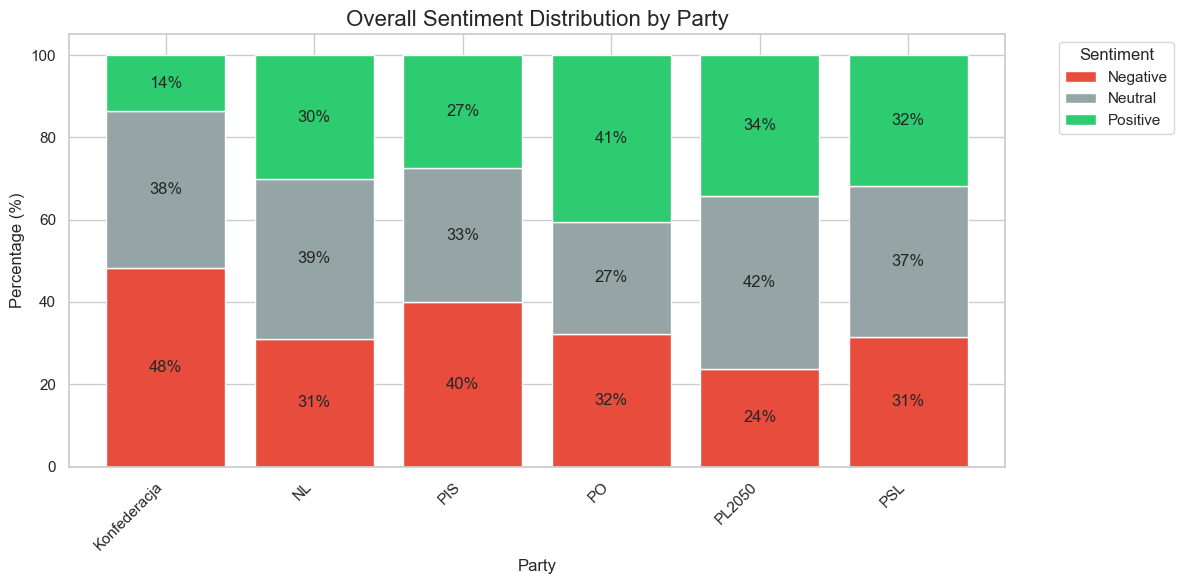

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("--- Party Sentiment Proportions (Overall) ---")
print("="*60)

if 'df_sentiment_results' in locals():
    # Calculate sentiment proportions by party
    party_sentiment = df_sentiment_results.groupby(['party', 'final_sentiment_label']).size().unstack(fill_value=0)
    party_sentiment_pct = party_sentiment.div(party_sentiment.sum(axis=1), axis=0) * 100
    
    # Get top 10 parties by tweet volume
    top_parties = df_sentiment_results['party'].value_counts().head(10).index
    party_sentiment_pct = party_sentiment_pct.loc[top_parties]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot stacked bar chart
    colors = {'Negative': '#e74c3c', 'Neutral': '#95a5a6', 'Positive': '#2ecc71'}
    party_sentiment_pct.plot(kind='bar', 
                            stacked=True, 
                            ax=ax,
                            color=[colors.get(col, '#333') for col in party_sentiment_pct.columns],
                            width=0.8)
    
    ax.set_title('Overall Sentiment Distribution by Party', fontsize=16)
    ax.set_xlabel('Party')
    ax.set_ylabel('Percentage (%)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add percentage labels
    for container in ax.containers:
        labels = [f'{v:.0f}%' if v > 3 else '' for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='center')
    
    # Position legend outside
    ax.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

##### 2.1. Party Sentiment by Year


--- Party Sentiment Proportions by Year ---


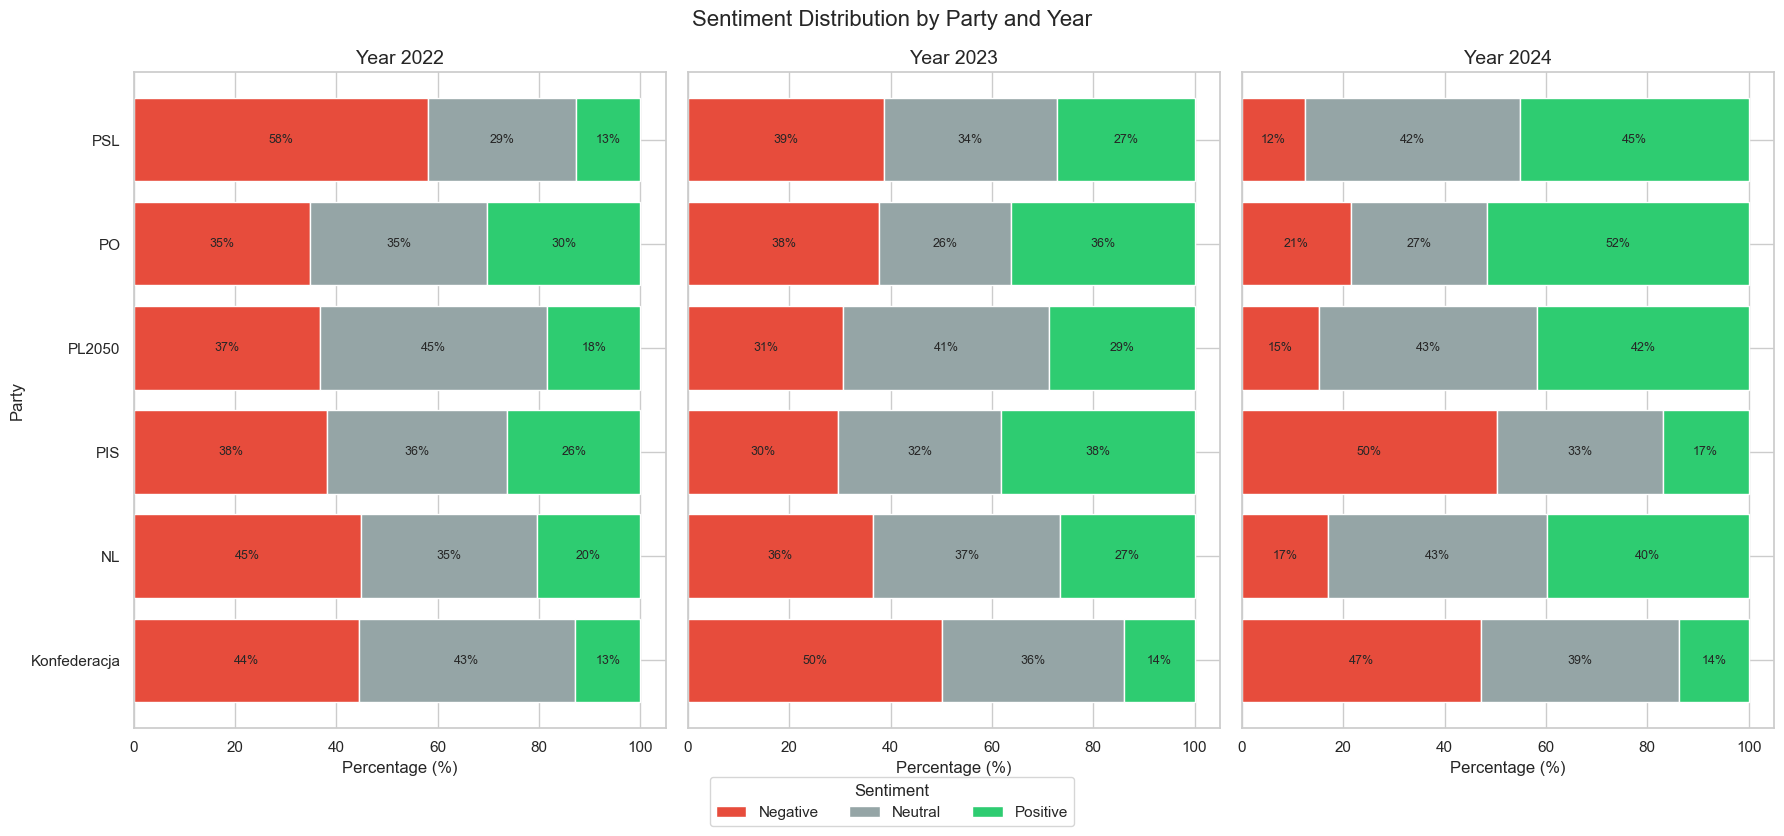

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("--- Party Sentiment Proportions by Year ---")
print("="*60)

if 'df_sentiment_results' in locals():
    # Add year column
    df_year = df_sentiment_results.copy()
    df_year['year'] = pd.to_datetime(df_year['created_at']).dt.year
    
    # Get top parties
    top_parties = df_year['party'].value_counts().head(8).index
    
    # Calculate proportions by party and year
    party_year_sentiment = df_year[df_year['party'].isin(top_parties)].groupby(
        ['party', 'year', 'final_sentiment_label']
    ).size().unstack(fill_value=0)
    
    party_year_sentiment_pct = party_year_sentiment.div(
        party_year_sentiment.sum(axis=1), axis=0
    ) * 100
    
    # Create subplots
    years = sorted(df_year['year'].unique())
    fig, axes = plt.subplots(1, len(years), figsize=(6*len(years), 8), sharey=True)
    
    if len(years) == 1:
        axes = [axes]
    
    colors = {'Negative': '#e74c3c', 'Neutral': '#95a5a6', 'Positive': '#2ecc71'}
    
    for idx, year in enumerate(years):
        ax = axes[idx]
        
        # Get data for this year
        year_data = party_year_sentiment_pct.loc[
            party_year_sentiment_pct.index.get_level_values('year') == year
        ]
        
        if not year_data.empty:
            year_data = year_data.droplevel('year')
            
            # Create horizontal stacked bars
            year_data.plot(kind='barh', 
                          stacked=True, 
                          ax=ax,
                          color=[colors.get(col, '#333') for col in year_data.columns],
                          width=0.8,
                          legend=False)  # Disable individual legends
            
            ax.set_title(f'Year {year}', fontsize=14)
            ax.set_xlabel('Percentage (%)')
            if idx == 0:
                ax.set_ylabel('Party')
            
            # Add percentage labels (only if > 5%)
            for container in ax.containers:
                labels = [f'{v:.0f}%' if v > 5 else '' for v in container.datavalues]
                ax.bar_label(container, labels=labels, label_type='center', fontsize=9)
    
    # Add single legend at the bottom
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Sentiment', loc='lower center', 
               bbox_to_anchor=(0.5, -0.05), ncol=3)
    
    plt.suptitle('Sentiment Distribution by Party and Year', fontsize=16)
    plt.tight_layout()
    plt.show()

##### 2.2. Party Sentiment before and after the election - paper graphs

In [19]:
# ==================================================================================
# PLOT 3: SENTIMENT PROPORTIONS - PRE VS POST ELECTION
# ==================================================================================

def plot_party_sentiment_pre_post_election_paper(df, election_date='2023-10-15', top_n=8):
    """
    Show sentiment proportions by party for pre and post election periods
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    
    print("\n" + "="*60)
    print("--- Party Sentiment: Pre vs Post Election ---")
    print("="*60)
    
    df_period = df.copy()
    df_period['created_at'] = pd.to_datetime(df_period['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)
    
    df_period['period'] = df_period['created_at'].apply(
        lambda x: 'Pre-Election' if x < election_dt else 'Post-Election'
    )
    
    top_parties = df_period['party'].value_counts().head(top_n).index
    
    # Calculate proportions
    party_period_sentiment = df_period[df_period['party'].isin(top_parties)].groupby(
        ['party', 'period', 'final_sentiment_label']
    ).size().unstack(fill_value=0)
    
    party_period_sentiment_pct = party_period_sentiment.div(
        party_period_sentiment.sum(axis=1), axis=0
    ) * 100
    
    # Create summary table data
    summary_data = []
    for party in top_parties:
        if party in party_period_sentiment_pct.index.get_level_values('party'):
            party_data = party_period_sentiment_pct.loc[party]
            for period in ['Pre-Election', 'Post-Election']:
                if period in party_data.index:
                    row_data = {'Party': party, 'Period': period}
                    for sentiment in ['Positive', 'Negative', 'Neutral']:
                        row_data[sentiment] = f"{party_data.loc[period].get(sentiment, 0):.1f}%"
                    summary_data.append(row_data)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
    
    colors = {'Negative': '#e74c3c', 'Neutral': '#95a5a6', 'Positive': '#2ecc71'}
    periods = ['Pre-Election', 'Post-Election']
    
    for idx, period in enumerate(periods):
        ax = axes[idx]
        
        period_data = party_period_sentiment_pct.loc[
            party_period_sentiment_pct.index.get_level_values('period') == period
        ]
        
        if not period_data.empty:
            period_data = period_data.droplevel('period')
            
            if 'Positive' in period_data.columns:
                period_data = period_data.sort_values('Positive', ascending=True)
            
            period_data.plot(kind='barh', 
                            stacked=True, 
                            ax=ax,
                            color=[colors.get(col, '#333') for col in period_data.columns],
                            width=0.8,
                            legend=False)
            
            ax.set_title(f'{period}\n(Relative to {election_date})', fontsize=14, fontweight='bold')
            ax.set_xlabel('Percentage (%)', fontsize=12)
            if idx == 0:
                ax.set_ylabel('Political Party', fontsize=12)
            
            for container in ax.containers:
                labels = [f'{v:.0f}%' if v > 5 else '' for v in container.datavalues]
                ax.bar_label(container, labels=labels, label_type='center', 
                            fontsize=10, fontweight='bold')
            
            ax.grid(axis='x', alpha=0.3, linestyle='--')
            ax.set_axisbelow(True)
    
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Sentiment', loc='lower center', 
               bbox_to_anchor=(0.5, -0.08), ncol=3, fontsize=12)
    
    plt.suptitle('Sentiment Distribution by Party: Pre-Election vs Post-Election', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print summary table
    print("\nTable 2: Party Sentiment Proportions by Period")
    print("-" * 80)
    print(f"{'Party':<15} {'Period':<15} {'Positive':>12} {'Negative':>12} {'Neutral':>12}")
    print("-" * 80)
    for item in summary_data:
        print(f"{item['Party']:<15} {item['Period']:<15} {item['Positive']:>12} {item['Negative']:>12} {item['Neutral']:>12}")
    print("-" * 80)


--- Party Sentiment: Pre vs Post Election ---


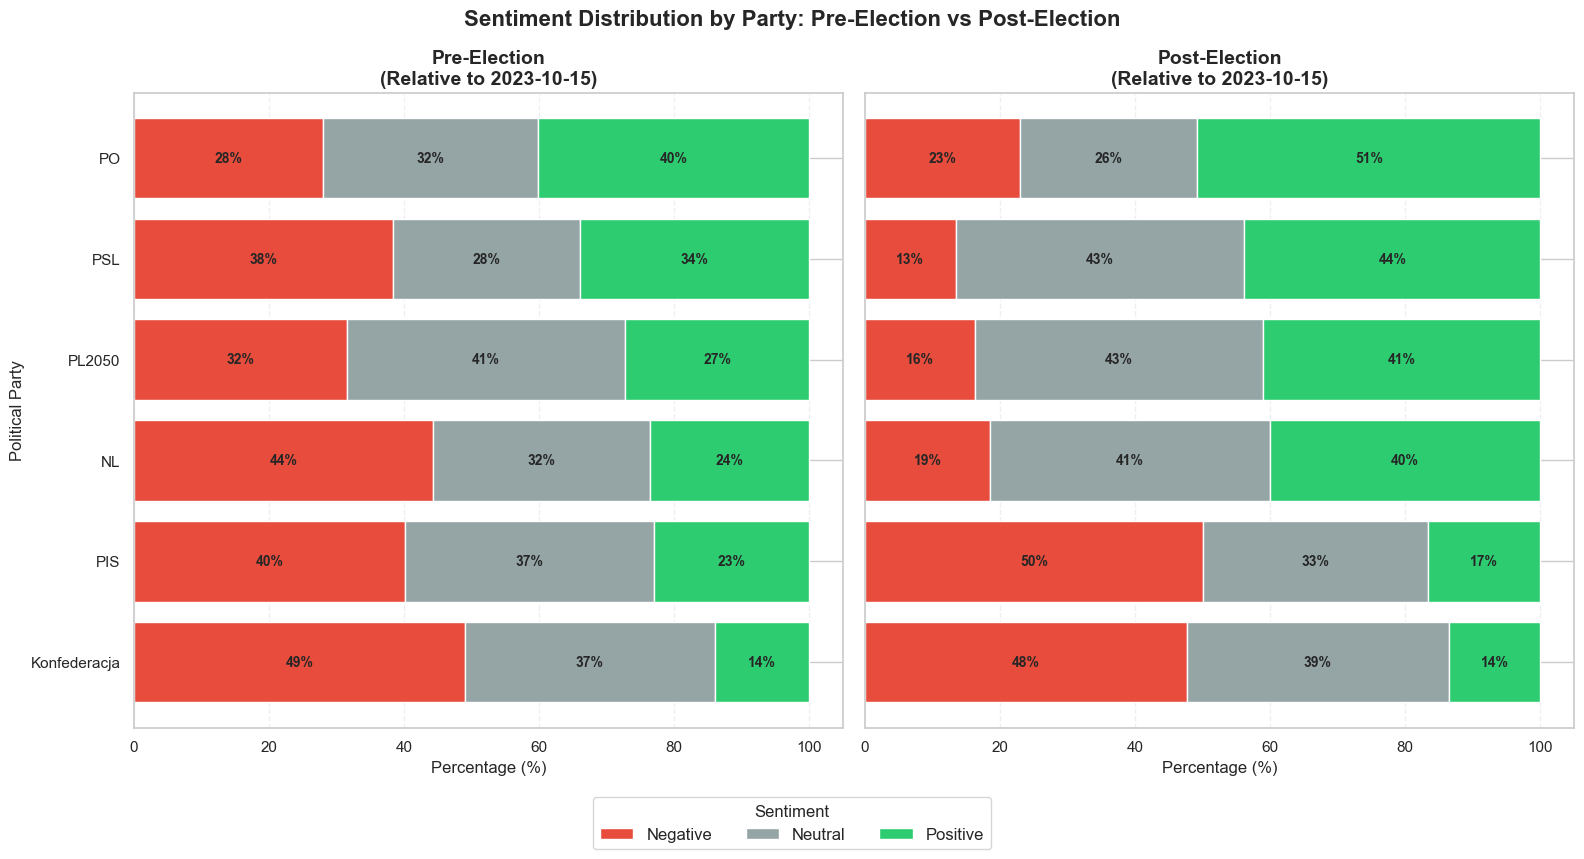


Table 2: Party Sentiment Proportions by Period
--------------------------------------------------------------------------------
Party           Period              Positive     Negative      Neutral
--------------------------------------------------------------------------------
Konfederacja    Pre-Election           13.9%        49.0%        37.0%
Konfederacja    Post-Election          13.6%        47.7%        38.7%
NL              Pre-Election           23.0%        40.1%        36.9%
NL              Post-Election          40.0%        18.5%        41.4%
PIS             Pre-Election           40.1%        28.0%        31.9%
PIS             Post-Election          16.6%        50.0%        33.4%
PO              Pre-Election           33.9%        38.4%        27.7%
PO              Post-Election          50.8%        22.9%        26.3%
PL2050          Pre-Election           27.2%        31.5%        41.2%
PL2050          Post-Election          41.1%        16.2%        42.7%
PSL      

In [20]:
# 3. Pre vs Post election comparison
plot_party_sentiment_pre_post_election_paper(df_sentiment_results, election_date='2023-10-15', top_n=6)

##### 3. Plot Overall Sentiment Over Time


--- Plotting Overall Sentiment Over Time ---


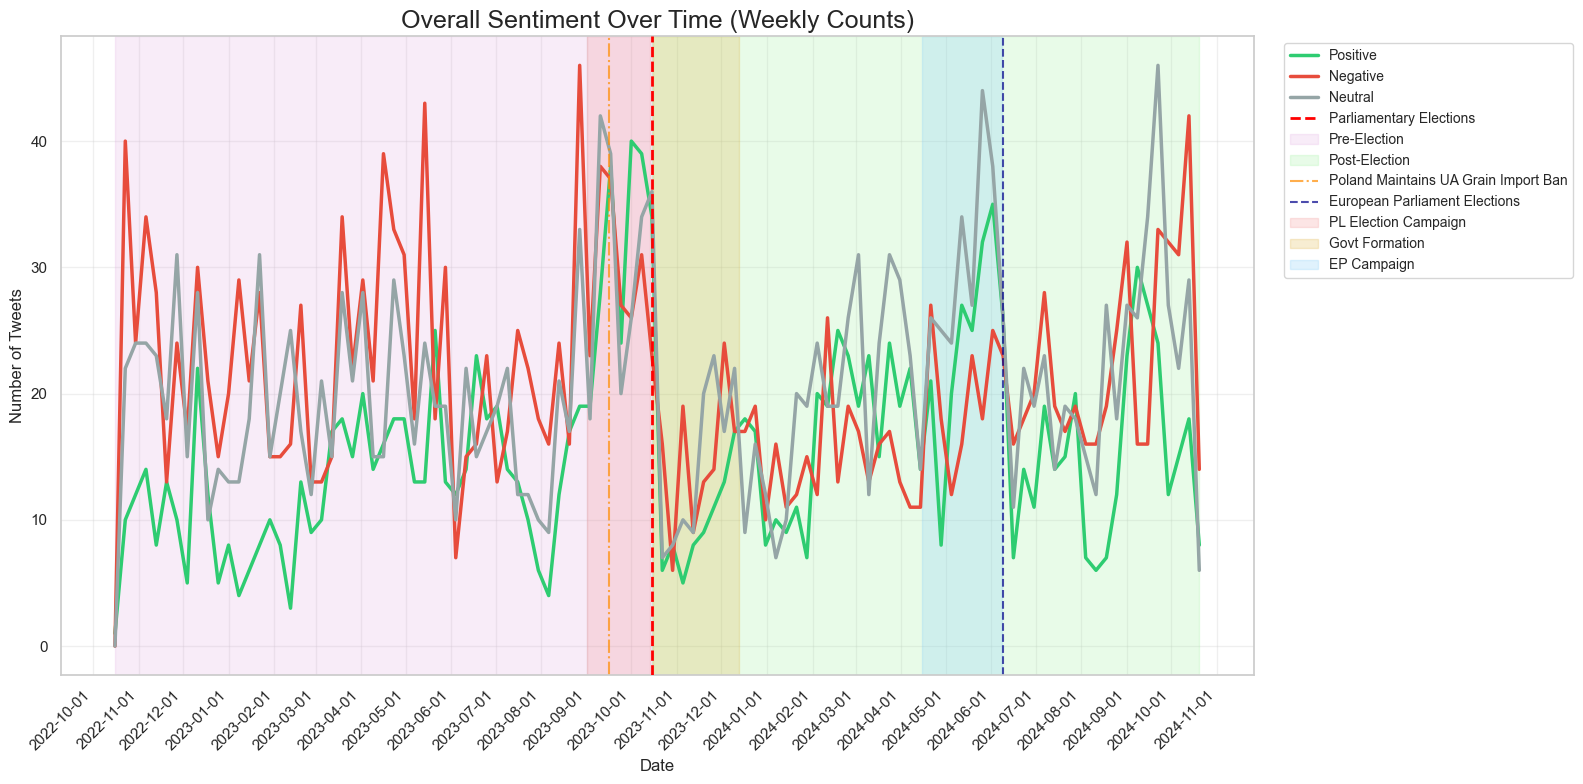

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

print("\n" + "="*60)
print("--- Plotting Overall Sentiment Over Time ---")
print("="*60)

# Configuration
TIME_FREQUENCY = 'W'  # 'W' for Weekly, 'ME' for Monthly
SENTIMENT_COLORS = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}

# ANNOTATION TOGGLES
SHOW_MAIN_ELECTION = True
SHOW_ELECTION_SHADING = True
SHOW_OTHER_EVENTS = True
SHOW_PERIOD_ANNOTATIONS = True

# Main election
MAIN_ELECTION_DATE = '2023-10-15'

# Event annotations (vertical lines)
EVENT_ANNOTATIONS = [
    {'date': '2023-09-16', 'label': 'Poland Maintains UA Grain Import Ban', 'color': '#FF8C00', 'linestyle': '-.'},
    {'date': '2024-06-09', 'label': 'European Parliament Elections', 'color': 'darkblue', 'linestyle': '--'},
]

# Period annotations (shaded regions)
PERIOD_ANNOTATIONS = [
    {'start': '2023-09-01', 'end': '2023-10-14', 'label': 'PL Election Campaign', 'color': 'lightcoral', 'alpha': 0.2},
    {'start': '2023-10-16', 'end': '2023-12-13', 'label': 'Govt Formation', 'color': '#DAA520', 'alpha': 0.2},
    {'start': '2024-04-15', 'end': '2024-06-08', 'label': 'EP Campaign', 'color': 'lightskyblue', 'alpha': 0.25},
]

if 'df_sentiment_results' in locals() and 'final_sentiment_label' in df_sentiment_results.columns:
    try:
        # Prepare data
        df_plot = df_sentiment_results.copy()
        df_plot['created_at'] = pd.to_datetime(df_plot['created_at'], utc=True)
        df_plot = df_plot.set_index('created_at')
        
        # Aggregate by time period and sentiment
        sentiment_counts = df_plot.groupby([
            pd.Grouper(freq=TIME_FREQUENCY), 
            'final_sentiment_label'
        ]).size().unstack(fill_value=0)
        
        # Create plot
        fig, ax = plt.subplots(figsize=(16, 8))
        
        # Plot sentiment lines (without markers for cleaner look)
        for sentiment, color in SENTIMENT_COLORS.items():
            if sentiment in sentiment_counts.columns:
                ax.plot(sentiment_counts.index, 
                       sentiment_counts[sentiment], 
                       label=sentiment, 
                       color=color, 
                       linewidth=2.5)
        
        # Add annotations based on toggles
        if SHOW_MAIN_ELECTION:
            election_date = pd.to_datetime(MAIN_ELECTION_DATE, utc=True)
            ax.axvline(election_date, color='red', linestyle='--', linewidth=2, 
                      label=f'Parliamentary Elections', zorder=10)
            
            if SHOW_ELECTION_SHADING:
                # Pre-election shading
                ax.axvspan(sentiment_counts.index.min(), election_date, 
                          color='#DDA0DD', alpha=0.2, label='Pre-Election')
                # Post-election shading  
                ax.axvspan(election_date, sentiment_counts.index.max(), 
                          color='#90EE90', alpha=0.2, label='Post-Election')
        
        if SHOW_OTHER_EVENTS:
            for event in EVENT_ANNOTATIONS:
                event_date = pd.to_datetime(event['date'], utc=True)
                if sentiment_counts.index.min() <= event_date <= sentiment_counts.index.max():
                    ax.axvline(event_date, 
                              color=event['color'], 
                              linestyle=event['linestyle'],
                              alpha=0.7,
                              label=event['label'])
        
        if SHOW_PERIOD_ANNOTATIONS:
            for period in PERIOD_ANNOTATIONS:
                start_date = pd.to_datetime(period['start'], utc=True)
                end_date = pd.to_datetime(period['end'], utc=True)
                ax.axvspan(start_date, end_date,
                          color=period['color'],
                          alpha=period['alpha'],
                          label=period['label'])
        
        # Formatting
        freq_label = "Weekly" if TIME_FREQUENCY == 'W' else "Monthly"
        ax.set_title(f'Overall Sentiment Over Time ({freq_label} Counts)', fontsize=18)
        ax.set_xlabel('Date', fontsize=12)
        ax.set_ylabel('Number of Tweets', fontsize=12)
        
        # Format dates
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        # Legend
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error creating plot: {e}")
        import traceback
        traceback.print_exc()

##### 4.1. Plot Sentiment by Party Over Time with Annotations


--- Plotting Sentiment by Party Over Time ---
Plotting top 6 parties with annotations


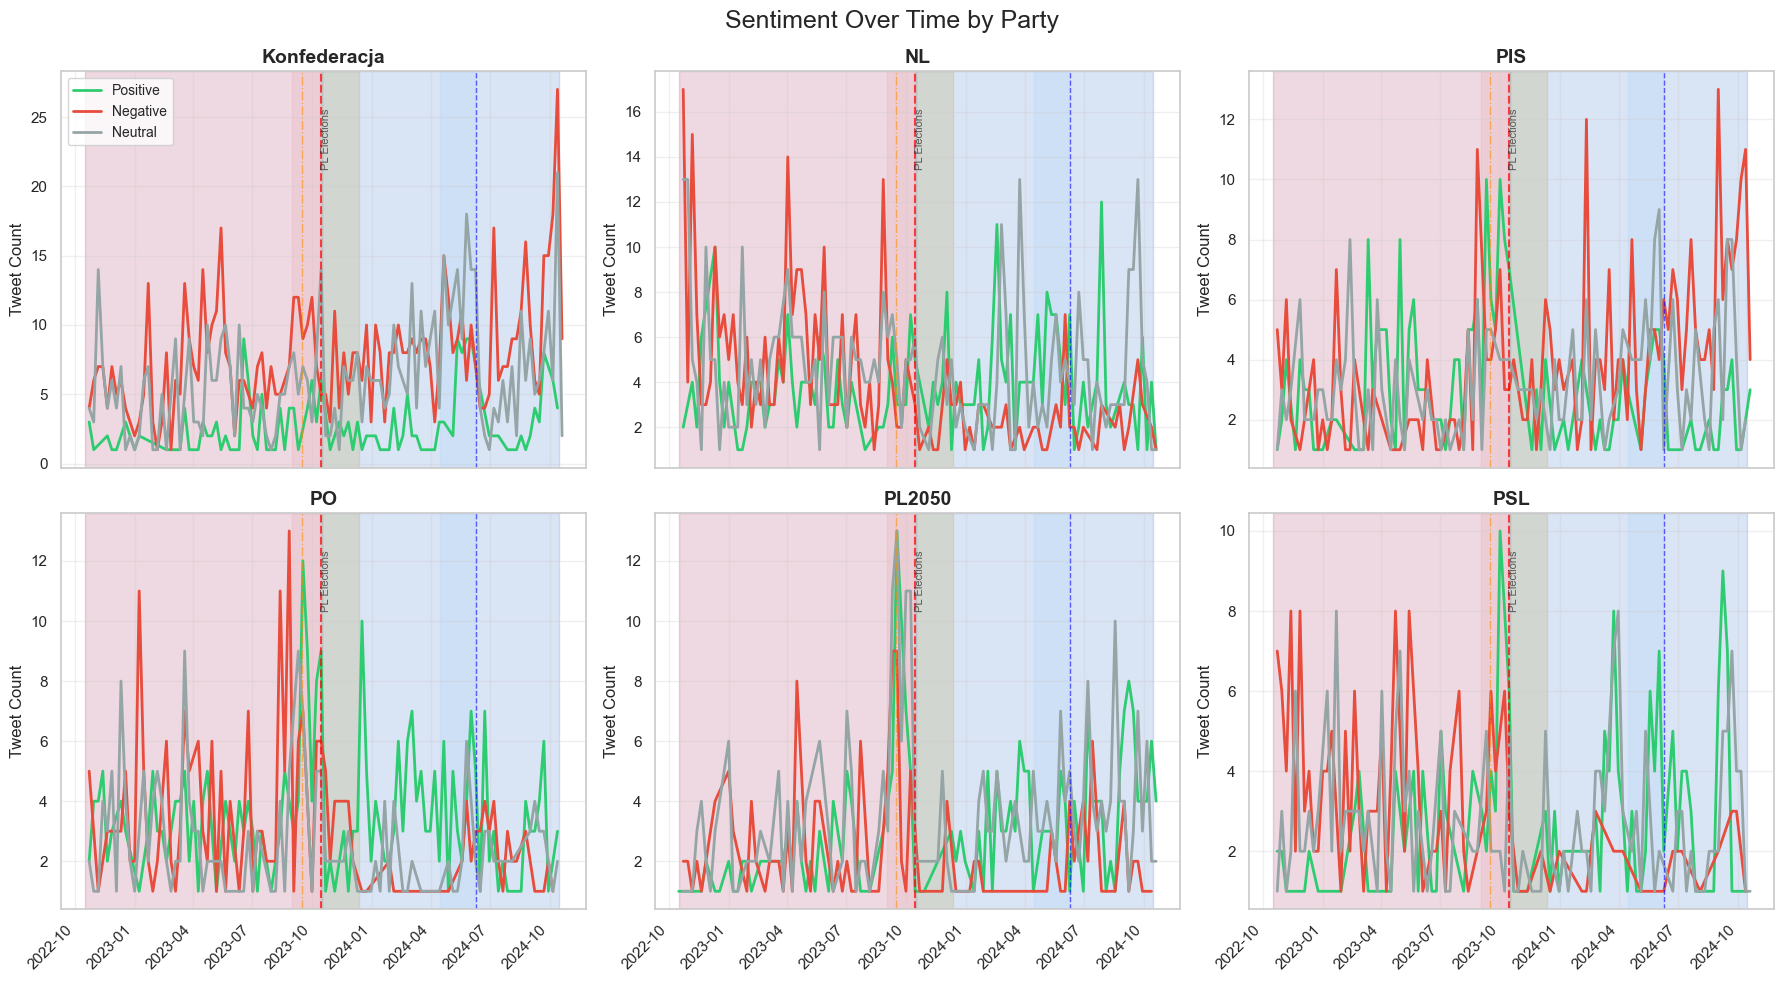

In [22]:
# Cell: Plot Sentiment by Party Over Time (with Toggleable Annotations)
# Purpose: Shows sentiment trends over time for each party with optional event annotations
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

print("\n" + "="*60)
print("--- Plotting Sentiment by Party Over Time ---")
print("="*60)

# Configuration
TIME_FREQUENCY = 'W'  # Weekly aggregation
SENTIMENT_COLORS = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}
TOP_N_PARTIES = 6

# ANNOTATION TOGGLES - Set to True/False to show/hide
SHOW_MAIN_ELECTION = True
SHOW_OTHER_EVENTS = True
SHOW_PERIOD_ANNOTATIONS = True

# Main election
MAIN_ELECTION = {'date': '2023-10-15', 'label': 'PL Elections', 'color': 'red'}

# Event annotations (vertical lines)
EVENT_ANNOTATIONS = [
    {'date': '2023-09-16', 'label': 'Grain Ban', 'color': '#FF8C00', 'linestyle': '-.'},
    {'date': '2024-06-09', 'label': 'EP Elections', 'color': 'blue', 'linestyle': '--'},
]

# Period annotations (shaded regions)
PERIOD_ANNOTATIONS = [
    {'start': '2023-09-01', 'end': '2023-10-14', 'label': 'Election Campaign', 'color': 'lightcoral', 'alpha': 0.1},
    {'start': '2024-04-15', 'end': '2024-06-08', 'label': 'EP Campaign', 'color': 'lightskyblue', 'alpha': 0.1},
    {'start': '2023-10-16', 'end': '2023-12-13', 'label': 'Govt Formation', 'color': '#DAA520', 'alpha': 0.2},
    {'start': '2022-10-16', 'end': '2023-10-15', 'label': 'Govt Formation', 'color': "#AA3C6A", 'alpha': 0.2},
    {'start': '2023-10-16', 'end': '2024-10-15', 'label': 'Govt Formation', 'color': "#417BD1", 'alpha': 0.2},
]

if 'df_sentiment_results' in locals():
    try:
        # Get top parties
        top_parties = df_sentiment_results['party'].value_counts().head(TOP_N_PARTIES).index.tolist()
        
        # Filter and prepare data
        df_party = df_sentiment_results[df_sentiment_results['party'].isin(top_parties)].copy()
        df_party['created_at'] = pd.to_datetime(df_party['created_at'], utc=True)
        
        # Aggregate by time, party, and sentiment
        party_sentiment_counts = df_party.groupby([
            pd.Grouper(key='created_at', freq=TIME_FREQUENCY),
            'party',
            'final_sentiment_label'
        ]).size().reset_index(name='count')
        
        print(f"Plotting top {TOP_N_PARTIES} parties with annotations")
        
        # Create subplots
        num_cols = min(3, TOP_N_PARTIES)
        num_rows = (TOP_N_PARTIES + num_cols - 1) // num_cols
        
        fig, axes = plt.subplots(num_rows, num_cols, 
                                figsize=(18, 5*num_rows),
                                sharex=True, 
                                sharey=False)
        
        if num_rows == 1:
            axes = axes.reshape(1, -1)
        axes_flat = axes.flatten()
        
        # Plot each party
        for idx, party in enumerate(top_parties):
            ax = axes_flat[idx]
            party_data = party_sentiment_counts[party_sentiment_counts['party'] == party]
            
            # Plot sentiment lines
            for sentiment, color in SENTIMENT_COLORS.items():
                sentiment_data = party_data[party_data['final_sentiment_label'] == sentiment]
                if not sentiment_data.empty:
                    ax.plot(sentiment_data['created_at'], 
                           sentiment_data['count'],
                           color=color,
                           linewidth=2,
                           label=sentiment)
            
            # Add annotations based on toggles
            y_max = party_data['count'].max() if not party_data.empty else 1
            
            # Main election line
            if SHOW_MAIN_ELECTION:
                election_date = pd.to_datetime(MAIN_ELECTION['date'], utc=True)
                ax.axvline(election_date, color=MAIN_ELECTION['color'], 
                          linestyle='--', alpha=0.7, linewidth=1.5)
                ax.text(election_date, y_max * 0.95, MAIN_ELECTION['label'], 
                       rotation=90, verticalalignment='top', fontsize=8, alpha=0.7)
            
            # Other event lines
            if SHOW_OTHER_EVENTS:
                for event in EVENT_ANNOTATIONS:
                    event_date = pd.to_datetime(event['date'], utc=True)
                    if party_data['created_at'].min() <= event_date <= party_data['created_at'].max():
                        ax.axvline(event_date, color=event['color'], 
                                  linestyle=event['linestyle'], alpha=0.6, linewidth=1)
            
            # Period shadings
            if SHOW_PERIOD_ANNOTATIONS:
                for period in PERIOD_ANNOTATIONS:
                    start_date = pd.to_datetime(period['start'], utc=True)
                    end_date = pd.to_datetime(period['end'], utc=True)
                    ax.axvspan(start_date, end_date, 
                              color=period['color'], alpha=period['alpha'], zorder=0)
            
            # Formatting
            ax.set_title(f'{party}', fontsize=14, fontweight='bold')
            ax.set_ylabel('Tweet Count')
            ax.grid(True, alpha=0.3)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            
            # Legend only on first subplot
            if idx == 0:
                ax.legend(loc='upper left', fontsize=10)
        
        # Remove empty subplots
        for idx in range(TOP_N_PARTIES, len(axes_flat)):
            fig.delaxes(axes_flat[idx])
        
        # Format figure
        plt.suptitle('Sentiment Over Time by Party', fontsize=18, y=0.98)
        for ax in axes_flat[:TOP_N_PARTIES]:
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")

##### 4.2. Plot Sentiment by Party Over Time with Annotations - paper graphs

In [23]:
df_sentiment_results[df_sentiment_results['final_sentiment_score'] < 0.4]

id                                      text_clean_en  \
1437  1665975358586339328  To make things better in Poland, we need to ge...   
1485  1646491921588658176  This platformer is amazing. He admits that the...   
3248  1797239367229923584  I was at the markets today and people were tha...   
3622  1657833600824360960  I'm coming back from the Charlemagne Award and...   
5728  1700484353241854464  Stuffy, empty, no energy at a convention. We w...   

                                text_clean_en_demojized  \
1437  To make things better in Poland, we need to ge...   
1485  This platformer is amazing. He admits that the...   
3248  I was at the markets today and people were tha...   
3622  I'm coming back from the Charlemagne Award and...   
5728  Stuffy, empty, no energy at a convention. We w...   

                    created_at         party                name  \
1437 2023-06-06 06:54:12+00:00  Konfederacja    Sławomir Mentzen   
1485 2023-04-13 12:33:59+00:00  Konfederacja    Sławomir Mentzen   
3248 2024-06-02 12:10:30+00:00           PIS       Michał Wójcik   
3622 2023-05-14 19:41:46+00:00           PIS  Mateusz Morawiecki   
5728 2023-09-09 12:20:37+00:00           PSL        Adam Jarubas   

             username matched_keywords_FILTERED extracted_terms_FILTERED  \
1437  SlawomirMentzen                     [VAT]                    [VAT]   
1485  SlawomirMentzen                   [taxes]           [Taxes, taxes]   
3248         mwojcik_            [fund, market]   [funds, markets, Fund]   
3622      MorawieckiM             [taxes, debt]            [taxes, debt]   
5728      JarubasAdam                  [energy]                 [energy]   

     sentiment_cardiffnlp_emoji_label  sentiment_cardiffnlp_emoji_score  \
1437                          Neutral                          0.398689   
1485                         Positive                          0.380497   
3248                          Neutral                          0.370121   
3622                         Negative                          0.395068   
5728                          Neutral                          0.379744   

     sentiment_finbert_emoji_label  sentiment_finbert_emoji_score  \
1437                       Neutral                       0.775381   
1485                       Neutral                       0.750485   
3248                       Neutral                       0.624703   
3622                       Neutral                       0.657529   
5728                       Neutral                       0.916078   

     sentiment_cardiffnlp_demoji_label  sentiment_cardiffnlp_demoji_score  \
1437                           Neutral                           0.398689   
1485                          Positive                           0.380497   
3248                           Neutral                           0.370121   
3622                          Negative                           0.395068   
5728                           Neutral                           0.379744   

     sentiment_finbert_demoji_label  sentiment_finbert_demoji_score  \
1437                        Neutral                        0.775381   
1485                        Neutral                        0.750485   
3248                        Neutral                        0.624703   
3622                        Neutral                        0.657529   
5728                        Neutral                        0.916078   

     final_sentiment_label  final_sentiment_score  
1437               Neutral               0.398689  
1485              Positive               0.380497  
3248               Neutral               0.370121  
3622              Negative               0.395068  
5728               Neutral               0.379744

In [77]:
# ==================================================================================
# PLOT 4: ENHANCED SENTIMENT TIMELINE WITH ANNOTATIONS (0-1 SCALE)
# ==================================================================================

def plot_sentiment_timeline_by_party_paper(df, top_n=6, freq='W', 
                                         show_main_election=True,
                                         show_other_events=True,
                                         show_period_annotations=True):
    """
    Enhanced sentiment timeline with ratio from 0 to 1 and event annotations
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.ndimage import gaussian_filter1d
    
    print("\n" + "="*60)
    print("--- Enhanced Sentiment Timeline by Party ---")
    print("="*60)
    
    # Configuration
    SENTIMENT_COLORS = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}
    
    # Annotations
    MAIN_ELECTION = {'date': '2023-10-15', 'label': 'PL Elections', 'color': 'red'}
    # Event annotations (vertical lines)
    EVENT_ANNOTATIONS = [
        {'date': '2023-09-16', 'label': 'Poland Maintains UA Grain Import Ban', 'color': '#FF8C00', 'linestyle': '-.'},
        {'date': '2024-06-09', 'label': 'European Parliament Elections', 'color': 'darkblue', 'linestyle': '--'},
    ]

    # Period annotations (shaded regions)
    PERIOD_ANNOTATIONS = [
        {'start': '2023-09-01', 'end': '2023-10-14', 'label': 'PL Election Campaign', 'color': 'lightcoral', 'alpha': 0.2},
        {'start': '2023-10-16', 'end': '2023-12-13', 'label': 'Govt Formation', 'color': '#DAA520', 'alpha': 0.2},
        {'start': '2024-04-15', 'end': '2024-06-08', 'label': 'EP Campaign', 'color': 'lightskyblue', 'alpha': 0.25},
    ]
    
    top_parties = df['party'].value_counts().head(top_n).index.tolist()
    
    df_party = df[df['party'].isin(top_parties)].copy()
    df_party['created_at'] = pd.to_datetime(df_party['created_at'], utc=True)
    
    # Create figure
    fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True)
    axes_flat = axes.flatten()
    
    election_dt = pd.to_datetime(MAIN_ELECTION['date'], utc=True)
    
    # Summary statistics
    summary_stats = []
    
    for idx, party in enumerate(top_parties):
        ax = axes_flat[idx]
        party_data = df_party[df_party['party'] == party].copy()
        
        # Aggregate by time
        time_sentiment = party_data.groupby([
            pd.Grouper(key='created_at', freq=freq),
            'final_sentiment_label'
        ]).size().unstack(fill_value=0)
        
        if not time_sentiment.empty:
            total = time_sentiment.sum(axis=1)
            pos_ratio = time_sentiment.get('Positive', 0) / total.replace(0, 1)
            neg_ratio = time_sentiment.get('Negative', 0) / total.replace(0, 1)
            neu_ratio = time_sentiment.get('Neutral', 0) / total.replace(0, 1)

            # Store statistics
            pre_election_pos = pos_ratio[pos_ratio.index < election_dt].mean()
            post_election_pos = pos_ratio[pos_ratio.index >= election_dt].mean()
            pre_election_neg = neg_ratio[neg_ratio.index < election_dt].mean()
            post_election_neg = neg_ratio[neg_ratio.index >= election_dt].mean()
            
            summary_stats.append({
                'Party': party,
                'Pre_Pos': pre_election_pos,
                'Post_Pos': post_election_pos,
                'Pre_Neg': pre_election_neg,
                'Post_Neg': post_election_neg,
                'Pos_Change': post_election_pos - pre_election_pos,
                'Neg_Change': post_election_neg - pre_election_neg
            })
            
            # Smooth the data
            if len(pos_ratio) > 5:
                pos_smooth = gaussian_filter1d(pos_ratio, sigma=1)
                neg_smooth = gaussian_filter1d(neg_ratio, sigma=1)
                neu_smooth = gaussian_filter1d(neu_ratio, sigma=1)
            else:
                pos_smooth = pos_ratio
                neg_smooth = neg_ratio
                neu_smooth = neu_ratio
            
            # Plot sentiment ratios
            ax.plot(time_sentiment.index, pos_smooth, color=SENTIMENT_COLORS['Positive'], 
                   linewidth=2.5, label='Positive')
            ax.plot(time_sentiment.index, neg_smooth, color=SENTIMENT_COLORS['Negative'], 
                   linewidth=2.5, label='Negative')
            #ax.plot(time_sentiment.index, neu_smooth, color=SENTIMENT_COLORS['Neutral'], linewidth=2.5, label='Neutral', alpha=0.7)
            
            # Fill between
            ax.fill_between(time_sentiment.index, pos_smooth, 0, alpha=0.3, 
                           color=SENTIMENT_COLORS['Positive'])
            ax.fill_between(time_sentiment.index, neg_smooth, 0, alpha=0.3, 
                           color=SENTIMENT_COLORS['Negative'])
            #ax.fill_between(time_sentiment.index, neu_smooth, 0, alpha=0.2, color=SENTIMENT_COLORS['Neutral'])
            
            # Add annotations
            if show_main_election:
                ax.axvline(election_dt, color=MAIN_ELECTION['color'], 
                          linestyle='--', alpha=0.7, linewidth=1.5)
            
            if show_other_events:
                for event in EVENT_ANNOTATIONS:
                    event_date = pd.to_datetime(event['date'], utc=True)
                    if time_sentiment.index.min() <= event_date <= time_sentiment.index.max():
                        ax.axvline(event_date, color=event['color'], 
                                  linestyle=event['linestyle'], alpha=0.6, linewidth=1)
            
            if show_period_annotations:
                for period in PERIOD_ANNOTATIONS:
                    start_date = pd.to_datetime(period['start'], utc=True)
                    end_date = pd.to_datetime(period['end'], utc=True)
                    ax.axvspan(start_date, end_date, 
                              color=period['color'], alpha=period['alpha'], zorder=0)
            
            # Formatting
            ax.set_title(f'{party}', fontsize=14, fontweight='bold')
            ax.set_ylabel('Sentiment Ratio (0-1)', fontsize=11)
            ax.set_ylim(0, 1)
            ax.grid(True, alpha=0.3, linestyle='--')
            
            if idx == 0:
                ax.legend(loc='upper left', fontsize=10)
    
    # Remove empty subplots
    for idx in range(top_n, len(axes_flat)):
        fig.delaxes(axes_flat[idx])
    
    plt.suptitle('Sentiment Ratio by Party (0-1 Scale)\n(Smoothed Weekly Data)', 
                 fontsize=16, fontweight='bold')
    
    for ax in axes_flat[:top_n]:
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary table
    print("\nTable 3: Average Sentiment Ratios by Party and Period")
    print("-" * 100)
    print(f"{'Party':<15} {'Pre-Pos':>10} {'Post-Pos':>10} {'Pos Change':>12} {'Pre-Neg':>10} {'Post-Neg':>10} {'Neg Change':>12}")
    print("-" * 100)
    for stats in summary_stats:
        print(f"{stats['Party']:<15} {stats['Pre_Pos']:>10.3f} {stats['Post_Pos']:>10.3f} "
              f"{stats['Pos_Change']:>+12.3f} {stats['Pre_Neg']:>10.3f} {stats['Post_Neg']:>10.3f} "
              f"{stats['Neg_Change']:>+12.3f}")
    print("-" * 100)


--- Enhanced Sentiment Timeline by Party ---


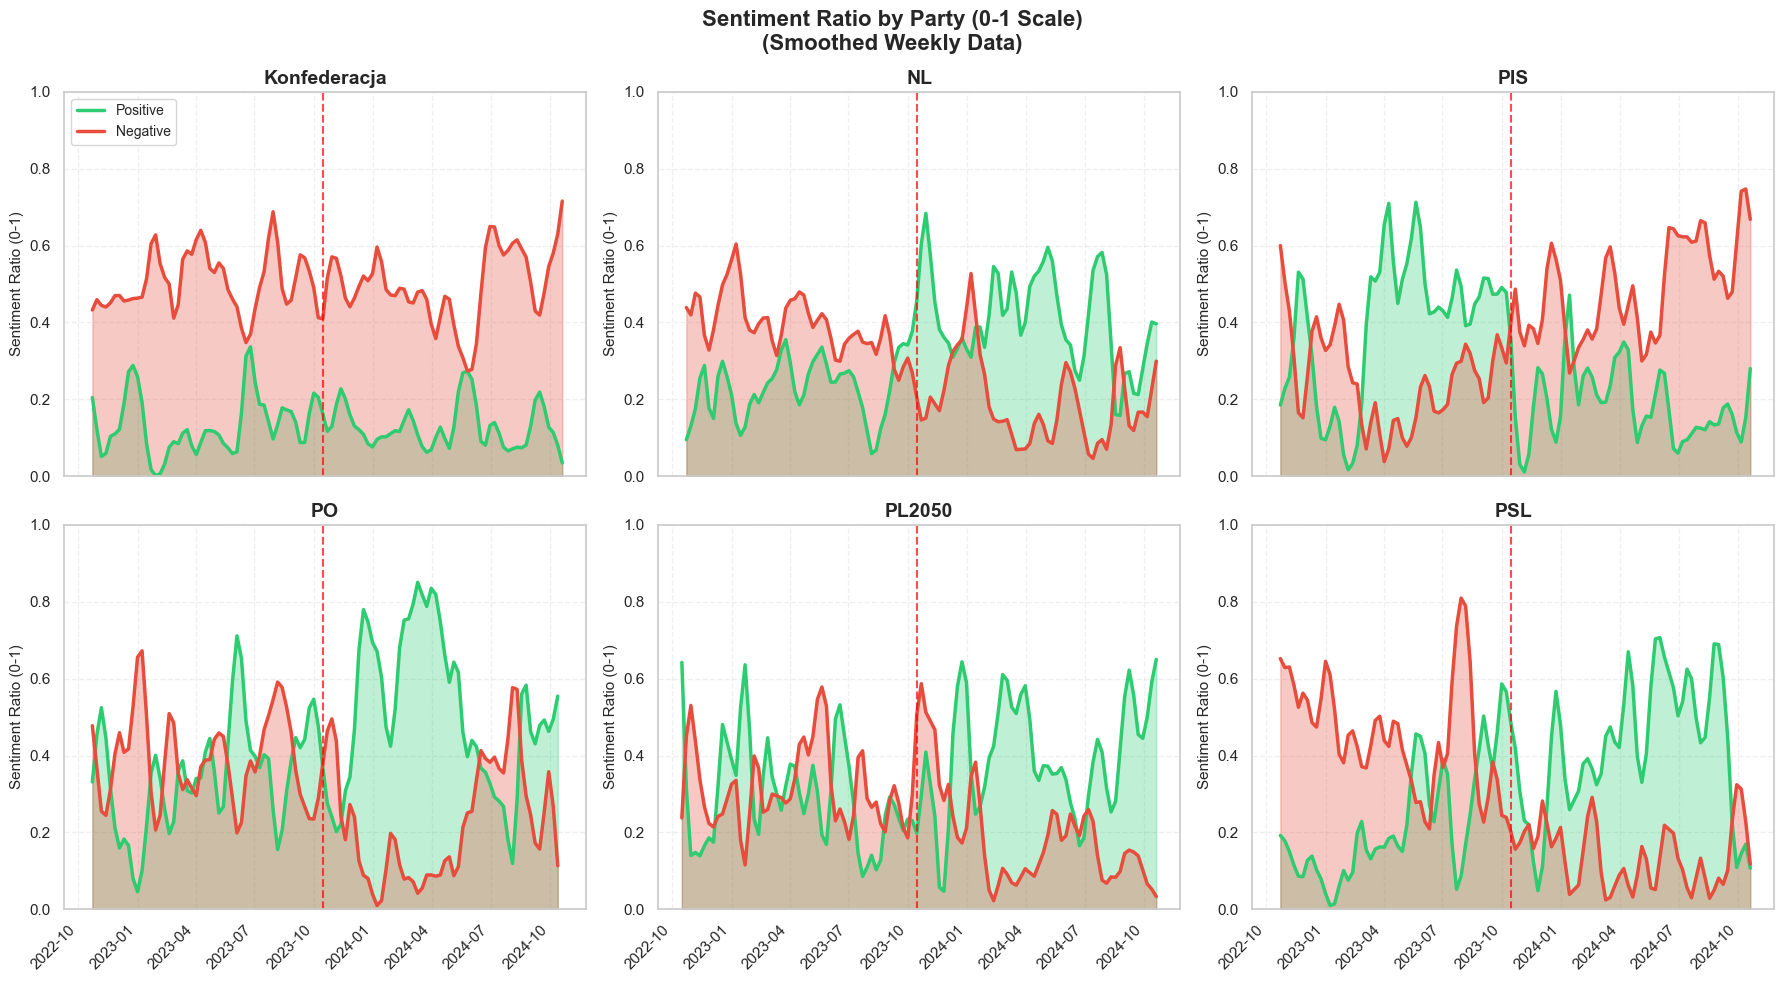


Table 3: Average Sentiment Ratios by Party and Period
----------------------------------------------------------------------------------------------------
Party              Pre-Pos   Post-Pos   Pos Change    Pre-Neg   Post-Neg   Neg Change
----------------------------------------------------------------------------------------------------
Konfederacja         0.133      0.128       -0.004      0.506      0.494       -0.012
NL                   0.231      0.409       +0.178      0.395      0.192       -0.203
PIS                  0.396      0.187       -0.209      0.252      0.487       +0.235
PO                   0.350      0.511       +0.161      0.390      0.227       -0.162
PL2050               0.295      0.396       +0.100      0.310      0.189       -0.121
PSL                  0.224      0.417       +0.193      0.456      0.137       -0.318
----------------------------------------------------------------------------------------------------


In [78]:
# 4. Enhanced timeline with annotations (0-1 scale)
plot_sentiment_timeline_by_party_paper(
    df_sentiment_results, 
    top_n=6, 
    freq='W',
    show_main_election=True,
    show_other_events=False,
    show_period_annotations=False
)

##### 5. Stacked Area Chart - Overall Sentiment


--- Stacked Area Chart: Overall Sentiment ---


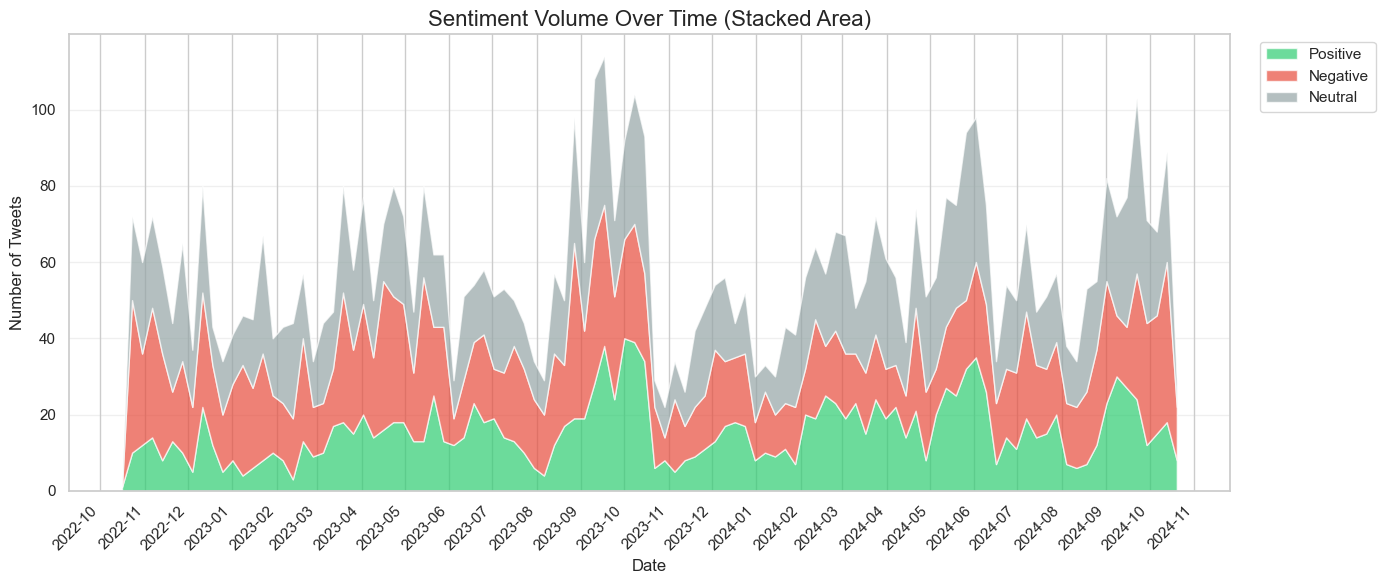

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

print("\n" + "="*60)
print("--- Stacked Area Chart: Overall Sentiment ---")
print("="*60)

# Configuration
TIME_FREQUENCY = 'W'  # Weekly aggregation
SENTIMENT_COLORS = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}

if 'df_sentiment_results' in locals():
    # Prepare data
    df_area = df_sentiment_results.copy()
    df_area['created_at'] = pd.to_datetime(df_area['created_at'], utc=True)
    df_area = df_area.set_index('created_at')
    
    # Aggregate by time and sentiment
    sentiment_counts = df_area.groupby([
        pd.Grouper(freq=TIME_FREQUENCY),
        'final_sentiment_label'
    ]).size().unstack(fill_value=0)
    
    # Ensure all sentiments present
    for sentiment in SENTIMENT_COLORS.keys():
        if sentiment not in sentiment_counts.columns:
            sentiment_counts[sentiment] = 0
    
    # Create stacked area plot
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Plot stacked areas
    ax.stackplot(sentiment_counts.index, 
                [sentiment_counts[s].values for s in SENTIMENT_COLORS.keys()],
                labels=list(SENTIMENT_COLORS.keys()),
                colors=list(SENTIMENT_COLORS.values()),
                alpha=0.7)
    
    # Formatting
    ax.set_title('Sentiment Volume Over Time (Stacked Area)', fontsize=16)
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Tweets')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Legend
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

##### 6.1. Sentiment Distribution for Top Users by Party (# number of tweets)


--- Top Users Sentiment Analysis by Party ---


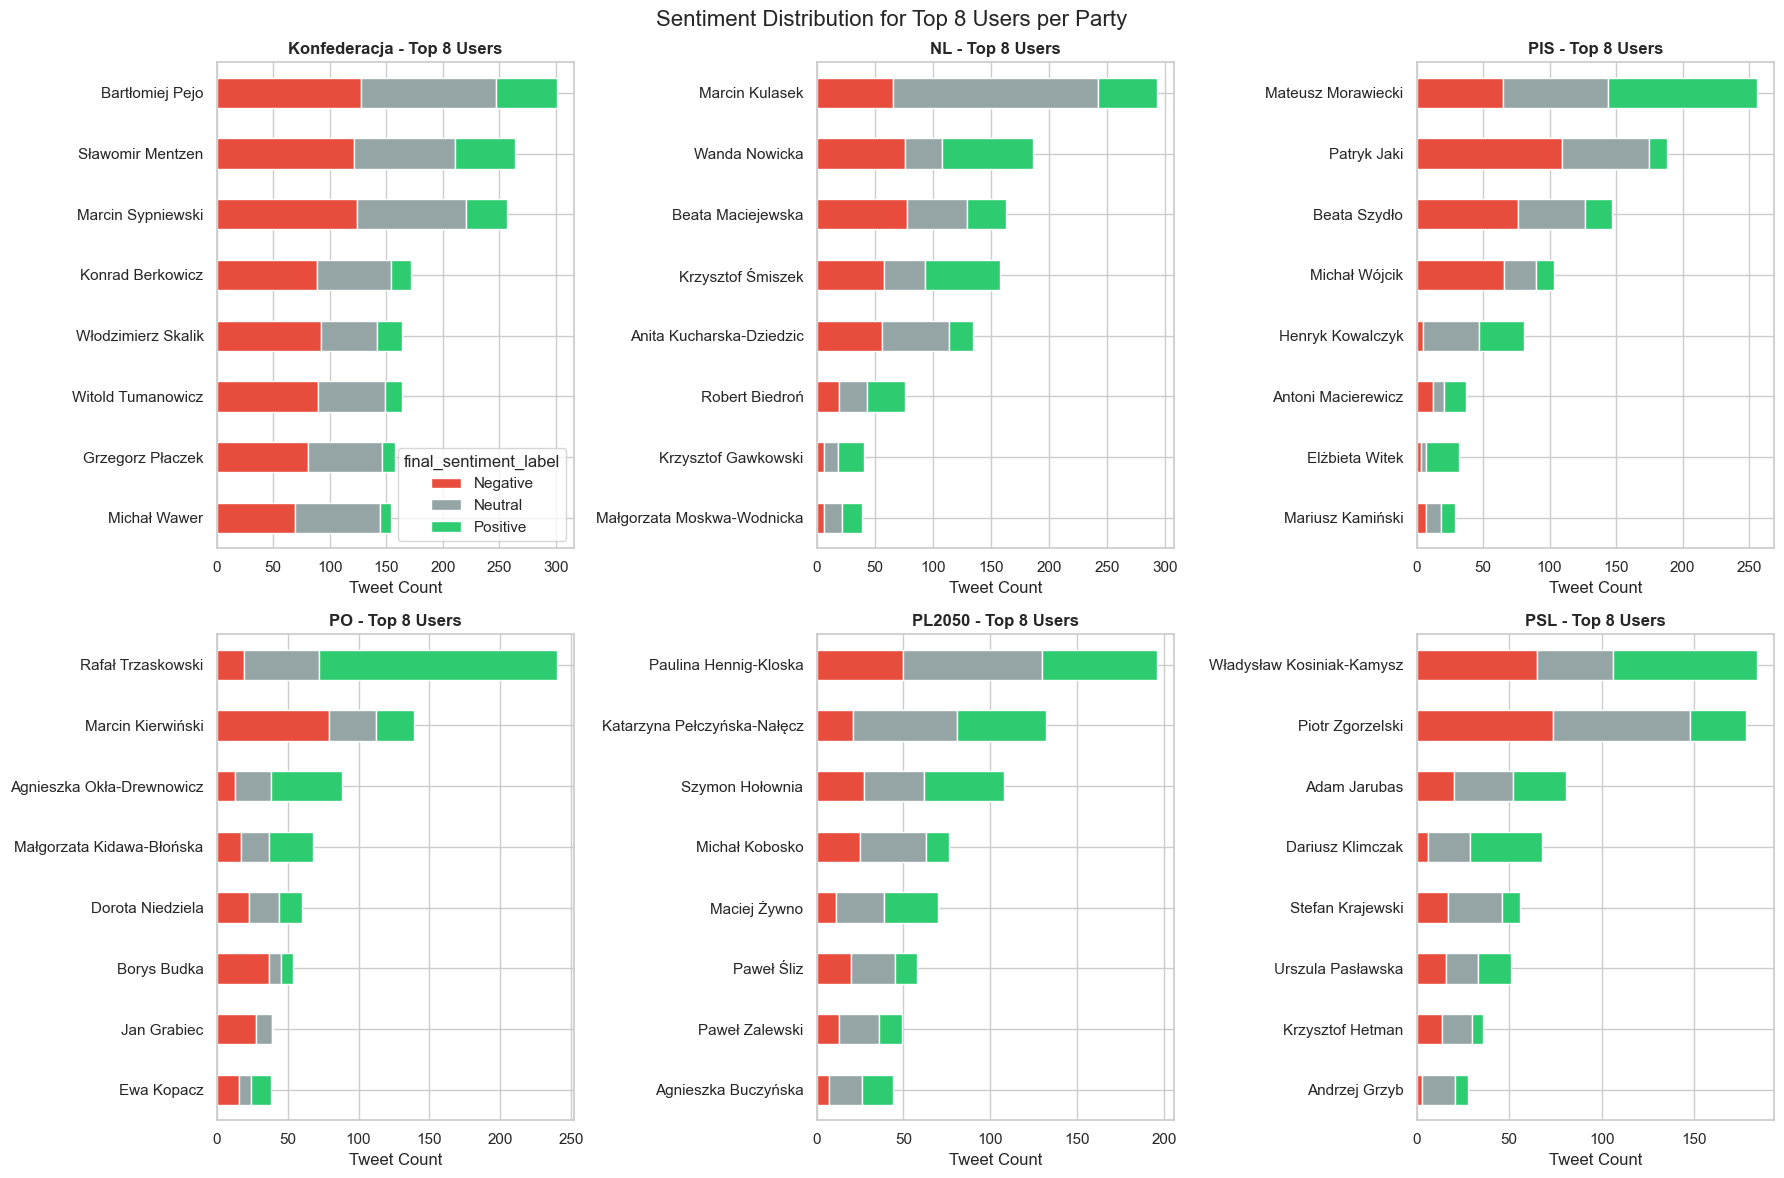

In [27]:
# Cell: Sentiment Distribution for Top Users by Party
# Purpose: Shows sentiment breakdown for the most active users in each party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*60)
print("--- Top Users Sentiment Analysis by Party ---")
print("="*60)

# Configuration
TOP_N_USERS = 8  # Top users per party to analyze
TOP_N_PARTIES = 6  # Number of parties to show

if 'df_sentiment_results' in locals() and 'name' in df_sentiment_results.columns:
    try:
        # Get top parties
        top_parties = df_sentiment_results['party'].value_counts().head(TOP_N_PARTIES).index
        
        # Find top users per party
        top_users_list = []
        for party in top_parties:
            party_data = df_sentiment_results[df_sentiment_results['party'] == party]
            top_users = party_data['name'].value_counts().head(TOP_N_USERS).index.tolist()
            top_users_list.extend([(party, user) for user in top_users])
        
        # Filter data for top users
        party_user_pairs = pd.DataFrame(top_users_list, columns=['party', 'name'])
        df_top_users = pd.merge(df_sentiment_results, party_user_pairs, on=['party', 'name'])
        
        # Calculate sentiment counts
        user_sentiment = df_top_users.groupby(['party', 'name', 'final_sentiment_label']).size().reset_index(name='count')
        
        # Create visualization
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes_flat = axes.flatten()
        
        colors = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}
        
        for idx, party in enumerate(top_parties):
            ax = axes_flat[idx]
            party_data = user_sentiment[user_sentiment['party'] == party]
            
            # Pivot for stacked bars
            pivot_data = party_data.pivot(index='name', columns='final_sentiment_label', values='count').fillna(0)
            
            # Sort by total tweets
            pivot_data['total'] = pivot_data.sum(axis=1)
            pivot_data = pivot_data.sort_values('total', ascending=True).drop('total', axis=1)
            
            # Plot horizontal stacked bars
            pivot_data.plot(kind='barh', stacked=True, ax=ax, 
                          color=[colors.get(col, '#333') for col in pivot_data.columns],
                          legend=idx==0)
            
            ax.set_title(f'{party} - Top {TOP_N_USERS} Users', fontsize=12, fontweight='bold')
            ax.set_xlabel('Tweet Count')
            ax.set_ylabel('')
            
        # Remove empty subplots
        for idx in range(len(top_parties), len(axes_flat)):
            fig.delaxes(axes_flat[idx])
        
        plt.suptitle(f'Sentiment Distribution for Top {TOP_N_USERS} Users per Party', fontsize=16)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")

##### 6.2. Sentiment Distribution for Top Users by Party (% percentage of tweets)

##### 6.3. Sentiment Distribution for Top Users by Party (Weighted tweets)

##### 7.1. Positive vs Negative Analysis (Excluding Neutral) by User (# number of tweets)


--- Positive vs Negative Sentiment for Top Users ---


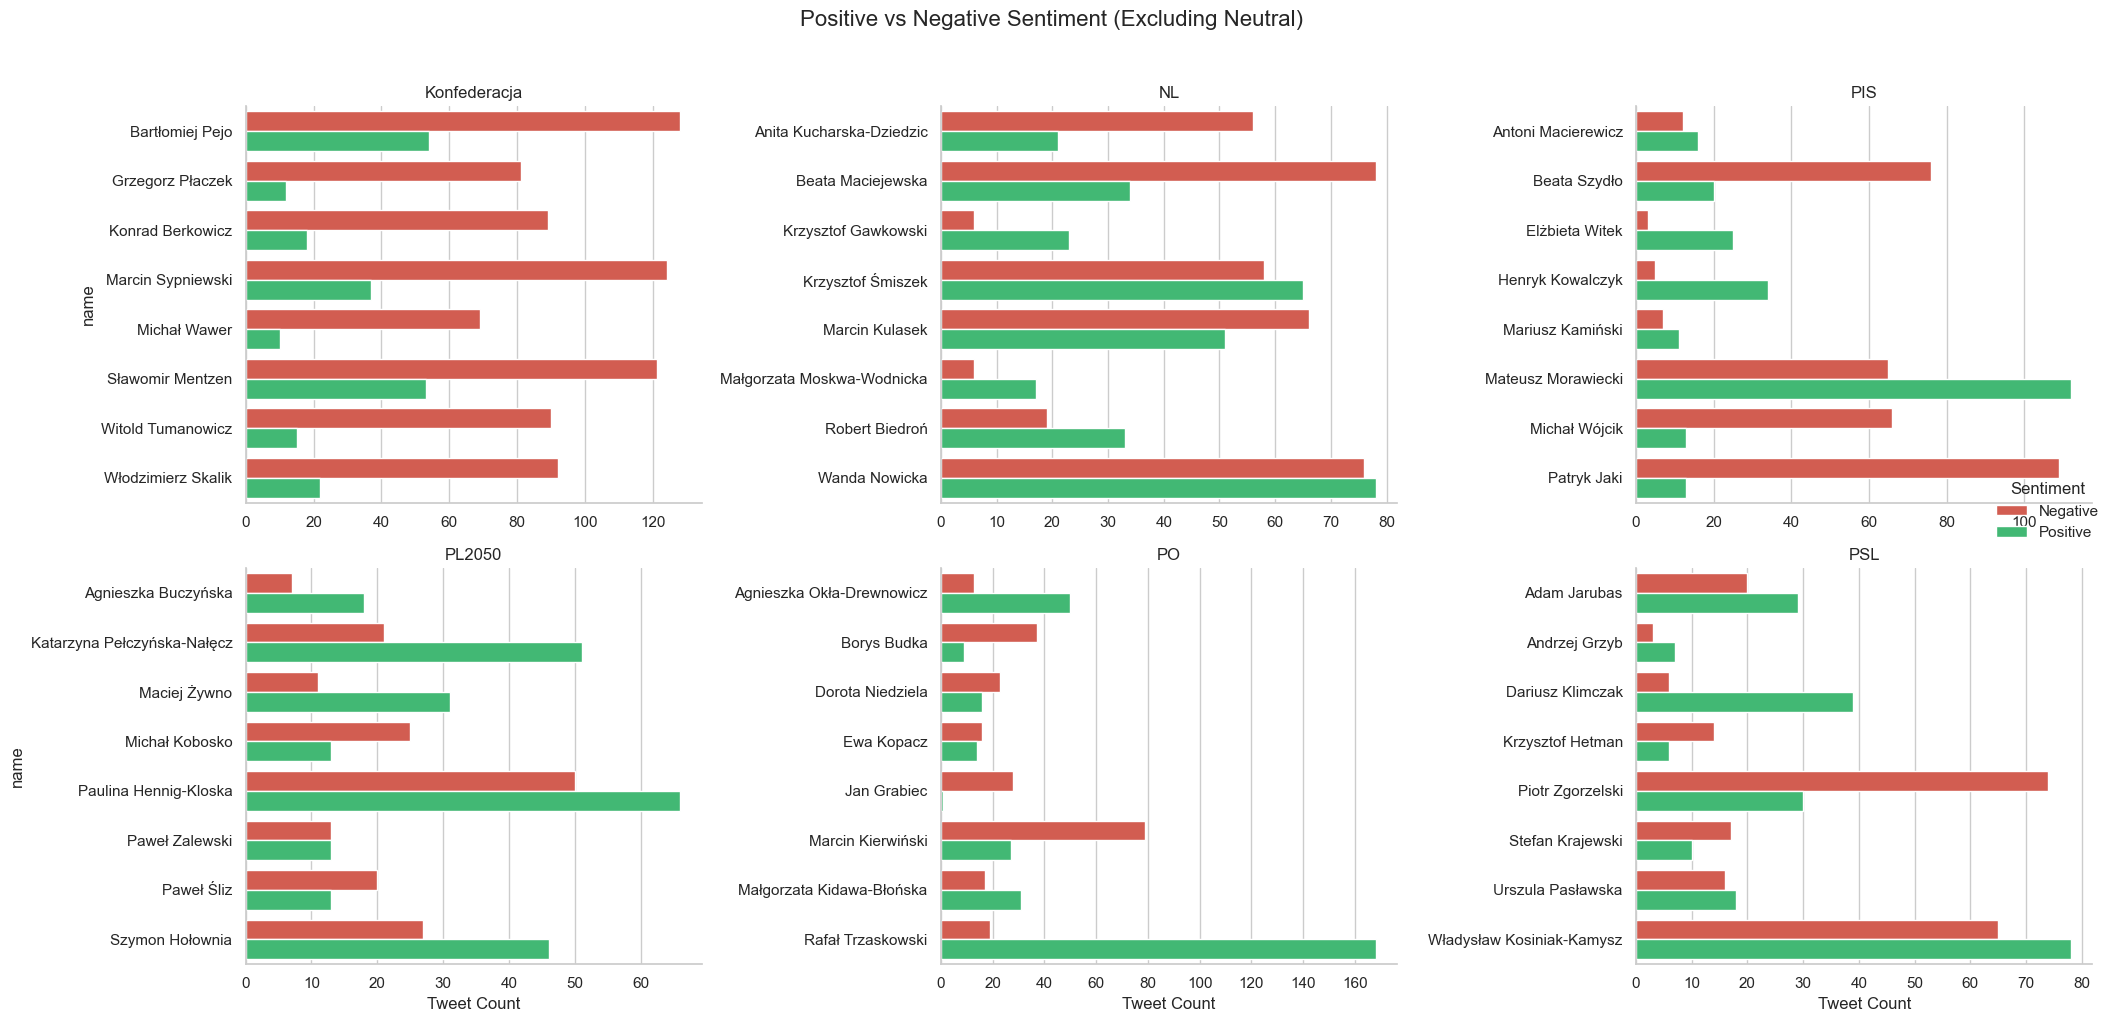


Positive/Negative Ratio by Party:
final_sentiment_label  Positive  Negative  Ratio
party                                           
Konfederacja                221       794   0.28
NL                          322       365   0.88
PIS                         244       343   0.71
PL2050                      251       174   1.44
PO                          316       232   1.36
PSL                         217       215   1.01


In [28]:
# Cell: Positive vs Negative Sentiment - Top Users
# Purpose: Compares only positive and negative sentiments for top users (excludes neutral)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*60)
print("--- Positive vs Negative Sentiment for Top Users ---")
print("="*60)

# Configuration
TOP_N_USERS = 8
TOP_N_PARTIES = 6

if 'df_sentiment_results' in locals() and 'name' in df_sentiment_results.columns:
    try:
        # Get top parties
        top_parties = df_sentiment_results['party'].value_counts().head(TOP_N_PARTIES).index
        
        # Find top users per party
        top_users_list = []
        for party in top_parties:
            party_data = df_sentiment_results[df_sentiment_results['party'] == party]
            top_users = party_data['name'].value_counts().head(TOP_N_USERS).index.tolist()
            top_users_list.extend([(party, user) for user in top_users])
        
        # Filter data
        party_user_pairs = pd.DataFrame(top_users_list, columns=['party', 'name'])
        df_top_users = pd.merge(df_sentiment_results, party_user_pairs, on=['party', 'name'])
        
        # Filter only Positive and Negative sentiments
        df_pos_neg = df_top_users[df_top_users['final_sentiment_label'].isin(['Positive', 'Negative'])]
        
        # Calculate counts
        user_sentiment = df_pos_neg.groupby(['party', 'name', 'final_sentiment_label']).size().reset_index(name='count')
        
        # Create visualization
        g = sns.catplot(data=user_sentiment,
                       x='count', y='name', hue='final_sentiment_label',
                       col='party', col_wrap=3,
                       kind='bar', orient='h',
                       palette={'Positive': '#2ecc71', 'Negative': '#e74c3c'},
                       height=5, aspect=1.3,
                       sharex=False, sharey=False)
        
        # Format
        g.set_titles("{col_name}")
        g.set_axis_labels("Tweet Count", "name")
        g.fig.suptitle('Positive vs Negative Sentiment (Excluding Neutral)', fontsize=16, y=1.02)
        
        # Adjust legend
        g._legend.set_title("Sentiment")
        
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print("\nPositive/Negative Ratio by Party:")
        pos_neg_ratio = df_pos_neg.groupby(['party', 'final_sentiment_label']).size().unstack(fill_value=0)
        pos_neg_ratio['Ratio'] = pos_neg_ratio['Positive'] / pos_neg_ratio['Negative']
        print(pos_neg_ratio[['Positive', 'Negative', 'Ratio']].round(2))
        
    except Exception as e:
        print(f"Error: {e}")

##### 7.2. Positive vs Negative Analysis (Excluding Neutral) by User (% percentage of tweets)

##### 7.3. Positive vs Negative Analysis (Excluding Neutral) by User (Weighted tweets)


##### 8. Percentage Sentiment Change (Before vs. After Election)

In [29]:
# === Notebook Cell: Plot Percentage Sentiment Change (Before vs. After Election) ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import traceback # Already imported, but ensure it's there if needed elsewhere
import numpy as np

print("\n" + "="*60)
print("--- Plotting Percentage Sentiment Change (Before vs. After Election) ---")
print("="*60)

# --- CONFIGURATION: YOU NEED TO SET THESE ---
YOUR_DATAFRAME_NAME = 'df_sentiment_results' # e.g., df_election_analysis
YOUR_PARTY_COLUMN_NAME = 'party' # e.g., 'party' or 'political_party'
YOUR_ELECTION_DATE_STR = '2023-10-15' # e.g., '2023-10-15'
# --- END CONFIGURATION ---


# Check if your specific DataFrame exists and is a DataFrame
if YOUR_DATAFRAME_NAME in locals() and isinstance(locals()[YOUR_DATAFRAME_NAME], pd.DataFrame):
    
    # Use a clear variable for your DataFrame within this cell's logic
    source_df = locals()[YOUR_DATAFRAME_NAME]

    pct_change_cols_to_plot = []
    # These are the expected column names for percentage changes.
    # If your columns are named differently, update these strings.
    positive_change_col = 'Positive_Pct_Change'
    negative_change_col = 'Negative_Pct_Change'

    if positive_change_col in source_df.columns:
        pct_change_cols_to_plot.append(positive_change_col)
    if negative_change_col in source_df.columns:
        pct_change_cols_to_plot.append(negative_change_col)
    
    if not pct_change_cols_to_plot:
        print(f"ERROR: No percentage change columns (e.g., '{positive_change_col}', '{negative_change_col}') found in '{YOUR_DATAFRAME_NAME}'.")
        print("Ensure the previous cell for numerical change calculation ran correctly and generated these columns in your DataFrame.")
    else:
        # Make sure YOUR_PARTY_COLUMN_NAME is the index or a column.
        # If it's the index, reset it. If it's already a column, this reset_index() might not be needed
        # or might behave differently if the index is not named.
        # Assuming your DataFrame has 'party' information as a column or can be made one from the index.
        if source_df.index.name == YOUR_PARTY_COLUMN_NAME or YOUR_PARTY_COLUMN_NAME in source_df.columns:
            if source_df.index.name == YOUR_PARTY_COLUMN_NAME:
                 df_pct_change_for_plot = source_df[pct_change_cols_to_plot].reset_index().copy()
            else: # It's already a column
                 df_pct_change_for_plot = source_df[[YOUR_PARTY_COLUMN_NAME] + pct_change_cols_to_plot].copy()
        else:
            print(f"ERROR: Party column '{YOUR_PARTY_COLUMN_NAME}' not found as index or column in '{YOUR_DATAFRAME_NAME}'.")
            df_pct_change_for_plot = pd.DataFrame() # Empty to prevent further errors

        if not df_pct_change_for_plot.empty:
            # Replace potential NaN/Inf with 0 for plotting
            df_pct_change_for_plot = df_pct_change_for_plot.fillna(0).replace([np.inf, -np.inf], 0)

            # Melt the DataFrame for easier plotting with seaborn
            df_melted_pct = pd.melt(df_pct_change_for_plot, 
                                    id_vars=[YOUR_PARTY_COLUMN_NAME], 
                                    value_vars=pct_change_cols_to_plot,
                                    var_name='Sentiment_Change_Metric', 
                                    value_name='Percentage_Change')

            # Extract base sentiment (Positive/Negative) for coloring
            df_melted_pct['Sentiment_Type'] = df_melted_pct['Sentiment_Change_Metric'].apply(
                lambda x: 'Positive' if 'Positive' in x else 'Negative' if 'Negative' in x else 'Other'
            )
            
            print("\nData prepared for Percentage Change Plot:")
            # Use display if in Jupyter, otherwise print
            try:
                display(df_melted_pct.head())
            except NameError:
                print(df_melted_pct.head())

            if df_melted_pct.empty:
                print("No data to plot for percentage changes after melting.")
            else:
                num_parties = df_melted_pct[YOUR_PARTY_COLUMN_NAME].nunique()
                plt.figure(figsize=(10, max(4, num_parties * 0.6))) 
                
                change_palette = {'Positive': 'green', 'Negative': 'red'}

                bar_plot = sns.barplot(
                    data=df_melted_pct,
                    y=YOUR_PARTY_COLUMN_NAME, 
                    x='Percentage_Change', 
                    hue='Sentiment_Type',   
                    palette=change_palette,
                    orient='h',
                    dodge=True 
                )
                
                plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
                plt.xlabel('Percentage Change (%) in Tweet Count')
                plt.ylabel('Party') # Or use YOUR_PARTY_COLUMN_NAME.title() for a dynamic label
                plt.title(f'Percentage Change in Positive/Negative Sentiment Tweets\n(After vs. Before Election {YOUR_ELECTION_DATE_STR})', fontsize=15)
                plt.legend(title='Sentiment Category', loc='lower right')
                plt.grid(axis='x', linestyle='--', alpha=0.7)
                
                for p in bar_plot.patches:
                    width = p.get_width()
                    text_x_pos = width + (5 if width > 0 else -5) 
                    ha = 'left' if width > 0 else 'right'
                    
                    if width != 0: 
                        bar_plot.text(text_x_pos, 
                                      p.get_y() + p.get_height() / 2., 
                                      f"{width:.1f}%", 
                                      va='center', 
                                      ha=ha,
                                      fontsize=8)

                plt.tight_layout()
                plt.show()
else:
    print(f"ERROR: DataFrame named '{YOUR_DATAFRAME_NAME}' not found or is not a Pandas DataFrame. Please load/create it first.")
    if YOUR_DATAFRAME_NAME not in locals():
        print(f"'{YOUR_DATAFRAME_NAME}' was not found in the current environment's local variables.")
    elif not isinstance(locals()[YOUR_DATAFRAME_NAME], pd.DataFrame):
        print(f"'{YOUR_DATAFRAME_NAME}' was found, but it is not a Pandas DataFrame. It is a {type(locals()[YOUR_DATAFRAME_NAME])}.")


print("\n" + "="*60)
print("--- Percentage Sentiment Change Plotting Complete ---")
print("="*60)


--- Plotting Percentage Sentiment Change (Before vs. After Election) ---
ERROR: No percentage change columns (e.g., 'Positive_Pct_Change', 'Negative_Pct_Change') found in 'df_sentiment_results'.
Ensure the previous cell for numerical change calculation ran correctly and generated these columns in your DataFrame.

--- Percentage Sentiment Change Plotting Complete ---


##### 9.1. Net Sentiment Score Over Time


--- Net Sentiment Score Analysis ---


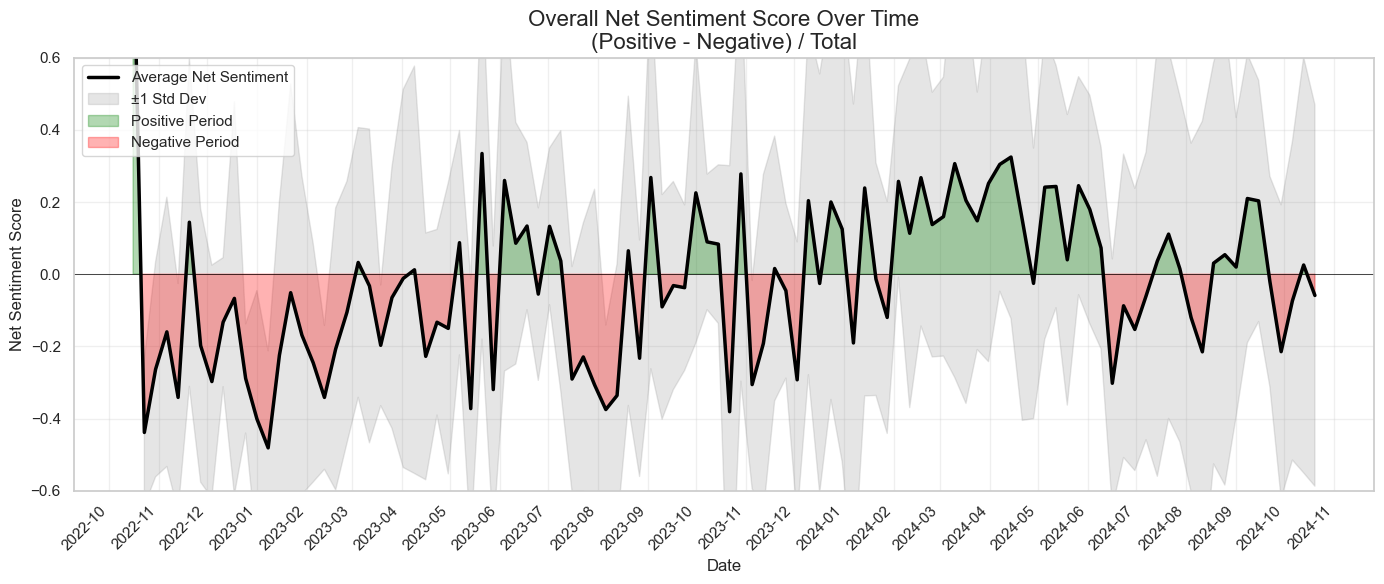


Generating per-party net sentiment plots...


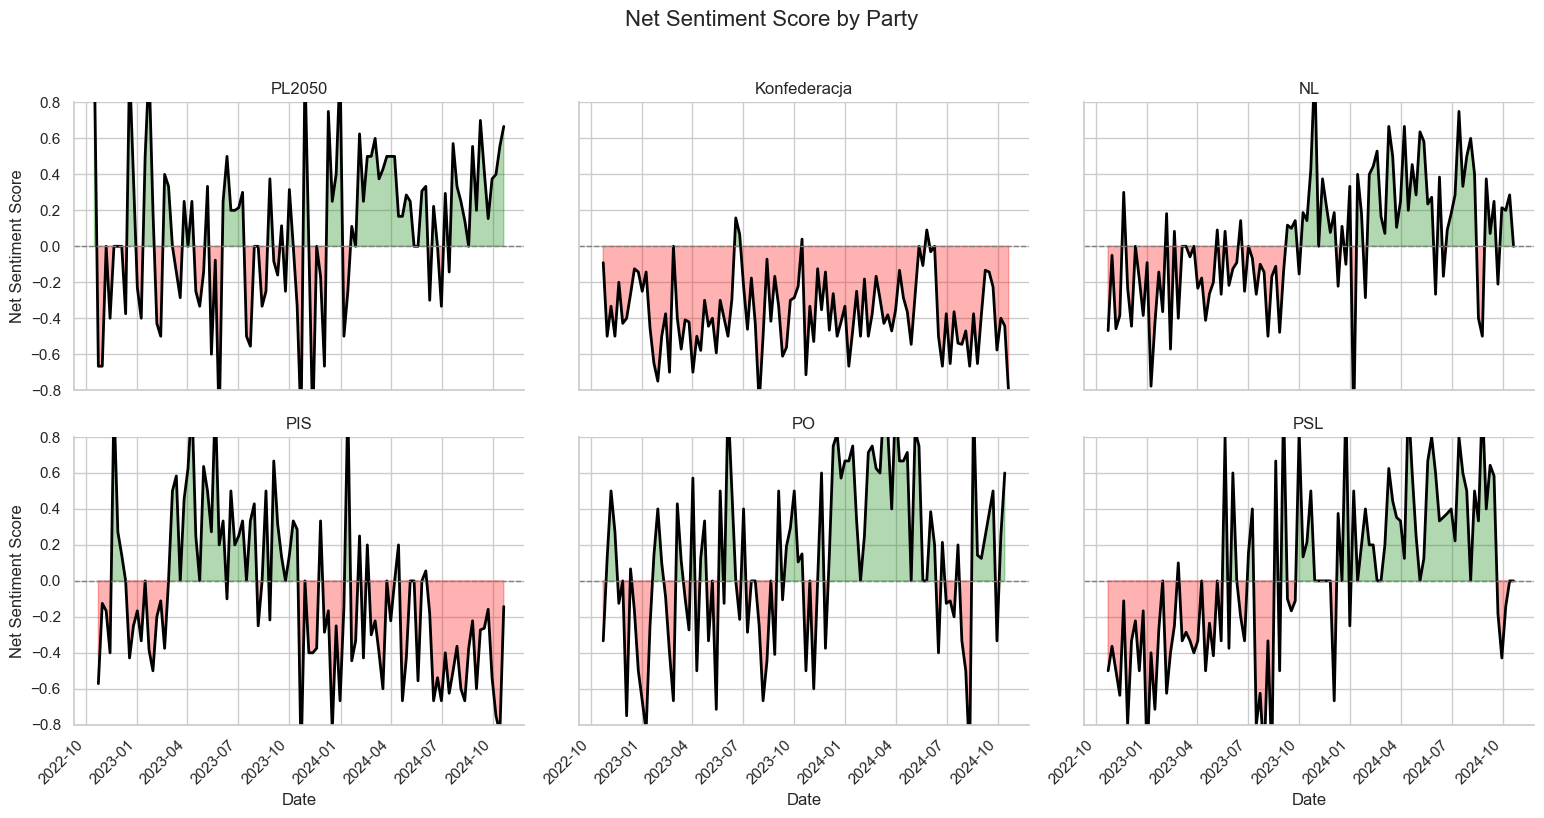


Net Sentiment Summary by Party:
               mean    std    min    max
party                                   
Konfederacja -0.369  0.208 -0.875  0.158
NL            0.032  0.346 -1.000  1.000
PIS          -0.084  0.431 -1.000  1.000
PL2050        0.099  0.435 -1.000  1.000
PO            0.125  0.464 -1.000  1.000
PSL           0.026  0.476 -1.000  1.000
------------------------------------------------------------


In [30]:
# Purpose: Shows sentiment polarity trends - positive values indicate optimistic sentiment, negative indicate pessimistic
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n" + "="*60)
print("--- Net Sentiment Score Analysis ---")
print("="*60)

# Configuration
TIME_FREQUENCY = 'W'  # 'W' for Weekly, 'ME' for Monthly
SHOW_CONFIDENCE_BAND = True  # Show confidence intervals

if 'df_sentiment_results' in locals() and 'final_sentiment_label' in df_sentiment_results.columns:
    try:
        # Prepare data
        df_net = df_sentiment_results.copy()
        df_net['created_at'] = pd.to_datetime(df_net['created_at'], utc=True)
        
        # Calculate sentiment counts by time and party
        sentiment_counts = df_net.groupby([
            pd.Grouper(key='created_at', freq=TIME_FREQUENCY),
            'party',
            'final_sentiment_label'
        ]).size().unstack(fill_value=0)
        
        # Ensure all sentiments exist
        for sentiment in ['Positive', 'Negative', 'Neutral']:
            if sentiment not in sentiment_counts.columns:
                sentiment_counts[sentiment] = 0
        
        # Calculate Net Sentiment Score: (Positive - Negative) / (Positive + Negative + Neutral)
        sentiment_counts['total'] = sentiment_counts[['Positive', 'Negative', 'Neutral']].sum(axis=1)
        sentiment_counts['net_score'] = (
            (sentiment_counts['Positive'] - sentiment_counts['Negative']) / 
            sentiment_counts['total'].replace(0, 1)  # Avoid division by zero
        )
        
        # Reset index for plotting
        plot_data = sentiment_counts[['net_score']].reset_index()
        
        # Calculate overall net sentiment (average across parties)
        overall_net = plot_data.groupby('created_at')['net_score'].agg(['mean', 'std'])
        
        # --- Plot 1: Overall Net Sentiment with Confidence Band ---
        fig, ax = plt.subplots(figsize=(14, 6))
        
        # Plot main line
        ax.plot(overall_net.index, overall_net['mean'], 
                color='black', linewidth=2.5, label='Average Net Sentiment')
        
        # Add confidence band if requested
        if SHOW_CONFIDENCE_BAND and 'std' in overall_net.columns:
            ax.fill_between(overall_net.index, 
                           overall_net['mean'] - overall_net['std'],
                           overall_net['mean'] + overall_net['std'],
                           alpha=0.2, color='gray', label='±1 Std Dev')
        
        # Color the area based on positive/negative
        ax.fill_between(overall_net.index, overall_net['mean'], 0,
                       where=(overall_net['mean'] >= 0),
                       color='green', alpha=0.3, interpolate=True, label='Positive Period')
        ax.fill_between(overall_net.index, overall_net['mean'], 0,
                       where=(overall_net['mean'] < 0),
                       color='red', alpha=0.3, interpolate=True, label='Negative Period')
        
        # Add zero line
        ax.axhline(0, color='black', linestyle='-', linewidth=0.5)
        
        # Formatting
        ax.set_title('Overall Net Sentiment Score Over Time\n(Positive - Negative) / Total', fontsize=16)
        ax.set_xlabel('Date')
        ax.set_ylabel('Net Sentiment Score')
        ax.set_ylim(-0.6, 0.6)
        ax.grid(True, alpha=0.3)
        ax.legend(loc='upper left')
        
        # Format dates
        import matplotlib.dates as mdates
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        # --- Plot 2: Net Sentiment by Party ---
        print("\nGenerating per-party net sentiment plots...")
        
        top_parties = df_net['party'].value_counts().head(6).index
        party_data = plot_data[plot_data['party'].isin(top_parties)]
        
        g = sns.FacetGrid(party_data, col='party', col_wrap=3,
                         height=4, aspect=1.3, sharex=True, sharey=True)
        
        def plot_net_sentiment(data, **kwargs):
            ax = plt.gca()
            ax.plot(data['created_at'], data['net_score'], color='black', linewidth=2)
            ax.fill_between(data['created_at'], data['net_score'], 0,
                           where=(data['net_score'] >= 0),
                           color='green', alpha=0.3, interpolate=True)
            ax.fill_between(data['created_at'], data['net_score'], 0,
                           where=(data['net_score'] < 0),
                           color='red', alpha=0.3, interpolate=True)
            ax.axhline(0, color='gray', linestyle='--', linewidth=1)
            ax.set_ylim(-0.8, 0.8)
        
        g.map_dataframe(plot_net_sentiment)
        g.set_titles("{col_name}")
        g.set_axis_labels("Date", "Net Sentiment Score")
        g.fig.suptitle('Net Sentiment Score by Party', fontsize=16, y=1.02)
        
        # Format dates
        for ax in g.axes.flat:
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print("\nNet Sentiment Summary by Party:")
        party_summary = plot_data.groupby('party')['net_score'].agg(['mean', 'std', 'min', 'max'])
        print(party_summary.round(3))
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

print("-" * 60)

##### 9.2. Net Sentiment Score Over Time - paper graphs

In [31]:
# ==================================================================================
# PLOT 5: NET SENTIMENT SCORE - OVERALL AND BY PARTY
# ==================================================================================

def plot_net_sentiment_score_paper(df, freq='W', show_confidence_band=True):
    """
    Net sentiment score with overall and by-party views
    Formula: (Positive - Negative) / Total
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    
    print("\n" + "="*60)
    print("--- Net Sentiment Score Analysis ---")
    print("="*60)
    
    print("\nNet Sentiment Score Formula:")
    print("Score = (Positive Tweets - Negative Tweets) / Total Tweets")
    print("Range: -1 (all negative) to +1 (all positive), 0 = balanced sentiment")
    
    df_net = df.copy()
    df_net['created_at'] = pd.to_datetime(df_net['created_at'], utc=True)
    
    # Calculate sentiment counts by time and party
    sentiment_counts = df_net.groupby([
        pd.Grouper(key='created_at', freq=freq),
        'party',
        'final_sentiment_label'
    ]).size().unstack(fill_value=0)
    
    # Ensure all sentiments exist
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        if sentiment not in sentiment_counts.columns:
            sentiment_counts[sentiment] = 0
    
    # Calculate Net Sentiment Score
    sentiment_counts['total'] = sentiment_counts[['Positive', 'Negative', 'Neutral']].sum(axis=1)
    sentiment_counts['net_score'] = (
        (sentiment_counts['Positive'] - sentiment_counts['Negative']) / 
        sentiment_counts['total'].replace(0, 1)
    )
    
    plot_data = sentiment_counts[['net_score']].reset_index()
    
    # Calculate overall net sentiment
    overall_net = plot_data.groupby('created_at')['net_score'].agg(['mean', 'std'])
    
    # PLOT 1: Overall Net Sentiment
    #fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), height_ratios=[2, 1])
    fig1, ax1 = plt.subplots(1, 1, figsize=(14, 7)) # one plot without volume 

    ax1.plot(overall_net.index, overall_net['mean'], 
             color='black', linewidth=2.5, label='Average Net Sentiment')
    
    if show_confidence_band and 'std' in overall_net.columns:
        ax1.fill_between(overall_net.index, 
                        overall_net['mean'] - overall_net['std'],
                        overall_net['mean'] + overall_net['std'],
                        alpha=0.2, color='gray', label='±1 Std Dev')
    
    ax1.fill_between(overall_net.index, overall_net['mean'], 0,
                     where=(overall_net['mean'] >= 0),
                     color='green', alpha=0.3, interpolate=True, label='Positive Period')
    ax1.fill_between(overall_net.index, overall_net['mean'], 0,
                     where=(overall_net['mean'] < 0),
                     color='red', alpha=0.3, interpolate=True, label='Negative Period')
    
    ax1.axhline(0, color='black', linestyle='-', linewidth=0.5)
    
    # Election line
    election_dt = pd.to_datetime('2023-10-15', utc=True)
    ax1.axvline(election_dt, color='red', linestyle='--', linewidth=1, 
                label='Election Day', alpha=0.7)
    
    ax1.set_title('Overall Net Sentiment Score of Economic Discourse', 
                  fontsize=16, fontweight='bold')
    ax1.set_ylabel('Net Sentiment Score', fontsize=12)
    ax1.set_ylim(-0.6, 0.6)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.legend(loc='upper left', fontsize=11)
    
    # # Tweet volume
    # tweet_counts = plot_data.groupby('created_at').size()
    # ax2.bar(tweet_counts.index, tweet_counts.values, 
    #         color='gray', alpha=0.5, label='Tweet Volume')
    # ax2.set_xlabel('Date', fontsize=12)
    # ax2.set_ylabel('Number of Tweets', fontsize=12)
    # ax2.set_title('Tweet Volume (for context)', fontsize=12)
    # ax2.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # plt.tight_layout()
    # plt.show()
    
    # PLOT 2: Net Sentiment by Party
    print("\nGenerating per-party net sentiment plots...")
    
    top_parties = df_net['party'].value_counts().head(6).index
    party_data = plot_data[plot_data['party'].isin(top_parties)]
    
    fig2, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
    axes_flat = axes.flatten()
    
    party_stats = []
    
    for idx, party in enumerate(top_parties):
        ax = axes_flat[idx]
        data = party_data[party_data['party'] == party]
        
        if not data.empty:
            ax.plot(data['created_at'], data['net_score'], color='black', linewidth=1)
            ax.fill_between(data['created_at'], data['net_score'], 0,
                           where=(data['net_score'] >= 0),
                           color='green', alpha=0.3, interpolate=True)
            ax.fill_between(data['created_at'], data['net_score'], 0,
                           where=(data['net_score'] < 0),
                           color='red', alpha=0.3, interpolate=True)
            ax.axhline(0, color='gray', linestyle='--', linewidth=1)
            ax.axvline(election_dt, color='red', linestyle='--', alpha=0.5)
            
            ax.set_title(party, fontsize=14, fontweight='bold')
            ax.set_ylim(-0.8, 0.8)
            ax.grid(True, alpha=0.3)
            
            # Calculate statistics
            pre_election_score = data[data['created_at'] < election_dt]['net_score'].mean()
            post_election_score = data[data['created_at'] >= election_dt]['net_score'].mean()
            overall_mean = data['net_score'].mean()
            
            party_stats.append({
                'Party': party,
                'Overall_Mean': overall_mean,
                'Pre_Election': pre_election_score,
                'Post_Election': post_election_score,
                'Change': post_election_score - pre_election_score
            })
    
    # Remove empty subplots
    for idx in range(len(top_parties), len(axes_flat)):
        fig2.delaxes(axes_flat[idx])
    
    plt.suptitle('Net Sentiment Score by Party', fontsize=16, fontweight='bold')
    
    for ax in axes_flat[:len(top_parties)]:
        ax.set_ylabel('Net Sentiment Score', fontsize=10)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nTable 4: Net Sentiment Score Statistics")
    print("-" * 90)
    print(f"{'Party':<15} {'Overall Mean':>15} {'Pre-Election':>15} {'Post-Election':>15} {'Change':>15}")
    print("-" * 90)
    
    # Overall statistics
    print(f"{'ALL PARTIES':<15} {overall_net['mean'].mean():>15.3f} "
          f"{overall_net[overall_net.index < election_dt]['mean'].mean():>15.3f} "
          f"{overall_net[overall_net.index >= election_dt]['mean'].mean():>15.3f} "
          f"{overall_net[overall_net.index >= election_dt]['mean'].mean() - overall_net[overall_net.index < election_dt]['mean'].mean():>+15.3f}")
    
    print("-" * 90)
    
    # Party statistics
    for stats in party_stats:
        print(f"{stats['Party']:<15} {stats['Overall_Mean']:>15.3f} "
              f"{stats['Pre_Election']:>15.3f} {stats['Post_Election']:>15.3f} "
              f"{stats['Change']:>+15.3f}")
    print("-" * 90)


--- Net Sentiment Score Analysis ---

Net Sentiment Score Formula:
Score = (Positive Tweets - Negative Tweets) / Total Tweets
Range: -1 (all negative) to +1 (all positive), 0 = balanced sentiment

Generating per-party net sentiment plots...


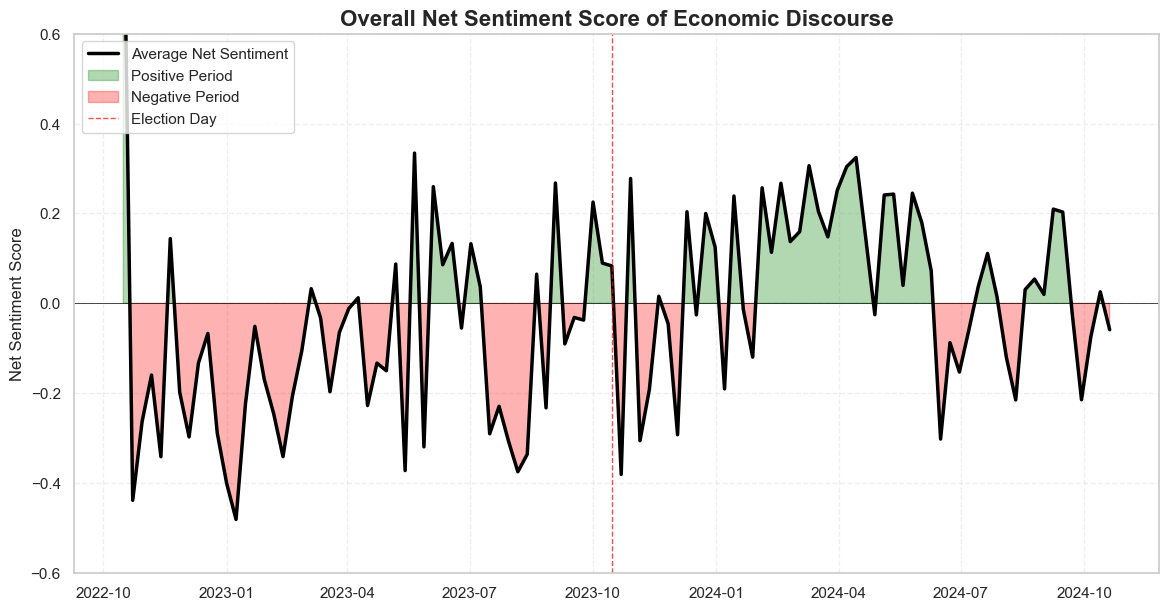

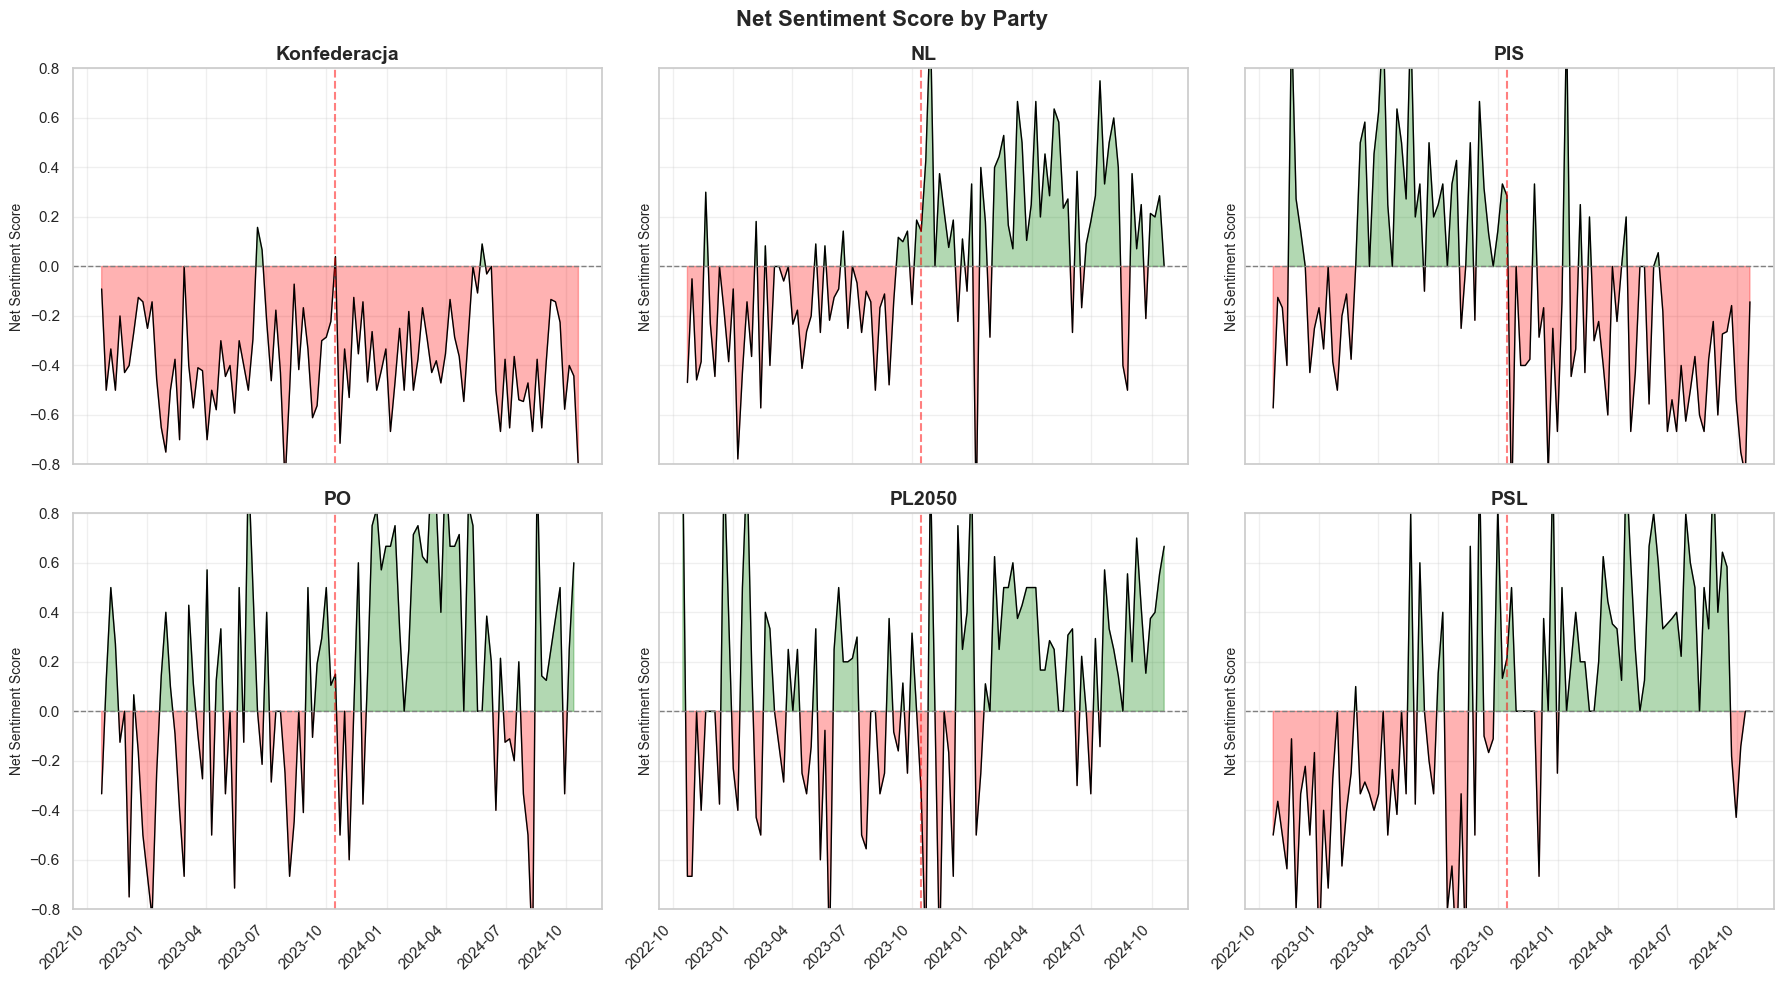


Table 4: Net Sentiment Score Statistics
------------------------------------------------------------------------------------------
Party              Overall Mean    Pre-Election   Post-Election          Change
------------------------------------------------------------------------------------------
ALL PARTIES              -0.023          -0.096           0.048          +0.144
------------------------------------------------------------------------------------------
Konfederacja             -0.369          -0.373          -0.366          +0.007
NL                        0.032          -0.164           0.217          +0.381
PIS                      -0.084           0.144          -0.300          -0.443
PO                        0.125          -0.040           0.283          +0.323
PL2050                    0.099          -0.015           0.206          +0.222
PSL                       0.026          -0.232           0.279          +0.511
----------------------------------------------

In [32]:
# 5. Net sentiment - overall and by party
plot_net_sentiment_score_paper(df_sentiment_results, freq='W', show_confidence_band=False)

##### 10. Sentiment Distribution for Top Keywords


--- Keyword Sentiment Analysis ---
Total keyword occurrences: 8,017


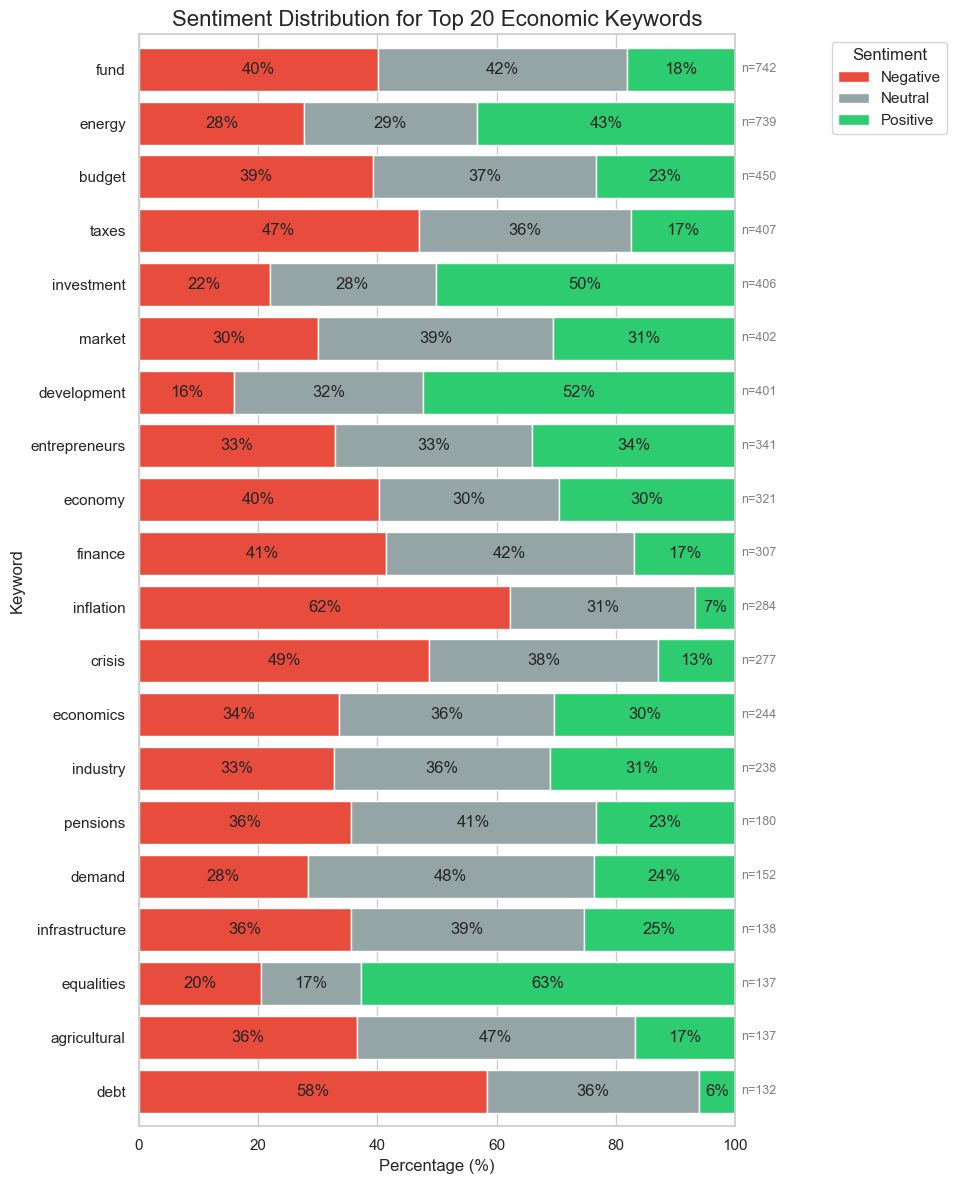


Most Positive Keywords:
final_sentiment_label       Positive  total_count
matched_keywords_FILTERED                        
equalities                 62.773723          137
development                52.369077          401
investment                 50.246305          406
energy                     43.301759          739
entrepreneurs              34.017595          341

Most Negative Keywords:
final_sentiment_label       Negative  total_count
matched_keywords_FILTERED                        
inflation                  62.323944          284
debt                       58.333333          132
crisis                     48.736462          277
taxes                      46.928747          407
finance                    41.368078          307
------------------------------------------------------------


In [33]:
# Purpose: Analyzes which economic keywords are associated with positive/negative sentiment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*60)
print("--- Keyword Sentiment Analysis ---")
print("="*60)

# Configuration
TOP_N_KEYWORDS = 20
MIN_KEYWORD_COUNT = 10  # Minimum occurrences to include keyword

if 'df_sentiment_results' in locals() and 'matched_keywords_FILTERED' in df_sentiment_results.columns:
    try:
        # Prepare data
        df_keywords = df_sentiment_results[['matched_keywords_FILTERED', 'final_sentiment_label']].copy()
        df_keywords = df_keywords.dropna(subset=['matched_keywords_FILTERED'])
        
        # Ensure keywords are lists
        if isinstance(df_keywords['matched_keywords_FILTERED'].iloc[0], str):
            import ast
            df_keywords['matched_keywords_FILTERED'] = df_keywords['matched_keywords_FILTERED'].apply(
                lambda x: ast.literal_eval(x) if x.startswith('[') else x.split()
            )
        
        # Explode keywords
        df_exploded = df_keywords.explode('matched_keywords_FILTERED')
        df_exploded = df_exploded[df_exploded['matched_keywords_FILTERED'] != '']
        
        print(f"Total keyword occurrences: {len(df_exploded):,}")
        
        # Get top keywords
        keyword_counts = df_exploded['matched_keywords_FILTERED'].value_counts()
        top_keywords = keyword_counts[keyword_counts >= MIN_KEYWORD_COUNT].head(TOP_N_KEYWORDS).index
        
        # Filter to top keywords
        df_top = df_exploded[df_exploded['matched_keywords_FILTERED'].isin(top_keywords)]
        
        # Calculate sentiment distribution
        sentiment_dist = df_top.groupby(['matched_keywords_FILTERED', 'final_sentiment_label']).size().unstack(fill_value=0)
        sentiment_pct = sentiment_dist.div(sentiment_dist.sum(axis=1), axis=0) * 100
        
        # Add total count for sorting
        sentiment_pct['total_count'] = sentiment_dist.sum(axis=1)
        sentiment_pct = sentiment_pct.sort_values('total_count', ascending=True)  # Ascending for horizontal bars
        
        # Create horizontal bar chart
        fig, ax = plt.subplots(figsize=(10, 12))
        
        # Plot stacked bars
        colors = {'Negative': '#e74c3c', 'Neutral': '#95a5a6', 'Positive': '#2ecc71'}
        sentiment_cols = [col for col in ['Negative', 'Neutral', 'Positive'] if col in sentiment_pct.columns]
        
        sentiment_pct[sentiment_cols].plot(kind='barh', stacked=True, ax=ax,
                                          color=[colors[col] for col in sentiment_cols],
                                          width=0.8)
        
        # Add count labels on the right
        for idx, (keyword, row) in enumerate(sentiment_pct.iterrows()):
            ax.text(101, idx, f"n={int(row['total_count'])}", 
                   va='center', fontsize=9, color='gray')
        
        # Formatting
        ax.set_title(f'Sentiment Distribution for Top {TOP_N_KEYWORDS} Economic Keywords', fontsize=16)
        ax.set_xlabel('Percentage (%)')
        ax.set_ylabel('Keyword')
        ax.set_xlim(0, 100)
        ax.legend(title='Sentiment', bbox_to_anchor=(1.15, 1), loc='upper left')
        
        # Add percentage labels in bars
        for container in ax.containers[:3]:  # Only first 3 containers (sentiments)
            labels = [f'{v:.0f}%' if v > 5 else '' for v in container.datavalues]
            ax.bar_label(container, labels=labels, label_type='center')
        
        plt.tight_layout()
        plt.show()
        
        # Print keywords with highest positive/negative bias
        print("\nMost Positive Keywords:")
        if 'Positive' in sentiment_pct.columns:
            print(sentiment_pct.nlargest(5, 'Positive')[['Positive', 'total_count']])
        
        print("\nMost Negative Keywords:")
        if 'Negative' in sentiment_pct.columns:
            print(sentiment_pct.nlargest(5, 'Negative')[['Negative', 'total_count']])
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

print("-" * 60)

##### 11. Party Sentiment Distribution - Before vs After Election


--- Party Sentiment: Before vs After Election ---


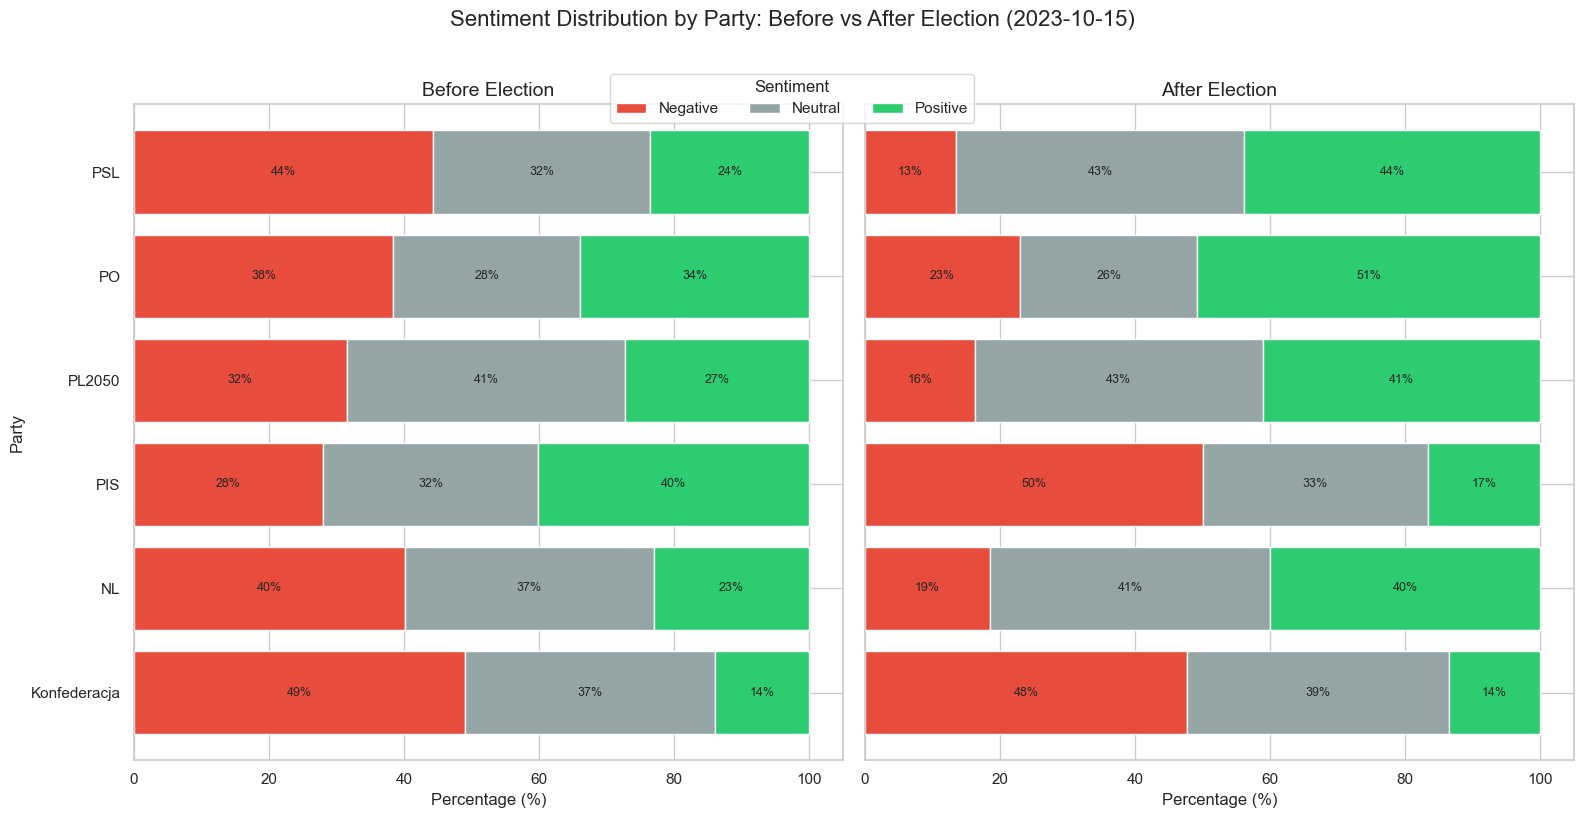

In [34]:
# Purpose: Shows sentiment proportions for each party in two time periods
import pandas as pd
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("--- Party Sentiment: Before vs After Election ---")
print("="*60)

# Configuration
ELECTION_DATE = '2023-10-15'
TOP_N_PARTIES = 8

if 'df_sentiment_results' in locals():
    try:
        # Prepare data
        df_period = df_sentiment_results.copy()
        df_period['created_at'] = pd.to_datetime(df_period['created_at'], utc=True)
        election_date = pd.to_datetime(ELECTION_DATE, utc=True)
        
        # Add period column
        df_period['period'] = df_period['created_at'].apply(
            lambda x: 'Before' if x < election_date else 'After'
        )
        
        # Get top parties
        top_parties = df_period['party'].value_counts().head(TOP_N_PARTIES).index
        
        # Calculate proportions
        party_period_sentiment = df_period[df_period['party'].isin(top_parties)].groupby(
            ['party', 'period', 'final_sentiment_label']
        ).size().unstack(fill_value=0)
        
        party_period_sentiment_pct = party_period_sentiment.div(
            party_period_sentiment.sum(axis=1), axis=0
        ) * 100
        
        # Create subplots for Before and After
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
        
        colors = {'Negative': '#e74c3c', 'Neutral': '#95a5a6', 'Positive': '#2ecc71'}
        
        # Before Election
        before_data = party_period_sentiment_pct.loc[
            party_period_sentiment_pct.index.get_level_values('period') == 'Before'
        ]
        if not before_data.empty:
            before_data = before_data.droplevel('period')
            before_data.plot(kind='barh', stacked=True, ax=ax1,
                           color=[colors.get(col, '#333') for col in before_data.columns],
                           width=0.8, legend=False)
            ax1.set_title('Before Election', fontsize=14)
            ax1.set_xlabel('Percentage (%)')
            ax1.set_ylabel('Party')
            
            # Add labels
            for container in ax1.containers:
                labels = [f'{v:.0f}%' if v > 5 else '' for v in container.datavalues]
                ax1.bar_label(container, labels=labels, label_type='center', fontsize=9)
        
        # After Election
        after_data = party_period_sentiment_pct.loc[
            party_period_sentiment_pct.index.get_level_values('period') == 'After'
        ]
        if not after_data.empty:
            after_data = after_data.droplevel('period')
            after_data.plot(kind='barh', stacked=True, ax=ax2,
                          color=[colors.get(col, '#333') for col in after_data.columns],
                          width=0.8, legend=False)
            ax2.set_title('After Election', fontsize=14)
            ax2.set_xlabel('Percentage (%)')
            
            # Add labels
            for container in ax2.containers:
                labels = [f'{v:.0f}%' if v > 5 else '' for v in container.datavalues]
                ax2.bar_label(container, labels=labels, label_type='center', fontsize=9)
        
        # Add central legend
        handles, labels = ax1.get_legend_handles_labels()
        fig.legend(handles, labels, title='Sentiment', loc='upper center', 
                  bbox_to_anchor=(0.5, 0.95), ncol=3)
        
        plt.suptitle(f'Sentiment Distribution by Party: Before vs After Election ({ELECTION_DATE})', 
                    fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

##### 12. Top Keywords Sentiment Analysis by Party (Heatmap)


--- Top Keywords Sentiment by Party ---


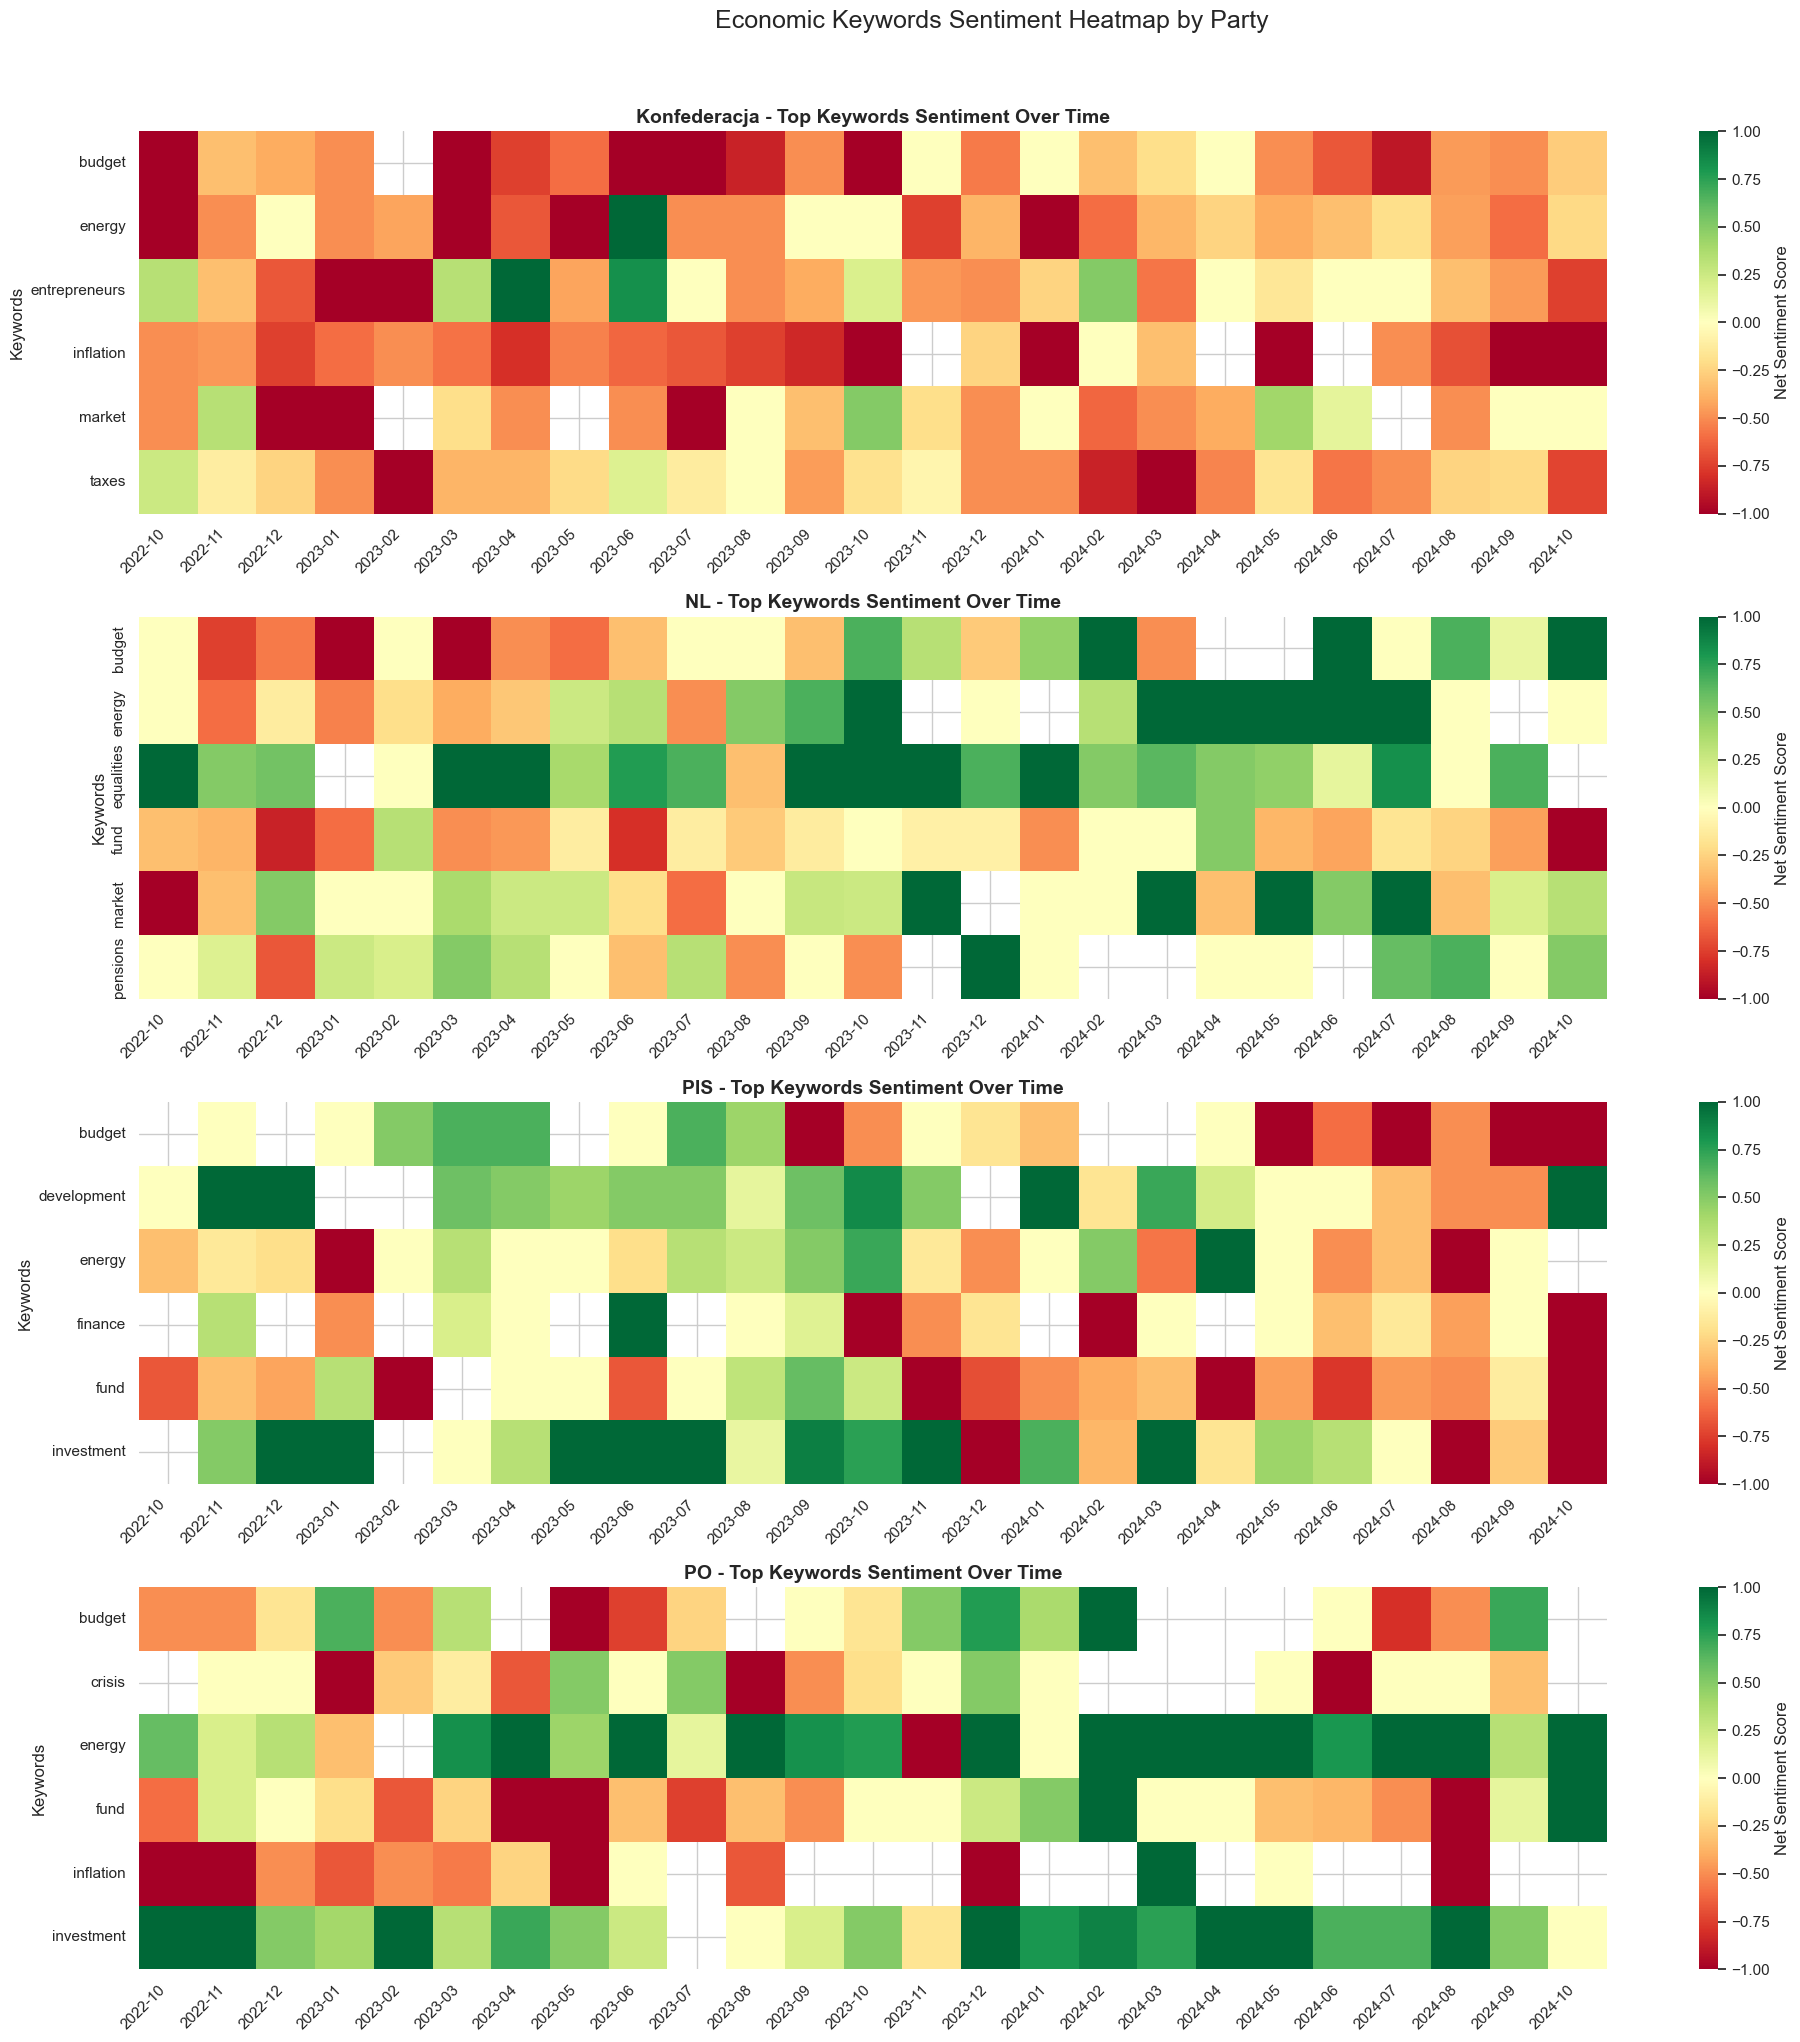

In [35]:
# Purpose: Shows sentiment patterns for most discussed economic terms within each party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

print("\n" + "="*60)
print("--- Top Keywords Sentiment by Party ---")
print("="*60)

# Configuration
TOP_N_KEYWORDS_PER_PARTY = 6
TOP_N_PARTIES = 4
TIME_FREQUENCY = 'ME'  # Monthly for cleaner visualization

if 'df_sentiment_results' in locals() and all(col in df_sentiment_results.columns for col in 
    ['matched_keywords_FILTERED', 'final_sentiment_label', 'party', 'created_at']):
    try:
        # Prepare data
        df_analysis = df_sentiment_results.copy()
        df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
        
        # Get top parties
        top_parties = df_analysis['party'].value_counts().head(TOP_N_PARTIES).index
        
        # Create figure for all parties
        fig = plt.figure(figsize=(20, 5 * TOP_N_PARTIES))
        
        for party_idx, party in enumerate(top_parties):
            # Get party data
            party_data = df_analysis[df_analysis['party'] == party]
            
            # Extract all keywords for this party
            all_keywords = []
            for keywords_list in party_data['matched_keywords_FILTERED'].dropna():
                if isinstance(keywords_list, list):
                    all_keywords.extend(keywords_list)
            
            # Get top keywords
            keyword_counts = Counter(all_keywords)
            top_keywords = [kw for kw, _ in keyword_counts.most_common(TOP_N_KEYWORDS_PER_PARTY)]
            
            # Create subplot for this party
            ax = plt.subplot(TOP_N_PARTIES, 1, party_idx + 1)
            
            # Prepare data for heatmap
            heatmap_data = []
            
            for keyword in top_keywords:
                # Filter data for this keyword
                keyword_data = party_data[party_data['matched_keywords_FILTERED'].apply(
                    lambda x: isinstance(x, list) and keyword in x
                )]
                
                if not keyword_data.empty:
                    # Group by time and calculate sentiment percentages
                    time_sentiment = keyword_data.groupby([
                        pd.Grouper(key='created_at', freq=TIME_FREQUENCY),
                        'final_sentiment_label'
                    ]).size().unstack(fill_value=0)
                    
                    # Calculate net sentiment score for each time period
                    time_sentiment['net_score'] = (
                        (time_sentiment.get('Positive', 0) - time_sentiment.get('Negative', 0)) / 
                        time_sentiment.sum(axis=1).replace(0, 1)
                    )
                    
                    # Add to heatmap data
                    for date, score in time_sentiment['net_score'].items():
                        heatmap_data.append({
                            'keyword': keyword,
                            'date': date,
                            'net_score': score
                        })
            
            # Create heatmap
            if heatmap_data:
                heatmap_df = pd.DataFrame(heatmap_data)
                pivot_data = heatmap_df.pivot(index='keyword', columns='date', values='net_score')
                
                # Plot heatmap
                sns.heatmap(pivot_data, 
                           cmap='RdYlGn', center=0, vmin=-1, vmax=1,
                           cbar_kws={'label': 'Net Sentiment Score'},
                           ax=ax, 
                           xticklabels=True,
                           yticklabels=True)
                
                # Format x-axis dates
                date_labels = [d.strftime('%Y-%m') for d in pivot_data.columns]
                ax.set_xticklabels(date_labels, rotation=45, ha='right')
                
                ax.set_title(f'{party} - Top Keywords Sentiment Over Time', fontsize=14, fontweight='bold')
                ax.set_xlabel('')
                ax.set_ylabel('Keywords')
            else:
                ax.text(0.5, 0.5, f'No data for {party}', ha='center', va='center', 
                       transform=ax.transAxes)
                ax.set_title(f'{party}', fontsize=14, fontweight='bold')
        
        plt.suptitle('Economic Keywords Sentiment Heatmap by Party', fontsize=18, y=1.02)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

##### 13.1. Calculate and Plot Percentage Sentiment Change (Before vs After Election)


--- Sentiment Change Analysis: Before vs After Election ---

Sentiment Changes by Party:
--------------------------------------------------------------------------------

Konfederacja:
  Positive: 100 → 132 (+32.0%)
  Negative: 352 → 464 (+31.8%)
  Neutral: 266 → 377 (+41.7%)

NL:
  Positive: 163 → 203 (+24.5%)
  Negative: 284 → 94 (-66.9%)
  Neutral: 261 → 210 (-19.5%)

PIS:
  Positive: 166 → 81 (-51.2%)
  Negative: 116 → 244 (+110.3%)
  Neutral: 132 → 163 (+23.5%)

PL2050:
  Positive: 101 → 157 (+55.4%)
  Negative: 117 → 62 (-47.0%)
  Neutral: 153 → 163 (+6.5%)

PO:
  Positive: 170 → 166 (-2.4%)
  Negative: 193 → 75 (-61.1%)
  Neutral: 139 → 86 (-38.1%)

PSL:
  Positive: 94 → 124 (+31.9%)
  Negative: 177 → 38 (-78.5%)
  Neutral: 129 → 121 (-6.2%)


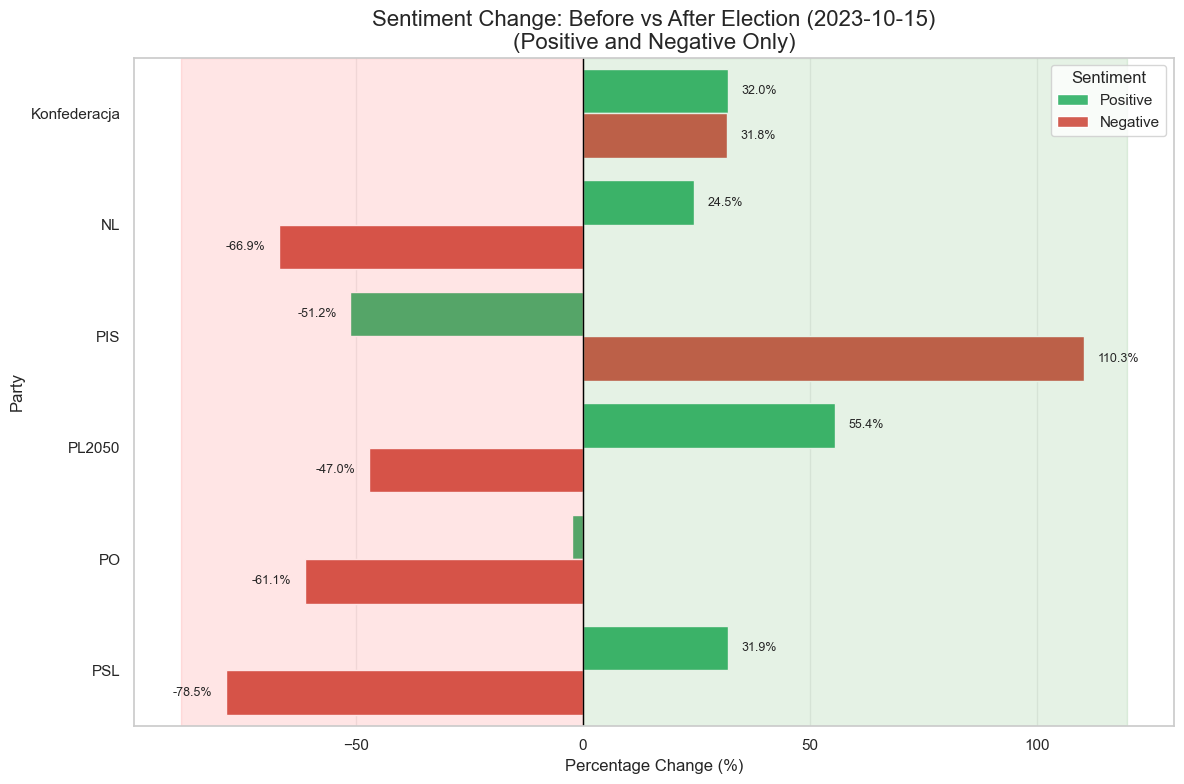

In [36]:
# Purpose: Shows how sentiment changed after the election for each party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n" + "="*60)
print("--- Sentiment Change Analysis: Before vs After Election ---")
print("="*60)

# Configuration
ELECTION_DATE = '2023-10-15'
PARTY_COL = 'party'

if 'df_sentiment_results' in locals():
    try:
        # Prepare data
        df_analysis = df_sentiment_results.copy()
        df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
        election_date = pd.to_datetime(ELECTION_DATE, utc=True)
        
        # Add period column
        df_analysis['period'] = df_analysis['created_at'].apply(
            lambda x: 'Before Election' if x < election_date else 'After Election'
        )
        
        # Calculate sentiment counts by party and period
        sentiment_counts = df_analysis.groupby([PARTY_COL, 'period', 'final_sentiment_label']).size().unstack(fill_value=0)
        
        # Calculate percentage change
        results = []
        
        for party in sentiment_counts.index.get_level_values(PARTY_COL).unique():
            party_data = sentiment_counts.loc[party]
            
            if len(party_data) == 2:  # Has both before and after data
                before = party_data.loc['Before Election']
                after = party_data.loc['After Election']
                
                for sentiment in ['Positive', 'Negative', 'Neutral']:
                    if sentiment in before.index and sentiment in after.index:
                        before_count = before[sentiment]
                        after_count = after[sentiment]
                        
                        # Calculate percentage change
                        if before_count > 0:
                            pct_change = ((after_count - before_count) / before_count) * 100
                        else:
                            pct_change = 100 if after_count > 0 else 0
                        
                        results.append({
                            'Party': party,
                            'Sentiment': sentiment,
                            'Before': before_count,
                            'After': after_count,
                            'Pct_Change': pct_change
                        })
        
        # Create DataFrame from results
        df_changes = pd.DataFrame(results)
        
        # Print summary table
        print("\nSentiment Changes by Party:")
        print("-" * 80)
        for party in df_changes['Party'].unique():
            print(f"\n{party}:")
            party_changes = df_changes[df_changes['Party'] == party]
            for _, row in party_changes.iterrows():
                print(f"  {row['Sentiment']}: {row['Before']} → {row['After']} ({row['Pct_Change']:+.1f}%)")
        
        # Create visualization
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # Filter for Positive and Negative only for cleaner visualization
        df_plot = df_changes[df_changes['Sentiment'].isin(['Positive', 'Negative'])]
        
        # Create grouped bar chart
        bar_plot = sns.barplot(data=df_plot, 
                              y='Party', 
                              x='Pct_Change',
                              hue='Sentiment',
                              palette={'Positive': '#2ecc71', 'Negative': '#e74c3c'},
                              orient='h')
        
        # Add zero line
        ax.axvline(0, color='black', linewidth=1, linestyle='-')
        
        # Formatting
        ax.set_xlabel('Percentage Change (%)', fontsize=12)
        ax.set_ylabel('Party', fontsize=12)
        ax.set_title(f'Sentiment Change: Before vs After Election ({ELECTION_DATE})\n(Positive and Negative Only)', 
                    fontsize=16)
        
        # Add value labels
        for p in ax.patches:
            width = p.get_width()
            if abs(width) > 5:  # Only show label if change is significant
                ax.text(width + (3 if width > 0 else -3),
                       p.get_y() + p.get_height()/2,
                       f'{width:.1f}%',
                       ha='left' if width > 0 else 'right',
                       va='center',
                       fontsize=9)
        
        # Color background
        ax.axvspan(0, ax.get_xlim()[1], alpha=0.1, color='green')
        ax.axvspan(ax.get_xlim()[0], 0, alpha=0.1, color='red')
        
        ax.legend(title='Sentiment', loc='best')
        ax.grid(axis='x', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

##### 13.2. Sentiment shift analysis - paper graphs

In [37]:
# ==================================================================================
# PLOT 6A: ABSOLUTE CHANGE IN SENTIMENT (SEPARATE PLOT)
# ==================================================================================

def plot_sentiment_absolute_change_paper(df, election_date='2023-10-15'):
    """
    Shows absolute change in sentiment tweet counts
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    
    print("\n" + "="*60)
    print("--- Absolute Change in Sentiment Tweets ---")
    print("="*60)
    
    df_analysis = df.copy()
    df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)
    
    df_analysis['period'] = df_analysis['created_at'].apply(
        lambda x: 'Pre-Election' if x < election_dt else 'Post-Election'
    )
    
    sentiment_summary = df_analysis.groupby(['party', 'period', 'final_sentiment_label']).size().unstack(fill_value=0)
    top_parties = df_analysis['party'].value_counts().head(6).index
    
    results = []
    for party in top_parties:
        if party in sentiment_summary.index.get_level_values('party'):
            party_data = sentiment_summary.loc[party]
            if len(party_data) == 2:
                pre = party_data.loc['Pre-Election']
                post = party_data.loc['Post-Election']
                
                results.append({
                    'Party': party,
                    'Pos_Change': post.get('Positive', 0) - pre.get('Positive', 0),
                    'Neg_Change': post.get('Negative', 0) - pre.get('Negative', 0),
                    'Neu_Change': post.get('Neutral', 0) - pre.get('Neutral', 0)
                })
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    parties = [r['Party'] for r in results]
    y_pos = np.arange(len(parties))
    bar_height = 0.25
    
    # Plot three bars for each party
    bars1 = ax.barh(y_pos - bar_height, [r['Pos_Change'] for r in results], 
                     bar_height, label='Positive', color='#2ecc71')
    bars2 = ax.barh(y_pos, [r['Neg_Change'] for r in results], 
                     bar_height, label='Negative', color='#e74c3c')
    bars3 = ax.barh(y_pos + bar_height, [r['Neu_Change'] for r in results], 
                     bar_height, label='Neutral', color='#95a5a6')
    
    # Add value labels
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            width = bar.get_width()
            if abs(width) > 0:
                ax.text(width + (2 if width > 0 else -2), 
                       bar.get_y() + bar.get_height()/2,
                       f'{int(width):+d}', 
                       ha='left' if width > 0 else 'right', 
                       va='center', fontsize=10, fontweight='bold')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(parties)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_xlabel('Change in Number of Tweets', fontsize=14)
    ax.set_title(f'Absolute Change in Sentiment\n(Post-Election minus Pre-Election)', 
                 fontsize=16, fontweight='bold')
    ax.legend(loc='best', fontsize=12)
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print table
    print("\nTable: Absolute Change in Tweet Counts by Sentiment")
    print("-" * 70)
    print(f"{'Party':<15} {'Positive':>12} {'Negative':>12} {'Neutral':>12} {'Total':>12}")
    print("-" * 70)
    for r in results:
        total = r['Pos_Change'] + r['Neg_Change'] + r['Neu_Change']
        print(f"{r['Party']:<15} {r['Pos_Change']:>+12} {r['Neg_Change']:>+12} "
              f"{r['Neu_Change']:>+12} {total:>+12}")
    print("-" * 70)


# ==================================================================================
# PLOT 6B: PERCENTAGE CHANGE IN SENTIMENT (SEPARATE PLOT)
# ==================================================================================

def plot_sentiment_percentage_change_paper(df, election_date='2023-10-15'):
    """
    Shows percentage change in sentiment with extended x-axis range
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    
    print("\n" + "="*60)
    print("--- Percentage Change in Sentiment ---")
    print("="*60)
    
    df_analysis = df.copy()
    df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)
    
    df_analysis['period'] = df_analysis['created_at'].apply(
        lambda x: 'Pre-Election' if x < election_dt else 'Post-Election'
    )
    
    sentiment_summary = df_analysis.groupby(['party', 'period', 'final_sentiment_label']).size().unstack(fill_value=0)
    top_parties = df_analysis['party'].value_counts().head(6).index
    
    results = []
    for party in top_parties:
        if party in sentiment_summary.index.get_level_values('party'):
            party_data = sentiment_summary.loc[party]
            if len(party_data) == 2:
                pre = party_data.loc['Pre-Election']
                post = party_data.loc['Post-Election']
                
                # Calculate percentage changes
                pos_pct = ((post.get('Positive', 0) - pre.get('Positive', 0)) / pre.get('Positive', 1) * 100) if pre.get('Positive', 0) > 0 else 0
                neg_pct = ((post.get('Negative', 0) - pre.get('Negative', 0)) / pre.get('Negative', 1) * 100) if pre.get('Negative', 0) > 0 else 0
                neu_pct = ((post.get('Neutral', 0) - pre.get('Neutral', 0)) / pre.get('Neutral', 1) * 100) if pre.get('Neutral', 0) > 0 else 0
                
                results.append({
                    'Party': party,
                    'Pos_Pct': pos_pct,
                    'Neg_Pct': neg_pct,
                    'Neu_Pct': neu_pct
                })
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    parties = [r['Party'] for r in results]
    y_pos = np.arange(len(parties))
    bar_height = 0.25
    
    # Plot three bars for each party
    bars1 = ax.barh(y_pos - bar_height, [r['Pos_Pct'] for r in results], 
                     bar_height, label='Positive', color='#2ecc71')
    bars2 = ax.barh(y_pos, [r['Neg_Pct'] for r in results], 
                     bar_height, label='Negative', color='#e74c3c')
    bars3 = ax.barh(y_pos + bar_height, [r['Neu_Pct'] for r in results], 
                     bar_height, label='Neutral', color='#95a5a6')
    
    # Add value labels
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            width = bar.get_width()
            if abs(width) > 5:
                ax.text(width + (5 if width > 0 else -5), 
                       bar.get_y() + bar.get_height()/2,
                       f'{width:.0f}%', 
                       ha='left' if width > 0 else 'right', 
                       va='center', fontsize=10, fontweight='bold')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(parties)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_xlabel('Percentage Change (%)', fontsize=14)
    ax.set_title(f'Relative Change in Sentiment\n(Percentage Increase/Decrease)', 
                 fontsize=16, fontweight='bold')
    ax.legend(loc='best', fontsize=12)
    ax.grid(axis='x', alpha=0.3)
    
    # Set extended x-axis range
    ax.set_xlim(-100, 120)
    
    plt.tight_layout()
    plt.show()
    
    # Print table
    print("\nTable: Percentage Change in Tweet Counts by Sentiment")
    print("-" * 70)
    print(f"{'Party':<15} {'Positive':>12} {'Negative':>12} {'Neutral':>12}")
    print("-" * 70)
    for r in results:
        print(f"{r['Party']:<15} {r['Pos_Pct']:>+11.1f}% {r['Neg_Pct']:>+11.1f}% "
              f"{r['Neu_Pct']:>+11.1f}%")
    print("-" * 70)


# ==================================================================================
# PLOT 6C: WEIGHTED SENTIMENT CHANGE (SEPARATE PLOT)
# ==================================================================================

def plot_weighted_sentiment_change_paper(df, election_date='2023-10-15'):
    """
    Shows weighted sentiment score change with extended x-axis
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    
    print("\n" + "="*60)
    print("--- Weighted Sentiment Score Change ---")
    print("="*60)
    
    df_analysis = df.copy()
    df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)
    
    df_analysis['period'] = df_analysis['created_at'].apply(
        lambda x: 'Pre-Election' if x < election_dt else 'Post-Election'
    )
    
    sentiment_summary = df_analysis.groupby(['party', 'period', 'final_sentiment_label']).size().unstack(fill_value=0)
    top_parties = df_analysis['party'].value_counts().head(6).index
    
    results = []
    for party in top_parties:
        if party in sentiment_summary.index.get_level_values('party'):
            party_data = sentiment_summary.loc[party]
            if len(party_data) == 2:
                pre = party_data.loc['Pre-Election']
                post = party_data.loc['Post-Election']
                
                # Calculate totals
                pre_total = pre.sum()
                post_total = post.sum()
                
                # Calculate weighted scores
                pre_weighted = (pre.get('Positive', 0) - pre.get('Negative', 0)) / pre_total if pre_total > 0 else 0
                post_weighted = (post.get('Positive', 0) - post.get('Negative', 0)) / post_total if post_total > 0 else 0
                
                results.append({
                    'Party': party,
                    'Pre_Weighted': pre_weighted,
                    'Post_Weighted': post_weighted,
                    'Weighted_Change': post_weighted - pre_weighted
                })
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    parties = [r['Party'] for r in results]
    y_pos = np.arange(len(parties))
    weighted_changes = [r['Weighted_Change'] for r in results]
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in weighted_changes]
    
    bars = ax.barh(y_pos, weighted_changes, color=colors, alpha=0.7)
    
    # Add value labels and before/after scores
    for i, (bar, r) in enumerate(zip(bars, results)):
        width = bar.get_width()
        # Main value
        ax.text(width + (0.01 if width > 0 else -0.01), 
               bar.get_y() + bar.get_height()/2,
               f'{r["Weighted_Change"]:+.3f}', 
               ha='left' if width > 0 else 'right', 
               va='center', fontsize=11, fontweight='bold')
        # Before/after values
        ax.text(-0.69, bar.get_y() + bar.get_height()/2,
               f'Pre: {r["Pre_Weighted"]:.3f}\nPost: {r["Post_Weighted"]:.3f}', 
               ha='left', va='center', fontsize=9, color='gray')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(parties)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_xlabel('Change in Weighted Sentiment Score', fontsize=14)
    ax.set_title(f'Weighted Sentiment Change\n(Positive - Negative) / Total', 
                 fontsize=16, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Set extended x-axis range
    ax.set_xlim(-0.7, 0.7)
    
    # Add interpretation note
    ax.text(0.5, -0.15, 'Note: Positive values indicate shift toward positive sentiment, negative values indicate shift toward negative sentiment',
            transform=ax.transAxes, ha='center', fontsize=10, style='italic')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed table
    print("\nTable: Weighted Sentiment Score Analysis")
    print("-" * 80)
    print(f"{'Party':<15} {'Pre-Election':>15} {'Post-Election':>15} {'Change':>15} {'Direction':>15}")
    print("-" * 80)
    for r in results:
        direction = "More Positive" if r['Weighted_Change'] > 0 else "More Negative"
        print(f"{r['Party']:<15} {r['Pre_Weighted']:>15.3f} {r['Post_Weighted']:>15.3f} "
              f"{r['Weighted_Change']:>+15.3f} {direction:>15}")
    print("-" * 80)


--- Percentage Change in Sentiment ---


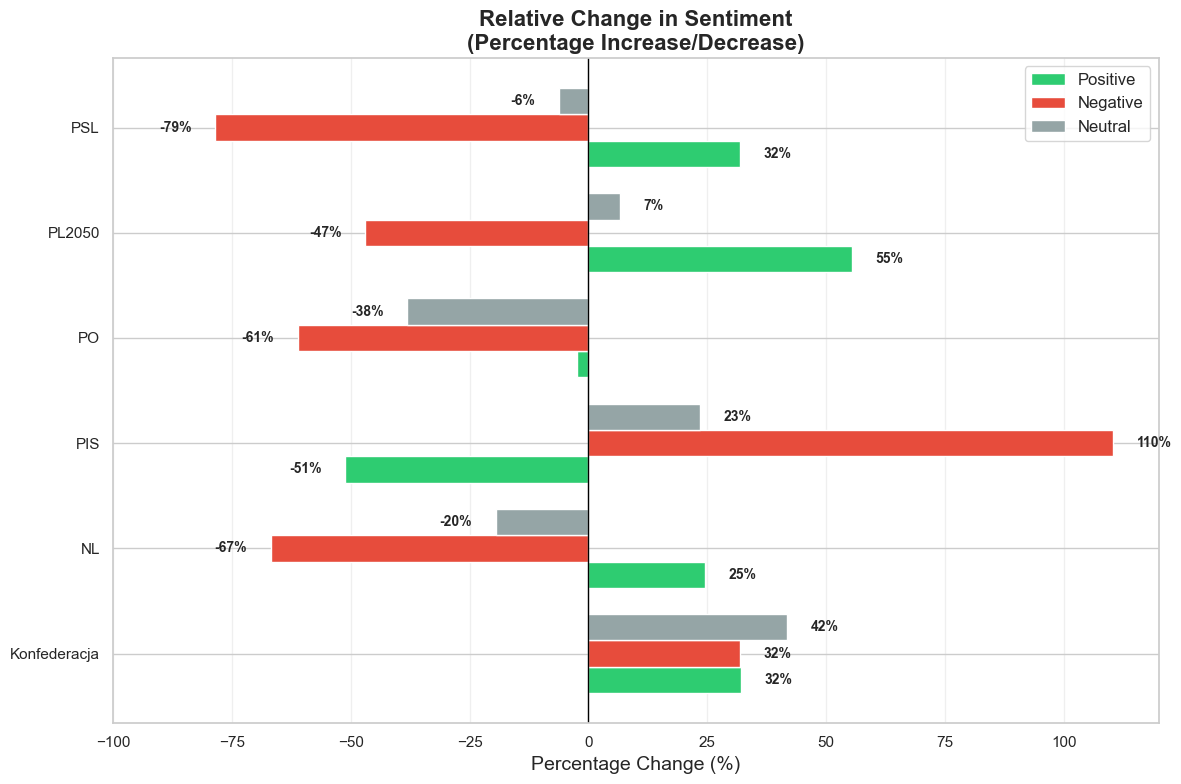


Table: Percentage Change in Tweet Counts by Sentiment
----------------------------------------------------------------------
Party               Positive     Negative      Neutral
----------------------------------------------------------------------
Konfederacja          +32.0%       +31.8%       +41.7%
NL                    +24.5%       -66.9%       -19.5%
PIS                   -51.2%      +110.3%       +23.5%
PO                     -2.4%       -61.1%       -38.1%
PL2050                +55.4%       -47.0%        +6.5%
PSL                   +31.9%       -78.5%        -6.2%
----------------------------------------------------------------------

--- Weighted Sentiment Score Change ---


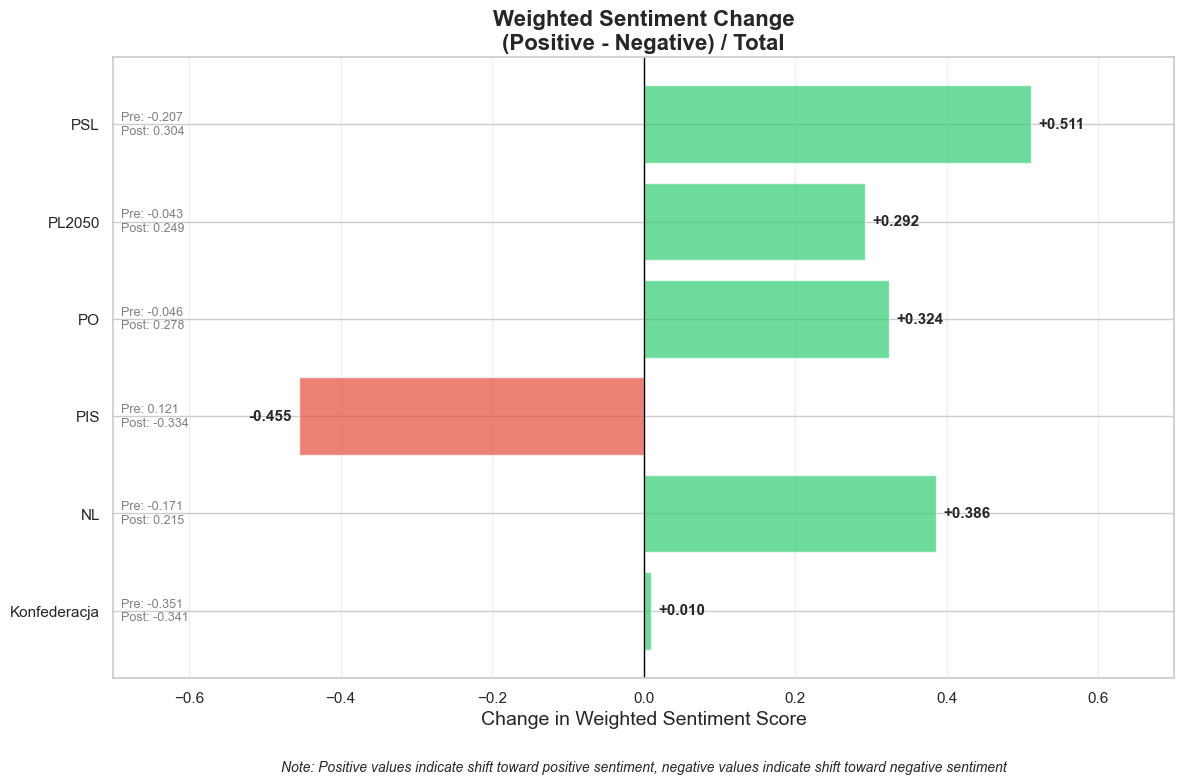


Table: Weighted Sentiment Score Analysis
--------------------------------------------------------------------------------
Party              Pre-Election   Post-Election          Change       Direction
--------------------------------------------------------------------------------
Konfederacja             -0.351          -0.341          +0.010   More Positive
NL                       -0.171           0.215          +0.386   More Positive
PIS                       0.121          -0.334          -0.455   More Negative
PO                       -0.046           0.278          +0.324   More Positive
PL2050                   -0.043           0.249          +0.292   More Positive
PSL                      -0.207           0.304          +0.511   More Positive
--------------------------------------------------------------------------------


In [38]:
# 6. Separate sentiment change plots
# 6a. Absolute change
#plot_sentiment_absolute_change_paper(df_sentiment_results, election_date='2023-10-15')

# 6b. Percentage change with extended axis
plot_sentiment_percentage_change_paper(df_sentiment_results, election_date='2023-10-15')

# 6c. Weighted sentiment change with extended axis
plot_weighted_sentiment_change_paper(df_sentiment_results, election_date='2023-10-15')


##### 14. Combined Positive/Negative Before vs After Election


--- Positive/Negative Balance: Before vs After Election ---


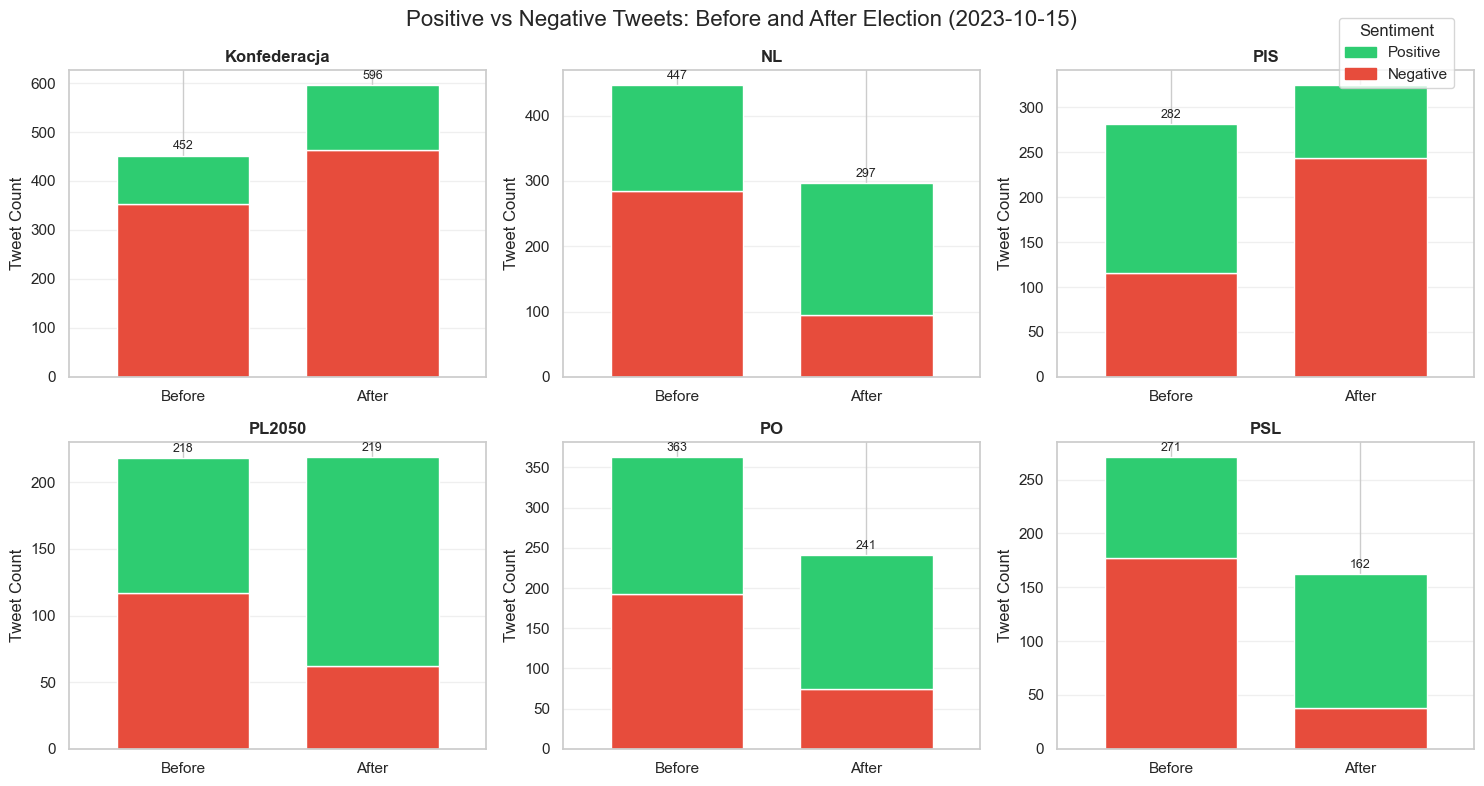

In [39]:
# Purpose: Focus on sentiment polarity changes excluding neutral
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("\n" + "="*60)
print("--- Positive/Negative Balance: Before vs After Election ---")
print("="*60)

# Configuration
ELECTION_DATE = '2023-10-15'
TOP_N_PARTIES = 9

if 'df_sentiment_results' in locals():
    try:
        # Prepare data
        df_comp = df_sentiment_results.copy()
        df_comp['created_at'] = pd.to_datetime(df_comp['created_at'], utc=True)
        election_date = pd.to_datetime(ELECTION_DATE, utc=True)
        
        # Add period
        df_comp['Period'] = df_comp['created_at'].apply(
            lambda x: 'Before' if x < election_date else 'After'
        )
        
        # Filter for Positive and Negative only
        df_comp_filtered = df_comp[df_comp['final_sentiment_label'].isin(['Positive', 'Negative'])]
        
        # Get top parties
        top_parties = df_comp['party'].value_counts().head(TOP_N_PARTIES).index
        
        # Calculate counts
        comparison_counts = df_comp_filtered[df_comp_filtered['party'].isin(top_parties)].groupby(
            ['party', 'Period', 'final_sentiment_label']
        ).size().reset_index(name='count')
        
        # Create faceted plot
        parties = sorted(comparison_counts['party'].unique())
        num_cols = 3
        num_rows = (len(parties) + num_cols - 1) // num_cols
        
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows), sharey=False)
        if num_rows == 1:
            axes = axes.reshape(1, -1)
        axes = axes.flatten()
        
        colors = {'Positive': '#2ecc71', 'Negative': '#e74c3c'}
        
        for i, party in enumerate(parties):
            ax = axes[i]
            party_data = comparison_counts[comparison_counts['party'] == party]
            
            # Pivot data
            pivot_df = party_data.pivot_table(
                index='Period', 
                columns='final_sentiment_label',
                values='count', 
                fill_value=0
            )
            
            # Ensure order
            pivot_df = pivot_df.reindex(['Before', 'After'], fill_value=0)
            
            # Plot stacked bars
            pivot_df.plot(kind='bar', stacked=True, ax=ax,
                         color=[colors.get(col, 'gray') for col in pivot_df.columns],
                         width=0.7, legend=False)
            
            ax.set_title(party, fontsize=12, fontweight='bold')
            ax.set_xlabel('')
            ax.set_ylabel('Tweet Count')
            ax.tick_params(axis='x', rotation=0)
            ax.grid(axis='y', alpha=0.3)
            
            # Add total count on top of bars
            for j, (idx, row) in enumerate(pivot_df.iterrows()):
                total = row.sum()
                ax.text(j, total + ax.get_ylim()[1]*0.01, 
                       f'{int(total)}', ha='center', va='bottom', fontsize=9)
        
        # Remove empty subplots
        for j in range(len(parties), len(axes)):
            fig.delaxes(axes[j])
        
        # Add legend
        handles = [plt.Rectangle((0,0),1,1, color=colors[s]) for s in ['Positive', 'Negative']]
        fig.legend(handles, ['Positive', 'Negative'], title='Sentiment',
                  loc='upper right', bbox_to_anchor=(0.98, 0.98))
        
        plt.suptitle(f'Positive vs Negative Tweets: Before and After Election ({ELECTION_DATE})',
                    fontsize=16, y=0.98)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

##### 15. Average Sentiment Score for Top Keywords by Party

In [40]:
# # Purpose: Shows sentiment trends for key economic terms with event annotations
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from collections import Counter

# print("\n" + "="*60)
# print("--- Average Sentiment Score for Keywords by Party ---")
# print("="*60)

# # Configuration
# TOP_N_KEYWORDS_PER_PARTY = 6
# TIME_FREQUENCY = 'W'  # Weekly for detailed trends
# SHOW_ANNOTATIONS = True

# # Event annotations
# EVENTS = [
#     {'date': '2023-10-15', 'label': 'PL Election', 'color': 'red'},
#     {'date': '2024-06-09', 'label': 'EP Election', 'color': 'blue'},
# ]

# # Sentiment score mapping
# SENTIMENT_SCORES = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

# if 'df_sentiment_results' in locals() and all(col in df_sentiment_results.columns for col in 
#     ['matched_keywords_FILTERED', 'final_sentiment_label', 'party', 'created_at']):
#     try:
#         # Prepare data
#         df_analysis = df_sentiment_results.copy()
#         df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
#         df_analysis['sentiment_score'] = df_analysis['final_sentiment_label'].map(SENTIMENT_SCORES)
        
#         # Get top parties
#         top_parties = df_analysis['party'].value_counts().head(4).index
        
#         for party in top_parties:
#             print(f"\n=== Processing {party} ===")
            
#             # Get party data
#             party_data = df_analysis[df_analysis['party'] == party]
            
#             # Extract keywords
#             all_keywords = []
#             for keywords_list in party_data['matched_keywords_FILTERED'].dropna():
#                 if isinstance(keywords_list, list):
#                     all_keywords.extend(keywords_list)
            
#             # Get top keywords
#             keyword_counts = Counter(all_keywords)
#             top_keywords = [kw for kw, _ in keyword_counts.most_common(TOP_N_KEYWORDS_PER_PARTY)]
            
#             if not top_keywords:
#                 continue
            
#             # Create subplots
#             num_cols = min(3, len(top_keywords))
#             num_rows = (len(top_keywords) + num_cols - 1) // num_cols
            
#             fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows),
#                                    sharex=True, sharey=True)
            
#             if num_rows == 1:
#                 axes = axes.reshape(1, -1)
#             axes = axes.flatten()
            
#             # Plot each keyword
#             for idx, keyword in enumerate(top_keywords):
#                 ax = axes[idx]
                
#                 # Filter data for keyword
#                 keyword_data = party_data[party_data['matched_keywords_FILTERED'].apply(
#                     lambda x: isinstance(x, list) and keyword in x
#                 )]
                
#                 if not keyword_data.empty:
#                     # Calculate average sentiment over time
#                     avg_sentiment = keyword_data.groupby(
#                         pd.Grouper(key='created_at', freq=TIME_FREQUENCY)
#                     )['sentiment_score'].mean()
                    
#                     # Plot line
#                     ax.plot(avg_sentiment.index, avg_sentiment.values,
#                            color='black', linewidth=2, marker='o', markersize=4)
                    
#                     # Fill areas
#                     ax.fill_between(avg_sentiment.index, avg_sentiment.values, 0,
#                                    where=(avg_sentiment.values >= 0),
#                                    color='green', alpha=0.3, interpolate=True)
#                     ax.fill_between(avg_sentiment.index, avg_sentiment.values, 0,
#                                    where=(avg_sentiment.values < 0),
#                                    color='red', alpha=0.3, interpolate=True)
                    
#                     # Add zero line
#                     ax.axhline(0, color='gray', linestyle='--', linewidth=1)
                    
#                     # Add annotations
#                     if SHOW_ANNOTATIONS:
#                         for event in EVENTS:
#                             event_date = pd.to_datetime(event['date'], utc=True)
#                             if avg_sentiment.index.min() <= event_date <= avg_sentiment.index.max():
#                                 ax.axvline(event_date, color=event['color'], 
#                                          linestyle='--', alpha=0.7, linewidth=1)
                    
#                     # Formatting
#                     ax.set_title(f"'{keyword}'", fontsize=12, fontweight='bold')
#                     ax.set_ylim(-1.1, 1.1)
#                     ax.grid(True, alpha=0.3)
#                     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
                    
#                     # Add sample size
#                     total_tweets = len(keyword_data)
#                     ax.text(0.02, 0.98, f'n={total_tweets}', 
#                            transform=ax.transAxes, va='top', fontsize=9, color='gray')
                
#                 else:
#                     ax.text(0.5, 0.5, 'No data', ha='center', va='center',
#                            transform=ax.transAxes)
#                     ax.set_title(f"'{keyword}'", fontsize=12)
            
#             # Remove empty subplots
#             for idx in range(len(top_keywords), len(axes)):
#                 fig.delaxes(axes[idx])
            
#             # Set common labels
#             fig.text(0.5, 0.02, 'Date', ha='center', fontsize=12)
#             fig.text(0.02, 0.5, 'Average Sentiment Score', va='center', rotation='vertical', fontsize=12)
            
#             plt.suptitle(f'{party} - Average Sentiment for Top Keywords\n(+1 = Positive, 0 = Neutral, -1 = Negative)', 
#                         fontsize=16)
            
#             # Rotate x labels
#             for ax in axes[:len(top_keywords)]:
#                 plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
            
#             plt.tight_layout()
#             plt.show()
            
#     except Exception as e:
#         print(f"Error: {e}")
#         import traceback
#         traceback.print_exc()

##### 16. Sentiment Volatility Index and roling sentiment change detection - paper graphs

In [41]:
# ==================================================================================
# PLOT 7 IMPROVED: SENTIMENT SHIFT USING PROPORTIONS
# ==================================================================================

def plot_sentiment_shift_proportions_paper(df, election_date='2023-10-15', window_weeks=4):
    """
    Analyzes sentiment shifts using proportions instead of counts
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy import stats
    
    print("\n" + "="*60)
    print("--- Sentiment Shift Analysis: Proportion-Based ---")
    print("="*60)
    
    df_analysis = df.copy()
    df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)
    
    top_parties = df_analysis['party'].value_counts().head(6).index
    
    # Define time windows
    window = pd.Timedelta(weeks=window_weeks)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes_flat = axes.flatten()
    
    change_stats = []
    
    for idx, party in enumerate(top_parties):
        ax = axes_flat[idx]
        party_data = df_analysis[df_analysis['party'] == party]
        
        # Get data for windows
        pre_window = party_data[(party_data['created_at'] >= election_dt - window) & 
                               (party_data['created_at'] < election_dt)]
        post_window = party_data[(party_data['created_at'] >= election_dt) & 
                                (party_data['created_at'] < election_dt + window)]
        
        if len(pre_window) > 0 and len(post_window) > 0:
            # Calculate proportions
            pre_props = pre_window['final_sentiment_label'].value_counts(normalize=True)
            post_props = post_window['final_sentiment_label'].value_counts(normalize=True)
            
            # Ensure all sentiments are represented
            sentiments = ['Positive', 'Negative', 'Neutral']
            pre_dict = {s: pre_props.get(s, 0) for s in sentiments}
            post_dict = {s: post_props.get(s, 0) for s in sentiments}
            
            # Calculate changes
            changes = {s: post_dict[s] - pre_dict[s] for s in sentiments}
            
            # Determine primary direction
            max_change = max(changes.items(), key=lambda x: abs(x[1]))
            if max_change[0] == 'Positive':
                direction = "More Positive" if max_change[1] > 0 else "Less Positive"
            elif max_change[0] == 'Negative':
                direction = "More Negative" if max_change[1] > 0 else "Less Negative"
            else:
                direction = "More Neutral" if max_change[1] > 0 else "Less Neutral"
            
            # Statistical test
            pre_counts = pre_window['final_sentiment_label'].value_counts()
            post_counts = post_window['final_sentiment_label'].value_counts()
            observed = np.array([[pre_counts.get(s, 0) for s in sentiments],
                                [post_counts.get(s, 0) for s in sentiments]])
            chi2, p_value, dof, expected = stats.chi2_contingency(observed)
            
            change_stats.append({
                'Party': party,
                'Pre_N': len(pre_window),
                'Post_N': len(post_window),
                'Pre_Pos': pre_dict['Positive'],
                'Post_Pos': post_dict['Positive'],
                'Delta_Pos': changes['Positive'],
                'Pre_Neg': pre_dict['Negative'],
                'Post_Neg': post_dict['Negative'],
                'Delta_Neg': changes['Negative'],
                'Pre_Neu': pre_dict['Neutral'],
                'Post_Neu': post_dict['Neutral'],
                'Delta_Neu': changes['Neutral'],
                'Chi2': chi2,
                'P_Value': p_value,
                'Significant': p_value < 0.05,
                'Direction': direction
            })
            
            # Visualization
            x = np.arange(len(sentiments))
            width = 0.35
            
            bars1 = ax.bar(x - width/2, [pre_dict[s] for s in sentiments], width, 
                           label=f'Pre-Election', alpha=0.8)
            bars2 = ax.bar(x + width/2, [post_dict[s] for s in sentiments], width, 
                           label=f'Post-Election', alpha=0.8)
            
            colors = ['#2ecc71', '#e74c3c', '#95a5a6']
            for bars in [bars1, bars2]:
                for bar, color in zip(bars, colors):
                    bar.set_color(color)
            
            # Add value labels
            for bars in [bars1, bars2]:
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{height:.1%}', ha='center', va='bottom', fontsize=9)
            
            # Add change arrows
            for i, (s, change) in enumerate(zip(sentiments, [changes[s] for s in sentiments])):
                if abs(change) > 0.05:
                    y_pos = max(pre_dict[s], post_dict[s]) + 0.05
                    arrow = '↑' if change > 0 else '↓'
                    ax.text(i, y_pos, f'{arrow}{abs(change):.1%}', 
                           ha='center', fontsize=10, fontweight='bold')
            
            ax.set_title(f'{party}\n(p={p_value:.3f}{"*" if p_value < 0.05 else ""})', 
                        fontsize=12, fontweight='bold')
            ax.set_ylabel('Proportion', fontsize=11)
            ax.set_xticks(x)
            ax.set_xticklabels(sentiments)
            ax.set_ylim(0, 0.8)
            ax.legend(loc='upper right', fontsize=9)
            ax.grid(axis='y', alpha=0.3)
    
    # Remove empty subplots
    for idx in range(len(top_parties), len(axes_flat)):
        fig.delaxes(axes_flat[idx])
    
    plt.suptitle(f'Sentiment Shift Analysis ({window_weeks}-week window)', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print table
    print(f"\nTable: Sentiment Proportion Changes ({window_weeks}-week window)")
    print("="*140)
    print(f"{'Party':<12} {'N':^12} {'Positive':^30} {'Negative':^30} {'Neutral':^30} {'p-val':>8} {'Direction':>20}")
    print(f"{'':^12} {'Pre':>5} {'Post':>5} {'Pre':>8} {'Post':>8} {'Delta':>10} {'Pre':>8} {'Post':>8} {'Delta':>10} {'Pre':>8} {'Post':>8} {'Delta':>10}")
    print("="*140)
    
    for s in change_stats:
        sig = "*" if s['Significant'] else ""
        print(f"{s['Party']:<12} {s['Pre_N']:>5} {s['Post_N']:>5} "
              f"{s['Pre_Pos']:>7.1%} {s['Post_Pos']:>7.1%} {s['Delta_Pos']:>+9.1%} "
              f"{s['Pre_Neg']:>7.1%} {s['Post_Neg']:>7.1%} {s['Delta_Neg']:>+9.1%} "
              f"{s['Pre_Neu']:>7.1%} {s['Post_Neu']:>7.1%} {s['Delta_Neu']:>+9.1%} "
              f"{s['P_Value']:>7.3f}{sig} {s['Direction']:>20}")
    
    print("="*140)
    print("* Significant at p < 0.05 level")
    print("\nInterpretation:")
    print("- 'More X': Increase in X sentiment proportion") 
    print("- 'Less X': Decrease in X sentiment proportion")
    print("- Delta shows percentage point change in proportions")


# ==================================================================================
# ROLLING SENTIMENT WITH TABLE
# ==================================================================================

def plot_rolling_sentiment_with_table_paper(df, election_date='2023-10-15', window=4, freq='W'):
    """
    Rolling sentiment analysis with comprehensive table
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.ndimage import gaussian_filter1d
    
    print("\n" + "="*60)
    print("--- Rolling Sentiment Change Analysis ---")
    print("="*60)
    
    df_roll = df.copy()
    df_roll['created_at'] = pd.to_datetime(df_roll['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)
    
    top_parties = df_roll['party'].value_counts().head(6).index
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True)
    axes_flat = axes.flatten()
    
    rolling_stats = []
    
    for idx, party in enumerate(top_parties):
        ax = axes_flat[idx]
        party_data = df_roll[df_roll['party'] == party]
        
        # Calculate weekly sentiment proportions
        weekly_sentiment = party_data.groupby([
            pd.Grouper(key='created_at', freq=freq),
            'final_sentiment_label'
        ]).size().unstack(fill_value=0)
        
        if not weekly_sentiment.empty:
            # Calculate proportions
            weekly_props = weekly_sentiment.div(weekly_sentiment.sum(axis=1), axis=0)
            
            # Get individual proportions
            pos_prop = weekly_props.get('Positive', 0)
            neg_prop = weekly_props.get('Negative', 0)
            neu_prop = weekly_props.get('Neutral', 0)
            
            # Calculate net sentiment
            net_sentiment = pos_prop - neg_prop
            
            # Apply smoothing
            if len(net_sentiment) > 5:
                net_smooth = gaussian_filter1d(net_sentiment, sigma=1)
            else:
                net_smooth = net_sentiment.values
            
            # Calculate rate of change
            if len(net_smooth) > 1:
                change_rate = np.gradient(net_smooth)
            else:
                change_rate = np.zeros_like(net_smooth)
            
            # Plot
            ax2 = ax.twinx()
            
            # Net sentiment line
            ax.plot(net_sentiment.index, net_smooth, 
                   color='black', linewidth=2.5, label='Net Sentiment')
            
            # Also plot positive and negative proportions
            ax.plot(pos_prop.index, pos_prop, color='green', alpha=0.5, 
                   linestyle='--', label='Positive')
            ax.plot(neg_prop.index, neg_prop, color='red', alpha=0.5, 
                   linestyle='--', label='Negative')
            
            # Change rate bars
            colors = ['green' if x > 0 else 'red' for x in change_rate]
            ax2.bar(net_sentiment.index, change_rate, 
                   color=colors, alpha=0.3, width=5)
            
            # Election line
            ax.axvline(election_dt, color='blue', linestyle='--', linewidth=2, alpha=0.7)
            
            # Zero lines
            ax.axhline(0, color='gray', linestyle='-', linewidth=0.5)
            ax2.axhline(0, color='gray', linestyle='-', linewidth=0.5)
            
            # Calculate statistics around election
            election_idx = np.argmin(np.abs(net_sentiment.index - election_dt))
            window_idx = 2
            
            start_idx = max(0, election_idx - window_idx)
            end_idx = min(len(change_rate), election_idx + window_idx + 1)
            
            if end_idx > start_idx:
                election_change = np.mean(change_rate[start_idx:end_idx])
                pre_election_net = np.mean(net_smooth[:election_idx]) if election_idx > 0 else 0
                post_election_net = np.mean(net_smooth[election_idx:]) if election_idx < len(net_smooth) else 0
                
                rolling_stats.append({
                    'Party': party,
                    'Pre_Election_Net': pre_election_net,
                    'Post_Election_Net': post_election_net,
                    'Net_Change': post_election_net - pre_election_net,
                    'Election_Rate': election_change,
                    'Max_Positive': pos_prop.max(),
                    'Max_Negative': neg_prop.max(),
                    'Volatility': net_sentiment.std()
                })
                
                # Add text box with key stats
                ax.text(0.02, 0.98, f'Election Rate: {election_change:+.3f}', 
                       transform=ax.transAxes, fontsize=10, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            
            # Formatting
            ax.set_title(f'{party}', fontsize=14, fontweight='bold')
            ax.set_ylabel('Sentiment Proportion', fontsize=10)
            ax2.set_ylabel('Rate of Change', fontsize=10)
            ax.set_ylim(-1, 1)
            ax2.set_ylim(-0.2, 0.2)
            ax.grid(True, alpha=0.3)
            ax.legend(loc='upper left', fontsize=8)
    
    # Remove empty subplots
    for idx in range(len(top_parties), len(axes_flat)):
        fig.delaxes(axes_flat[idx])
    
    plt.suptitle('Rolling Sentiment Analysis with Rate of Change', 
                 fontsize=16, fontweight='bold')
    
    for ax in axes_flat[:len(top_parties)]:
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive table
    print("\nTable: Rolling Sentiment Analysis Summary")
    print("-" * 110)
    print(f"{'Party':<12} {'Pre-Election':>15} {'Post-Election':>15} {'Net Change':>15} {'Election Rate':>15} {'Max Pos':>10} {'Max Neg':>10} {'Volatility':>10}")
    print(f"{'':^12} {'Net Sentiment':>15} {'Net Sentiment':>15} {'':^15} {'of Change':>15} {'Prop':>10} {'Prop':>10} {'':^10}")
    print("-" * 110)
    
    for s in rolling_stats:
        print(f"{s['Party']:<12} {s['Pre_Election_Net']:>15.3f} {s['Post_Election_Net']:>15.3f} "
              f"{s['Net_Change']:>+15.3f} {s['Election_Rate']:>+15.3f} "
              f"{s['Max_Positive']:>10.2%} {s['Max_Negative']:>10.2%} {s['Volatility']:>10.3f}")
    
    print("-" * 110)
    print("\nInterpretation:")
    print("- Net Sentiment: Positive proportion minus Negative proportion")
    print("- Election Rate: Average rate of change around election period")
    print("- Positive rate = sentiment becoming more positive")
    print("- Negative rate = sentiment becoming more negative")
    print("- Volatility: Standard deviation of net sentiment (higher = more variable)")


# ==================================================================================
# SENTIMENT CHANGE MATRIX
# ==================================================================================

def plot_sentiment_change_matrix_paper(df, election_date='2023-10-15', window_weeks=4):
    """
    Shows detailed sentiment transition matrix
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    
    print("\n" + "="*60)
    print("--- Sentiment Change Matrix Analysis ---")
    print("="*60)
    
    df_matrix = df.copy()
    df_matrix['created_at'] = pd.to_datetime(df_matrix['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)
    
    # Define windows
    window = pd.Timedelta(weeks=window_weeks)
    
    # Get all parties
    top_parties = df_matrix['party'].value_counts().head(6).index
    
    # Create transition data
    transition_data = []
    
    for party in top_parties:
        party_data = df_matrix[df_matrix['party'] == party]
        
        # Pre and post windows
        pre_data = party_data[(party_data['created_at'] >= election_dt - window) & 
                             (party_data['created_at'] < election_dt)]
        post_data = party_data[(party_data['created_at'] >= election_dt) & 
                              (party_data['created_at'] < election_dt + window)]
        
        if len(pre_data) > 0 and len(post_data) > 0:
            # Calculate sentiment distributions
            pre_dist = pre_data['final_sentiment_label'].value_counts(normalize=True)
            post_dist = post_data['final_sentiment_label'].value_counts(normalize=True)
            
            # Calculate changes for all sentiment combinations
            for sent in ['Positive', 'Negative', 'Neutral']:
                pre_val = pre_dist.get(sent, 0)
                post_val = post_dist.get(sent, 0)
                change = post_val - pre_val
                
                transition_data.append({
                    'Party': party,
                    'Sentiment': sent,
                    'Pre': pre_val,
                    'Post': post_val,
                    'Change': change,
                    'Pct_Change': (change / pre_val * 100) if pre_val > 0 else 0
                })
    
    # Convert to DataFrame
    trans_df = pd.DataFrame(transition_data)
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Plot 1: Heatmap of changes
    pivot_change = trans_df.pivot(index='Party', columns='Sentiment', values='Change')
    sns.heatmap(pivot_change, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
                cbar_kws={'label': 'Change in Proportion'}, ax=ax1)
    ax1.set_title(f'Sentiment Proportion Changes\n({window_weeks} weeks before vs after election)', 
                  fontsize=14, fontweight='bold')
    ax1.set_xlabel('Sentiment Type', fontsize=12)
    ax1.set_ylabel('Party', fontsize=12)
    
    # Plot 2: Before/After comparison
    parties = trans_df['Party'].unique()
    sentiments = ['Positive', 'Negative', 'Neutral']
    
    x = np.arange(len(parties))
    width = 0.25
    
    for i, sent in enumerate(sentiments):
        sent_data = trans_df[trans_df['Sentiment'] == sent]
        changes = [sent_data[sent_data['Party'] == p]['Change'].values[0] for p in parties]
        
        colors = ['green' if sent == 'Positive' else 'red' if sent == 'Negative' else 'gray']
        ax2.bar(x + i*width - width, changes, width, label=sent, 
                color=colors[0], alpha=0.7)
    
    ax2.set_xlabel('Party', fontsize=12)
    ax2.set_ylabel('Change in Proportion', fontsize=12)
    ax2.set_title('Sentiment Proportion Changes by Party', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(parties, rotation=45, ha='right')
    ax2.axhline(0, color='black', linewidth=1)
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed transition table
    print(f"\nTable: Detailed Sentiment Transitions ({window_weeks}-week window)")
    print("="*100)
    print(f"{'Party':<12} {'Sentiment':<10} {'Pre-Election':>15} {'Post-Election':>15} {'Change':>12} {'% Change':>12}")
    print("="*100)
    
    for _, row in trans_df.iterrows():
        print(f"{row['Party']:<12} {row['Sentiment']:<10} {row['Pre']:>14.2%} {row['Post']:>14.2%} "
              f"{row['Change']:>+11.3f} {row['Pct_Change']:>+11.1f}%")
        
        # Add separator between parties
        if row['Sentiment'] == 'Neutral':
            print("-" * 100)
    
    # Summary by direction
    print("\nSummary of Primary Changes:")
    print("-" * 60)
    
    for party in parties:
        party_changes = trans_df[trans_df['Party'] == party]
        max_change = party_changes.loc[party_changes['Change'].abs().idxmax()]
        
        direction = f"{'More' if max_change['Change'] > 0 else 'Less'} {max_change['Sentiment']}"
        print(f"{party:<12} → {direction:<20} ({max_change['Change']:+.3f})")
    
    print("-" * 60)


--- Sentiment Shift Analysis: Proportion-Based ---


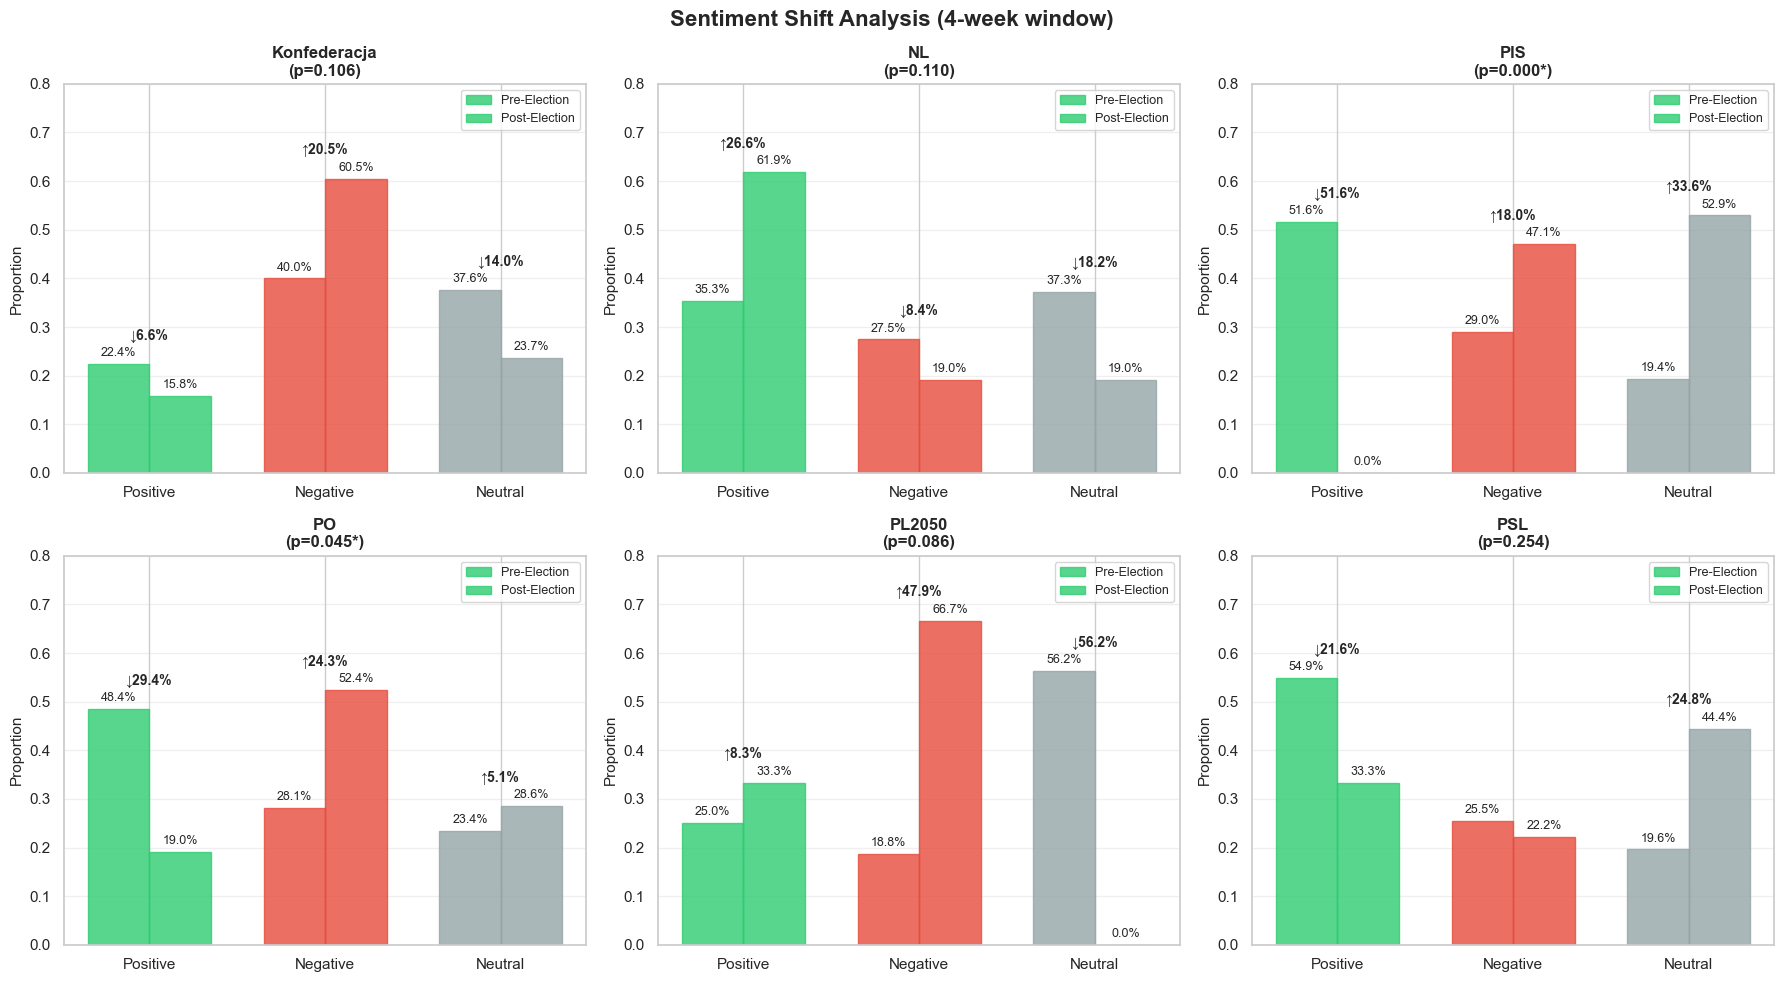


Table: Sentiment Proportion Changes (4-week window)
Party             N                  Positive                       Negative                       Neutral                p-val            Direction
               Pre  Post      Pre     Post      Delta      Pre     Post      Delta      Pre     Post      Delta
Konfederacja    85    38   22.4%   15.8%     -6.6%   40.0%   60.5%    +20.5%   37.6%   23.7%    -14.0%   0.106        More Negative
NL              51    21   35.3%   61.9%    +26.6%   27.5%   19.0%     -8.4%   37.3%   19.0%    -18.2%   0.110        More Positive
PIS             62    17   51.6%    0.0%    -51.6%   29.0%   47.1%    +18.0%   19.4%   52.9%    +33.6%   0.000*        Less Positive
PO              64    21   48.4%   19.0%    -29.4%   28.1%   52.4%    +24.3%   23.4%   28.6%     +5.1%   0.045*        Less Positive
PL2050          64     3   25.0%   33.3%     +8.3%   18.8%   66.7%    +47.9%   56.2%    0.0%    -56.2%   0.086         Less Neutral
PSL             51     9

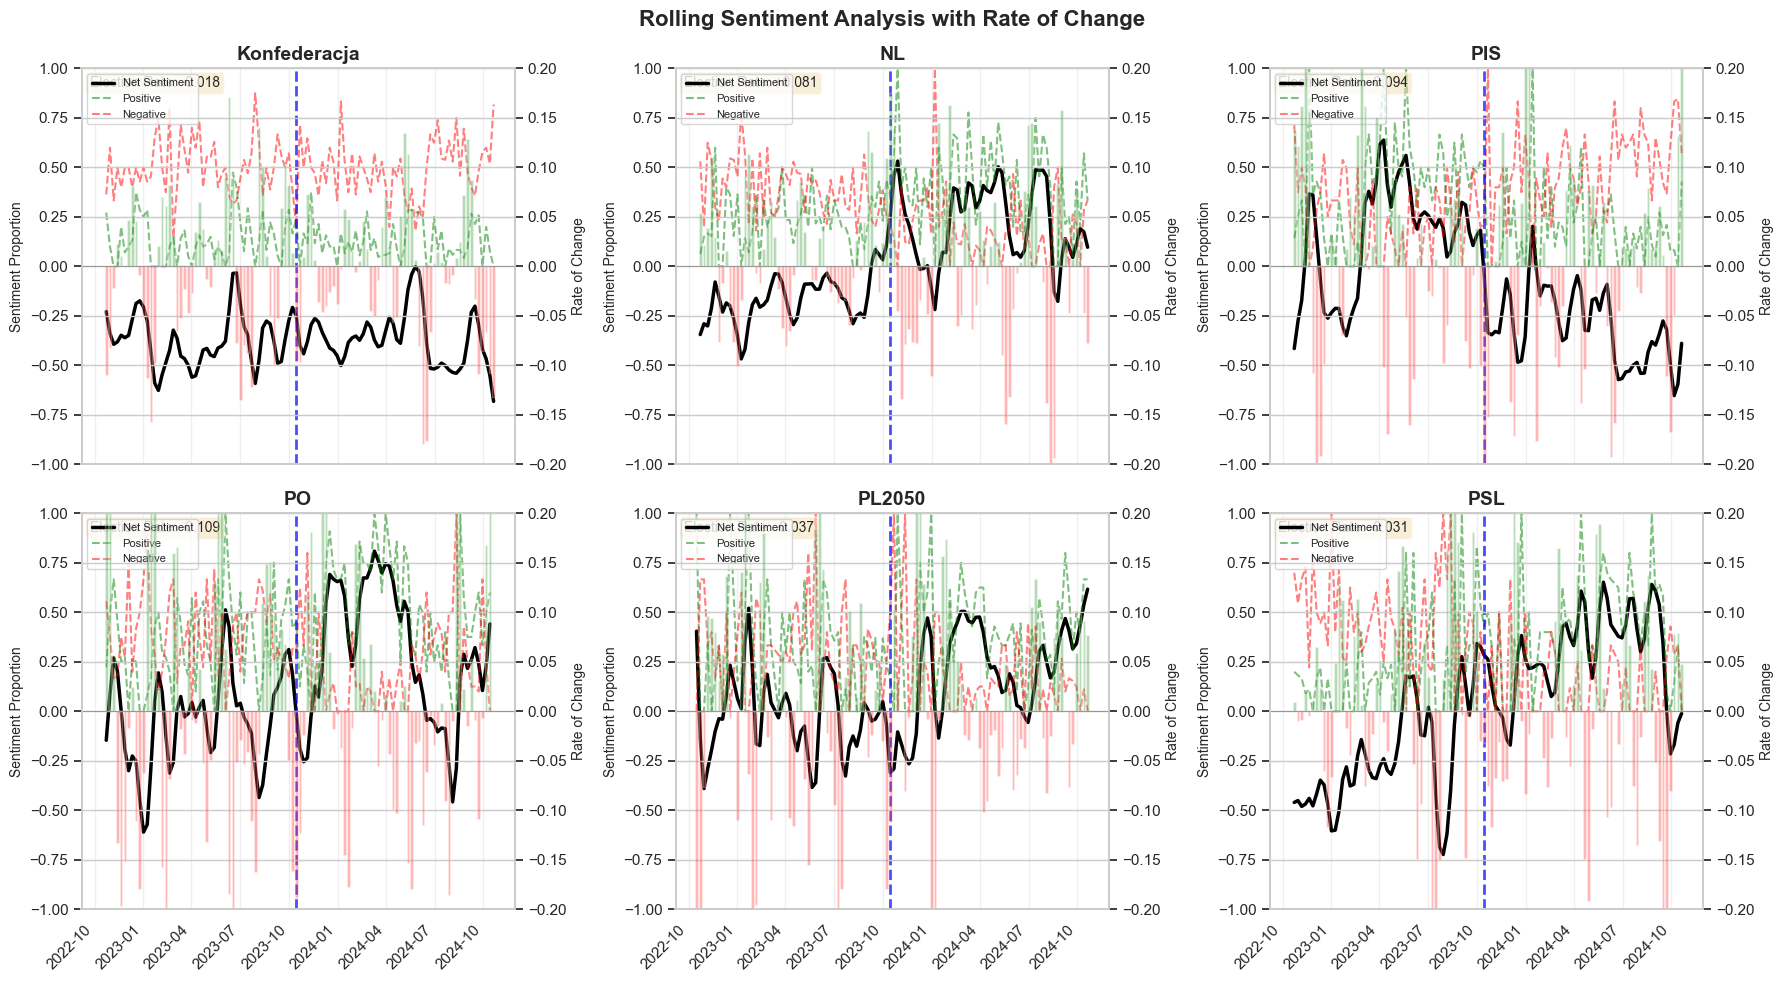


Table: Rolling Sentiment Analysis Summary
--------------------------------------------------------------------------------------------------------------
Party           Pre-Election   Post-Election      Net Change   Election Rate    Max Pos    Max Neg Volatility
               Net Sentiment   Net Sentiment                       of Change       Prop       Prop           
--------------------------------------------------------------------------------------------------------------
Konfederacja          -0.372          -0.367          +0.005          -0.018     47.37%     87.50%      0.208
NL                    -0.164           0.216          +0.380          +0.081    100.00%    100.00%      0.346
PIS                    0.142          -0.298          -0.440          -0.094    100.00%    100.00%      0.431
PO                    -0.041           0.284          +0.325          -0.109    100.00%    100.00%      0.464
PL2050                -0.018           0.210          +0.228          -0.03

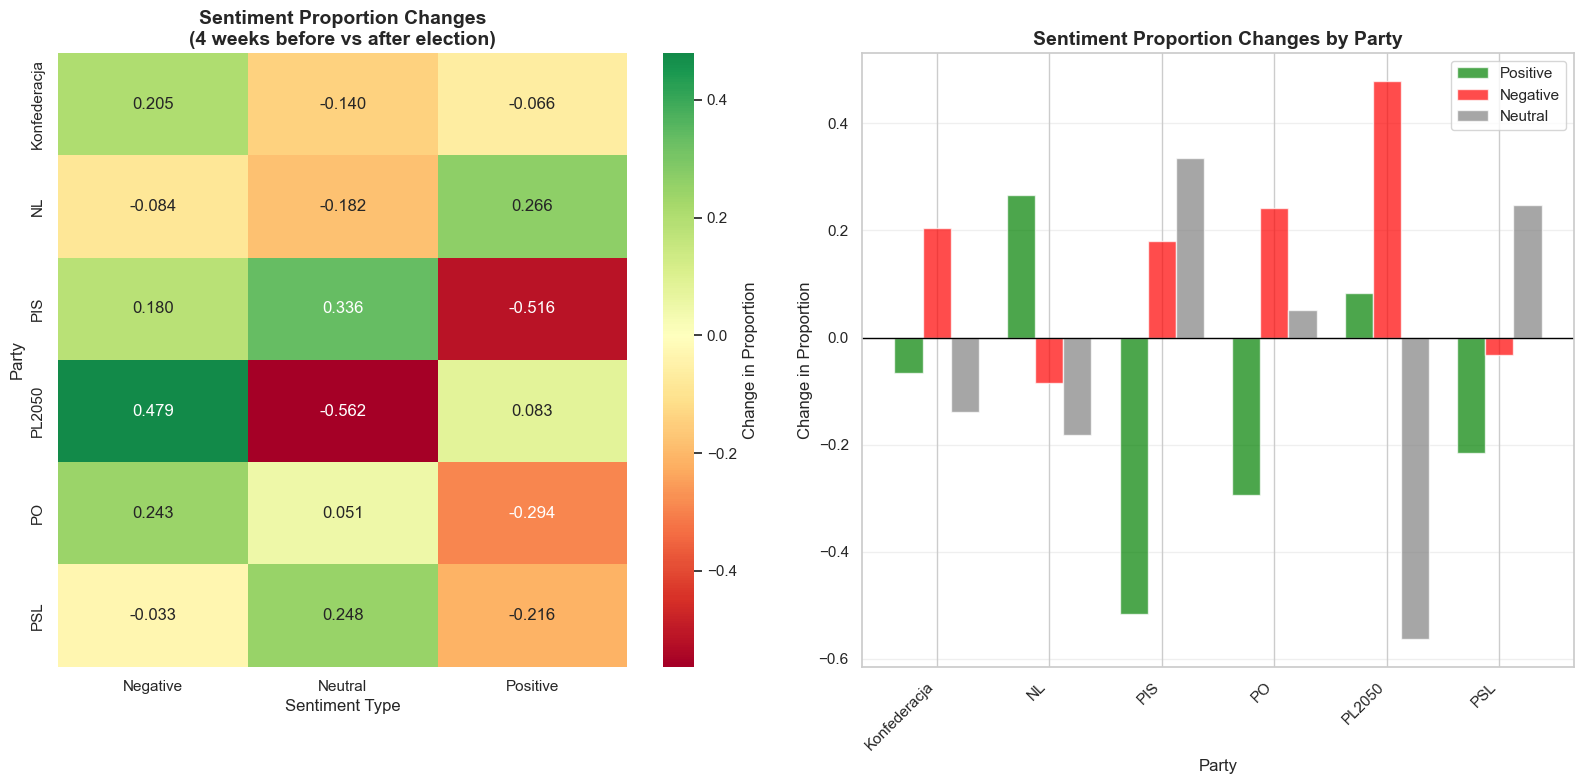


Table: Detailed Sentiment Transitions (4-week window)
Party        Sentiment     Pre-Election   Post-Election       Change     % Change
Konfederacja Positive           22.35%         15.79%      -0.066       -29.4%
Konfederacja Negative           40.00%         60.53%      +0.205       +51.3%
Konfederacja Neutral            37.65%         23.68%      -0.140       -37.1%
----------------------------------------------------------------------------------------------------
NL           Positive           35.29%         61.90%      +0.266       +75.4%
NL           Negative           27.45%         19.05%      -0.084       -30.6%
NL           Neutral            37.25%         19.05%      -0.182       -48.9%
----------------------------------------------------------------------------------------------------
PIS          Positive           51.61%          0.00%      -0.516      -100.0%
PIS          Negative           29.03%         47.06%      +0.180       +62.1%
PIS          Neutral         

In [42]:
# 4. Proportion-based sentiment shift analysis
plot_sentiment_shift_proportions_paper(df_sentiment_results, election_date='2023-10-15', window_weeks=4)

# 5. Rolling sentiment with comprehensive table
plot_rolling_sentiment_with_table_paper(df_sentiment_results, election_date='2023-10-15')

# 6. Sentiment change matrix (bonus visualization)
plot_sentiment_change_matrix_paper(df_sentiment_results, election_date='2023-10-15', window_weeks=4)

##### 17. Sentiment Distribution for Economic Words in Tweets

In [ ]:
# ==================================================================================
# PLOT ADDITIONAL: SENTIMENT DISTRIBUTION BY PARTY (MODIFIED)
# ==================================================================================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_sentiment_distribution_by_party_paper_fixed(df, election_date='2023-10-15'): # MODIFIED: Added election_date parameter
    """
    Shows sentiment distribution statistics by party.
    ax1: Proportions of Positive, Negative, Neutral sentiments (overall period).
    ax2: Net Sentiment Score (Positive Prop - Negative Prop) for Pre-Election vs Post-Election periods.
    """
    print("\n" + "="*60)
    print("--- Sentiment Distribution and Net Sentiment by Party ---") # Modified title
    print("="*60)

    # Ensure 'created_at' column exists and is datetime for pre/post analysis
    if 'created_at' not in df.columns:
        print("ERROR: 'created_at' column is required for Pre/Post election analysis but not found in DataFrame.")
        return
    df_copy = df.copy() # Work on a copy
    df_copy['created_at'] = pd.to_datetime(df_copy['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)

    # Get top parties
    top_parties = df_copy['party'].value_counts().head(8).index

    # Calculate sentiment statistics by party
    party_stats = []

    for party in top_parties:
        party_data_full = df_copy[df_copy['party'] == party]

        # Overall period calculations (for ax1 and table)
        sentiment_counts_overall = party_data_full['final_sentiment_label'].value_counts()
        total_overall = len(party_data_full)
        pos_prop_overall = sentiment_counts_overall.get('Positive', 0) / total_overall if total_overall > 0 else 0
        neg_prop_overall = sentiment_counts_overall.get('Negative', 0) / total_overall if total_overall > 0 else 0
        neu_prop_overall = sentiment_counts_overall.get('Neutral', 0) / total_overall if total_overall > 0 else 0
        net_sentiment_overall = pos_prop_overall - neg_prop_overall

        # Pre-Election calculations (for new ax2)
        pre_election_data = party_data_full[party_data_full['created_at'] < election_dt]
        net_sentiment_pre = np.nan
        if not pre_election_data.empty:
            sentiment_counts_pre = pre_election_data['final_sentiment_label'].value_counts()
            total_pre = len(pre_election_data)
            pos_prop_pre = sentiment_counts_pre.get('Positive', 0) / total_pre if total_pre > 0 else 0
            neg_prop_pre = sentiment_counts_pre.get('Negative', 0) / total_pre if total_pre > 0 else 0
            net_sentiment_pre = pos_prop_pre - neg_prop_pre

        # Post-Election calculations (for new ax2)
        post_election_data = party_data_full[party_data_full['created_at'] >= election_dt]
        net_sentiment_post = np.nan
        if not post_election_data.empty:
            sentiment_counts_post = post_election_data['final_sentiment_label'].value_counts()
            total_post = len(post_election_data)
            pos_prop_post = sentiment_counts_post.get('Positive', 0) / total_post if total_post > 0 else 0
            neg_prop_post = sentiment_counts_post.get('Negative', 0) / total_post if total_post > 0 else 0
            net_sentiment_post = pos_prop_post - neg_prop_post

        party_stats.append({
            'Party': party,
            'Total_Tweets': total_overall,
            'Positive_Count': sentiment_counts_overall.get('Positive', 0),
            'Negative_Count': sentiment_counts_overall.get('Negative', 0),
            'Neutral_Count': sentiment_counts_overall.get('Neutral', 0),
            'Positive_Prop': pos_prop_overall,    # For ax1
            'Negative_Prop': neg_prop_overall,    # For ax1
            'Neutral_Prop': neu_prop_overall,     # For ax1
            'Net_Sentiment_Overall': net_sentiment_overall, # For the printed table
            'Net_Sentiment_Pre': net_sentiment_pre,         # For new ax2
            'Net_Sentiment_Post': net_sentiment_post        # For new ax2
        })

    # Sort by overall net sentiment (or choose another metric like Total_Tweets or Party name)
    party_stats = sorted(party_stats, key=lambda x: x['Net_Sentiment_Overall'], reverse=True)

    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8)) # Adjusted figsize slightly

    # --- Plot 1: Sentiment proportions by party (Overall Period) ---
    parties = [s['Party'] for s in party_stats]
    pos_props = [s['Positive_Prop'] for s in party_stats]
    neg_props = [s['Negative_Prop'] for s in party_stats]
    neu_props = [s['Neutral_Prop'] for s in party_stats]

    x = np.arange(len(parties))
    bar_width_ax1 = 0.3  # MODIFIED: Increased bar width for ax1

    bars1 = ax1.bar(x - bar_width_ax1, pos_props, bar_width_ax1, label='Positive', color='#2ecc71')
    bars2 = ax1.bar(x, neg_props, bar_width_ax1, label='Negative', color='#e74c3c')
    bars3 = ax1.bar(x + bar_width_ax1, neu_props, bar_width_ax1, label='Neutral', color='#95a5a6')

    # Add value labels for ax1
    for bars_group in [bars1, bars2, bars3]: # Renamed 'bars' to 'bars_group' to avoid conflict
        for bar_item in bars_group: # Renamed 'bar' to 'bar_item'
            height = bar_item.get_height()
            if height > 0.05:  # Only show if > 5%
                ax1.text(bar_item.get_x() + bar_item.get_width()/2., height + 0.01,
                         f'{height:.1%}', ha='center', va='bottom', fontsize=9)

    ax1.set_xlabel('Party', fontsize=12)
    ax1.set_ylabel('Proportion of Tweets (Overall Period)', fontsize=12)
    ax1.set_title('Overall Sentiment Distribution by Party', fontsize=14, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(parties, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    ax1.set_ylim(0, max(max(pos_props, default=0), max(neg_props, default=0), max(neu_props, default=0)) * 1.15 + 0.05) # Dynamic Ylim for ax1

    # --- Plot 2: Net sentiment by party (Pre vs Post Election) --- MODIFIED
    net_sentiments_pre = [s.get('Net_Sentiment_Pre', 0) if not np.isnan(s.get('Net_Sentiment_Pre', 0)) else 0 for s in party_stats]
    net_sentiments_post = [s.get('Net_Sentiment_Post', 0) if not np.isnan(s.get('Net_Sentiment_Post', 0)) else 0 for s in party_stats]

    bar_width_ax2 = 0.35  # Width of individual bars for Pre/Post in ax2

    rects_pre = ax2.bar(x - bar_width_ax2/2, net_sentiments_pre, bar_width_ax2, label=f'Pre-Election ({election_date})', color='lightblue', alpha=0.8)
    rects_post = ax2.bar(x + bar_width_ax2/2, net_sentiments_post, bar_width_ax2, label=f'Post-Election ({election_date})', color='salmon', alpha=0.8)

    # Add value labels for ax2
    for rect_group in [rects_pre, rects_post]:
        for bar_item_ax2 in rect_group: # Renamed 'bar'
            height = bar_item_ax2.get_height()
            # Only add label if height is not zero (or very close to it) to avoid clutter
            if abs(height) > 0.001:
                ax2.text(bar_item_ax2.get_x() + bar_item_ax2.get_width()/2.,
                         height + (0.01 if height >= 0 else -0.025), # Adjust vertical offset
                         f'{height:+.2f}', # Format to 2 decimal places
                         ha='center',
                         va='bottom' if height >= 0 else 'top',
                         fontsize=8, fontweight='bold')

    ax2.set_xlabel('Party', fontsize=12)
    ax2.set_ylabel('Net Sentiment (Pos Prop - Neg Prop)', fontsize=12)
    ax2.set_title('Net Sentiment: Pre vs Post-Election', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(parties, rotation=45, ha='right')
    ax2.axhline(0, color='black', linewidth=1)
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    # Adjust ylim for net sentiment dynamically or keep fixed if preferred
    min_net = min(min(net_sentiments_pre, default=0), min(net_sentiments_post, default=0))
    max_net = max(max(net_sentiments_pre, default=0), max(net_sentiments_post, default=0))
    ax2.set_ylim(min(min_net * 1.2 - 0.05, -0.1), max(max_net * 1.2 + 0.05, 0.1))


    plt.tight_layout(pad=2.0) # Added some padding
    plt.show()

    # Print detailed statistics table (reflects overall period stats)
    print("\nTable: Sentiment Statistics by Party (Overall Period)")
    print("="*110)
    print(f"{'Party':<12} {'Total':>8} {'Positive':>22} {'Negative':>22} {'Neutral':>22} {'Net Sentiment':>15}")
    print(f"{'':^12} {'Tweets':>8} {'Count':>10} {'Prop':>10} {'Count':>10} {'Prop':>10} {'Count':>10} {'Prop':>10} {'(Overall)':>15}") # Clarified Net Sentiment is Overall
    print("="*110)

    for s in party_stats:
        print(f"{s['Party']:<12} {s['Total_Tweets']:>8} "
              f"{s['Positive_Count']:>10} {s['Positive_Prop']:>9.1%} "
              f"{s['Negative_Count']:>10} {s['Negative_Prop']:>9.1%} "
              f"{s['Neutral_Count']:>10} {s['Neutral_Prop']:>9.1%} "
              f"{s['Net_Sentiment_Overall']:>+15.3f}") # Using Net_Sentiment_Overall

    print("="*110)

    # Add summary statistics (Overall based on aggregated counts from party_stats)
    total_tweets_all = sum(s['Total_Tweets'] for s in party_stats)
    if total_tweets_all > 0:
        avg_pos_all = sum(s['Positive_Count'] for s in party_stats) / total_tweets_all
        avg_neg_all = sum(s['Negative_Count'] for s in party_stats) / total_tweets_all
        avg_neu_all = sum(s['Neutral_Count'] for s in party_stats) / total_tweets_all
        net_sentiment_grand_total = avg_pos_all - avg_neg_all
    else:
        avg_pos_all, avg_neg_all, avg_neu_all, net_sentiment_grand_total = 0,0,0,0


    print(f"\n{'OVERALL':<12} {total_tweets_all:>8} "
          f"{' ':>10} {avg_pos_all:>9.1%} "
          f"{' ':>10} {avg_neg_all:>9.1%} "
          f"{' ':>10} {avg_neu_all:>9.1%} "
          f"{net_sentiment_grand_total:>+15.3f}")

In [44]:
df_sentiment_results

id                                      text_clean_en  \
0     1846161400328028160  ❌ We are a year after the elections, and Polan...   
1     1845725230272000256  Poland is soon to launch 49 EU-funded Foreigne...   
2     1844415548211245312  Listening to the statement of Deputy Minister ...   
3     1843984045073428992  Local government investments are crucial for r...   
4     1843740048350691584  We talked about the trends and challenges of t...   
...                   ...                                                ...   
6068  1622276457975222272  Dear Minister of Coal and Straw, if you had li...   
6069  1621767127660220416  In the majesty of the law and stealing from Po...   
6070  1618902451620573184  9th Beef Sector Forum - we met among producers...   
6071  1612071495026483200  The difference is that PKN Orlen has a 49.9% s...   
6072  1701960909369868544  This is one of the largest road investments co...   

                                text_clean_en_demojized  \
0     :cross_mark: We are a year after the elections...   
1     Poland is soon to launch 49 EU-funded Foreigne...   
2     Listening to the statement of Deputy Minister ...   
3     Local government investments are crucial for r...   
4     We talked about the trends and challenges of t...   
...                                                 ...   
6068  Dear Minister of Coal and Straw, if you had li...   
6069  In the majesty of the law and stealing from Po...   
6070  9th Beef Sector Forum - we met among producers...   
6071  The difference is that PKN Orlen has a 49.9% s...   
6072  This is one of the largest road investments co...   

                    created_at         party              name  \
0    2024-10-15 12:09:12+00:00  Konfederacja   Bartłomiej Pejo   
1    2024-10-14 07:16:01+00:00  Konfederacja   Bartłomiej Pejo   
2    2024-10-10 16:31:48+00:00  Konfederacja   Bartłomiej Pejo   
3    2024-10-09 11:57:10+00:00  Konfederacja   Bartłomiej Pejo   
4    2024-10-08 19:47:37+00:00  Konfederacja   Bartłomiej Pejo   
...                        ...           ...               ...   
6068 2023-02-05 16:50:22+00:00           PSL  Stefan Krajewski   
6069 2023-02-04 07:06:28+00:00           PSL  Stefan Krajewski   
6070 2023-01-27 09:23:16+00:00           PSL  Stefan Krajewski   
6071 2023-01-08 12:59:29+00:00           PSL  Stefan Krajewski   
6072 2023-09-13 14:07:56+00:00           PSL      Adam Struzik   

             username        matched_keywords_FILTERED  \
0      bartlomiejpejo                 [crisis, demand]   
1      bartlomiejpejo                           [fund]   
2      bartlomiejpejo                           [fund]   
3      bartlomiejpejo                     [investment]   
4      bartlomiejpejo                         [market]   
...               ...                              ...   
6068  StefanKrajewski                 [import, market]   
6069  StefanKrajewski  [energy, state-owned companies]   
6070  StefanKrajewski                         [sector]   
6071  StefanKrajewski                       [treasury]   
6072      StruzikAdam                     [investment]   

             extracted_terms_FILTERED sentiment_cardiffnlp_emoji_label  \
0                   [crisis, demands]                         Negative   
1                            [funded]                          Neutral   
2                             [funds]                          Neutral   
3                       [investments]                          Neutral   
4                            [market]                         Positive   
...                               ...                              ...   
6068               [imported, market]                         Negative   
6069  [energy, state-owned companies]                         Negative   
6070                         [Sector]                         Positive   
6071                       [Treasury]                          Neutral   
6072                    [investments]            


--- Sentiment Distribution and Net Sentiment by Party ---


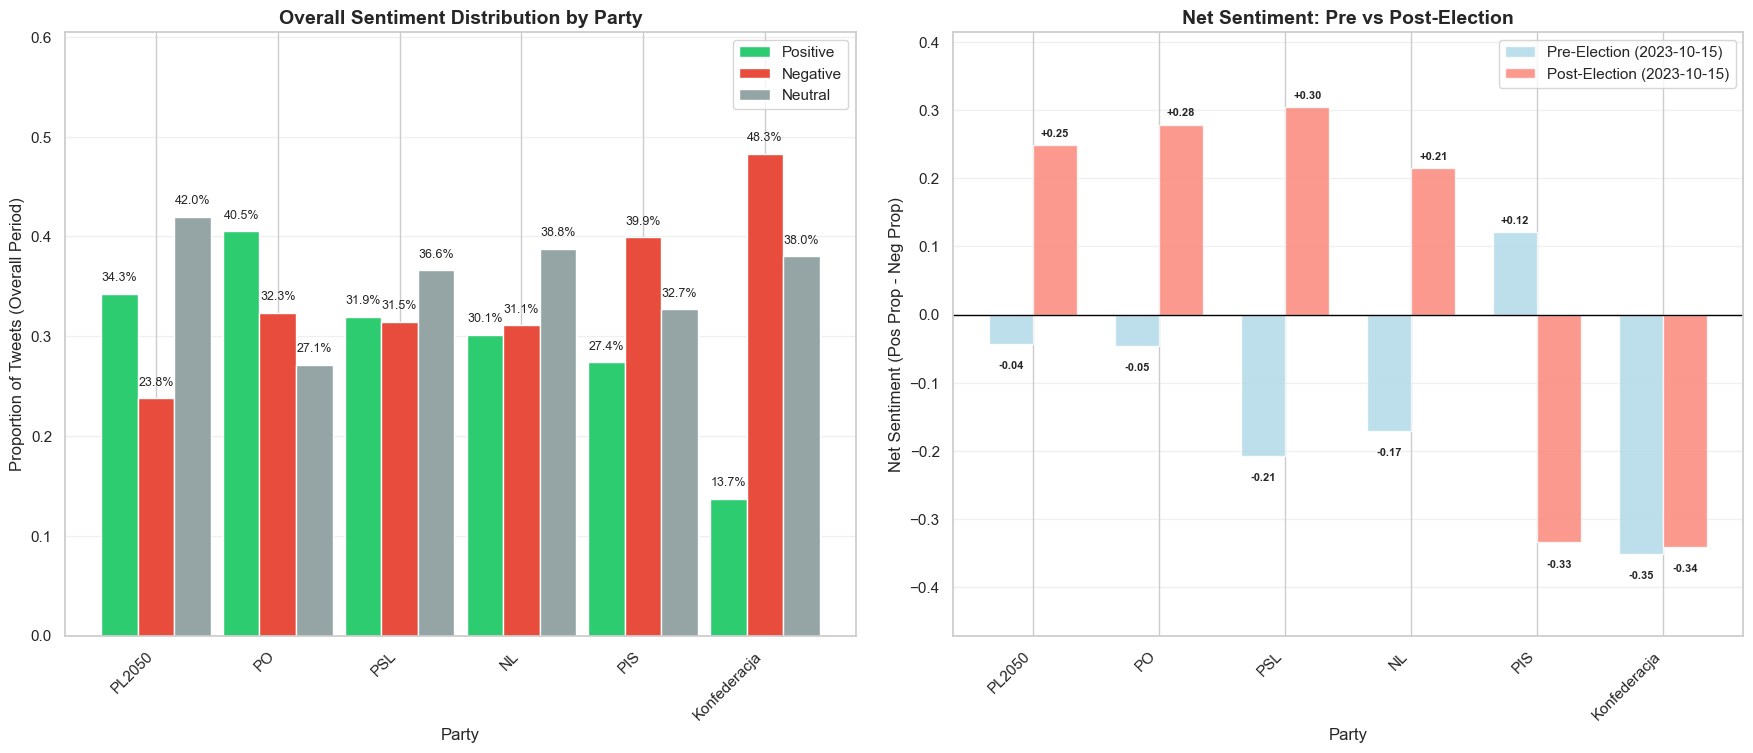


Table: Sentiment Statistics by Party (Overall Period)
Party           Total               Positive               Negative                Neutral   Net Sentiment
               Tweets      Count       Prop      Count       Prop      Count       Prop       (Overall)
PL2050            753        258     34.3%        179     23.8%        316     42.0%          +0.105
PO                829        336     40.5%        268     32.3%        225     27.1%          +0.082
PSL               683        218     31.9%        215     31.5%        250     36.6%          +0.004
NL               1215        366     30.1%        378     31.1%        471     38.8%          -0.010
PIS               902        247     27.4%        360     39.9%        295     32.7%          -0.125
Konfederacja     1691        232     13.7%        816     48.3%        643     38.0%          -0.345

OVERALL          6073                27.3%                36.5%                36.2%          -0.092


In [45]:
# Assuming df_sentiment_results is your DataFrame
# df_sentiment_results needs 'created_at', 'party', 'final_sentiment_label'
plot_sentiment_distribution_by_party_paper_fixed(df_sentiment_results, election_date='2023-10-15')

In [51]:
# ==================================================================================
# PLOT ADDITIONAL: SENTIMENT DISTRIBUTION BY PARTY (MODIFIED FOR SEPARATE PLOTS & N ANNOTATION)
# ==================================================================================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_sentiment_distribution_by_party_paper_fixed_separate(df, election_date='2023-10-15', min_tweets_for_net_sentiment=5):
    """
    Generates two separate plots:
    1. Overall sentiment distribution (proportions) by party.
    2. Net Sentiment Score (Positive Prop - Negative Prop) for Pre-Election vs Post-Election periods by party,
       with N annotations for tweet counts in pre/post periods.
    """
    print("\n" + "="*60)
    print("--- Generating Sentiment Distribution and Net Sentiment Plots (Separate) ---")
    print("="*60)

    if 'created_at' not in df.columns:
        print("ERROR: 'created_at' column is required for Pre/Post election analysis but not found in DataFrame.")
        return
    if 'party' not in df.columns:
        print("ERROR: 'party' column not found in DataFrame.")
        return
    if 'final_sentiment_label' not in df.columns:
        print("ERROR: 'final_sentiment_label' column not found in DataFrame.")
        return

    df_copy = df.copy()
    df_copy['created_at'] = pd.to_datetime(df_copy['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)

    top_parties = df_copy['party'].value_counts().head(8).index.tolist()
    party_stats = []

    for party in top_parties:
        party_data_full = df_copy[df_copy['party'] == party]

        # Overall period calculations
        sentiment_counts_overall = party_data_full['final_sentiment_label'].value_counts()
        total_overall = len(party_data_full)
        pos_prop_overall = sentiment_counts_overall.get('Positive', 0) / total_overall if total_overall > 0 else 0
        neg_prop_overall = sentiment_counts_overall.get('Negative', 0) / total_overall if total_overall > 0 else 0
        neu_prop_overall = sentiment_counts_overall.get('Neutral', 0) / total_overall if total_overall > 0 else 0
        net_sentiment_overall = pos_prop_overall - neg_prop_overall

        # Pre-Election calculations
        pre_election_data = party_data_full[party_data_full['created_at'] < election_dt]
        total_pre = len(pre_election_data)
        net_sentiment_pre = np.nan
        if total_pre >= min_tweets_for_net_sentiment: # Check min tweets for pre-period
            sentiment_counts_pre = pre_election_data['final_sentiment_label'].value_counts()
            pos_prop_pre = sentiment_counts_pre.get('Positive', 0) / total_pre
            neg_prop_pre = sentiment_counts_pre.get('Negative', 0) / total_pre
            net_sentiment_pre = pos_prop_pre - neg_prop_pre
        elif total_pre > 0 : # If some tweets but less than min_tweets_for_net_sentiment
             # Calculate but it might be marked as less reliable or not plotted robustly
            sentiment_counts_pre = pre_election_data['final_sentiment_label'].value_counts()
            pos_prop_pre = sentiment_counts_pre.get('Positive', 0) / total_pre
            neg_prop_pre = sentiment_counts_pre.get('Negative', 0) / total_pre
            net_sentiment_pre = pos_prop_pre - neg_prop_pre # Still calculate for data, plotting can decide
            # Could add a flag here: 'pre_reliable': False

        # Post-Election calculations
        post_election_data = party_data_full[party_data_full['created_at'] >= election_dt]
        total_post = len(post_election_data)
        net_sentiment_post = np.nan
        if total_post >= min_tweets_for_net_sentiment: # Check min tweets for post-period
            sentiment_counts_post = post_election_data['final_sentiment_label'].value_counts()
            pos_prop_post = sentiment_counts_post.get('Positive', 0) / total_post
            neg_prop_post = sentiment_counts_post.get('Negative', 0) / total_post
            net_sentiment_post = pos_prop_post - neg_prop_post
        elif total_post > 0:
            sentiment_counts_post = post_election_data['final_sentiment_label'].value_counts()
            pos_prop_post = sentiment_counts_post.get('Positive', 0) / total_post
            neg_prop_post = sentiment_counts_post.get('Negative', 0) / total_post
            net_sentiment_post = pos_prop_post - neg_prop_post
            # Could add a flag here: 'post_reliable': False


        party_stats.append({
            'Party': party,
            'Total_Tweets_Overall': total_overall, # Renamed for clarity
            'Positive_Count_Overall': sentiment_counts_overall.get('Positive', 0),
            'Negative_Count_Overall': sentiment_counts_overall.get('Negative', 0),
            'Neutral_Count_Overall': sentiment_counts_overall.get('Neutral', 0),
            'Positive_Prop_Overall': pos_prop_overall,
            'Negative_Prop_Overall': neg_prop_overall,
            'Neutral_Prop_Overall': neu_prop_overall,
            'Net_Sentiment_Overall': net_sentiment_overall,
            'Net_Sentiment_Pre': net_sentiment_pre,
            'Total_Tweets_Pre': total_pre, # Store N for Pre
            'Net_Sentiment_Post': net_sentiment_post,
            'Total_Tweets_Post': total_post # Store N for Post
        })

    party_stats = sorted(party_stats, key=lambda x: x['Net_Sentiment_Overall'], reverse=True)
    parties = [s['Party'] for s in party_stats]
    x_indices = np.arange(len(parties))

    # --- PLOT 1: Overall Sentiment Distribution by Party (Separate Figure) ---
    print("\nGenerating Plot 1: Overall Sentiment Distribution...")
    fig1, ax1 = plt.subplots(figsize=(12, 7)) # Adjust figsize for single plot
    pos_props_overall = [s['Positive_Prop_Overall'] for s in party_stats]
    neg_props_overall = [s['Negative_Prop_Overall'] for s in party_stats]
    neu_props_overall = [s['Neutral_Prop_Overall'] for s in party_stats]
    bar_width_ax1 = 0.3

    ax1.bar(x_indices - bar_width_ax1, pos_props_overall, bar_width_ax1, label='Positive', color='#2ecc71')
    ax1.bar(x_indices, neg_props_overall, bar_width_ax1, label='Negative', color='#e74c3c')
    ax1.bar(x_indices + bar_width_ax1, neu_props_overall, bar_width_ax1, label='Neutral', color='#95a5a6')

    # Add value labels for ax1 bars
    for i, bars_group_data in enumerate([pos_props_overall, neg_props_overall, neu_props_overall]):
        offset = (i - 1) * bar_width_ax1 # Calculate x offset for each group of bars
        for j, height in enumerate(bars_group_data):
            if height > 0.01: # Only show if > 1% for clarity
                ax1.text(x_indices[j] + offset, height + 0.01,
                         f'{height:.1%}', ha='center', va='bottom', fontsize=8)

    ax1.set_xlabel('Party', fontsize=12)
    ax1.set_ylabel('Proportion of Tweets (Overall Period)', fontsize=12)
    ax1.set_title('Overall Sentiment Distribution by Party', fontsize=15, fontweight='bold', pad=20)
    ax1.set_xticks(x_indices)
    ax1.set_xticklabels(parties, rotation=45, ha='right', fontsize=10)
    ax1.legend(fontsize=10)
    ax1.grid(axis='y', alpha=0.4, linestyle='--')
    max_prop_val = 0
    if pos_props_overall or neg_props_overall or neu_props_overall: # Check if lists are not empty
        max_prop_val = max(max(pos_props_overall, default=0), max(neg_props_overall, default=0), max(neu_props_overall, default=0), 0.1)
    ax1.set_ylim(0, max_prop_val * 1.15 + 0.05)
    plt.tight_layout()
    plt.show()

    # --- PLOT 2: Net Sentiment by Party (Pre vs Post Election) (Separate Figure) ---
    print("\nGenerating Plot 2: Net Sentiment (Pre vs. Post Election)...")
    fig2, ax2 = plt.subplots(figsize=(12, 7)) # Adjust figsize for single plot
    
    net_sentiments_pre_values = [s.get('Net_Sentiment_Pre', np.nan) for s in party_stats] # Get list, handle missing
    net_sentiments_post_values = [s.get('Net_Sentiment_Post', np.nan) for s in party_stats]
    
    # Filter out parties where pre or post sentiment is NaN (due to not meeting min_tweets_for_net_sentiment)
    # For robust plotting, we'll plot NaNs as zero or skip them. Here, we'll plot what we have and rely on N annotation.
    # Replace NaN with 0 for plotting if you always want a bar, otherwise filter data.
    net_sentiments_pre_plot = [0 if np.isnan(val) else val for val in net_sentiments_pre_values]
    net_sentiments_post_plot = [0 if np.isnan(val) else val for val in net_sentiments_post_values]

    total_tweets_pre_values = [s['Total_Tweets_Pre'] for s in party_stats]
    total_tweets_post_values = [s['Total_Tweets_Post'] for s in party_stats]

    bar_width_ax2 = 0.35

    rects_pre = ax2.bar(x_indices - bar_width_ax2/2, net_sentiments_pre_plot, bar_width_ax2, label=f'Pre-Election ({election_date})', color='skyblue', alpha=0.8)
    rects_post = ax2.bar(x_indices + bar_width_ax2/2, net_sentiments_post_plot, bar_width_ax2, label=f'Post-Election ({election_date})', color='lightcoral', alpha=0.8)

    # Add value labels and N annotations for ax2 bars
    for i, (val_pre, val_post, n_pre, n_post) in enumerate(zip(net_sentiments_pre_plot, net_sentiments_post_plot, total_tweets_pre_values, total_tweets_post_values)):
        # Pre-election bar
        if not np.isnan(net_sentiments_pre_values[i]): # Only annotate if original value was not NaN
            y_val_pre = val_pre
            ax2.text(x_indices[i] - bar_width_ax2/2, y_val_pre + (0.01 if y_val_pre >= 0 else -0.03),
                     f'{y_val_pre:+.2f}\n(N={n_pre})', ha='center', va='bottom' if y_val_pre >= 0 else 'top', fontsize=8, fontweight='bold')
        else: # If original was NaN (below threshold)
             ax2.text(x_indices[i] - bar_width_ax2/2, 0, f'(N={n_pre})', ha='center', va='bottom', fontsize=7, color='grey')


        # Post-election bar
        if not np.isnan(net_sentiments_post_values[i]):
            y_val_post = val_post
            ax2.text(x_indices[i] + bar_width_ax2/2, y_val_post + (0.01 if y_val_post >= 0 else -0.03),
                     f'{y_val_post:+.2f}\n(N={n_post})', ha='center', va='bottom' if y_val_post >= 0 else 'top', fontsize=8, fontweight='bold')
        else:
            ax2.text(x_indices[i] + bar_width_ax2/2, 0, f'(N={n_post})', ha='center', va='bottom', fontsize=7, color='grey')


    ax2.set_xlabel('Party', fontsize=12)
    ax2.set_ylabel('Net Sentiment (Pos Prop - Neg Prop)', fontsize=12)
    ax2.set_title(f'Net Sentiment: Pre vs Post-Election (Min N={min_tweets_for_net_sentiment} for score)', fontsize=15, fontweight='bold', pad=20)
    ax2.set_xticks(x_indices)
    ax2.set_xticklabels(parties, rotation=45, ha='right', fontsize=10)
    ax2.axhline(0, color='black', linewidth=1, linestyle='--')
    ax2.legend(fontsize=10)
    ax2.grid(axis='y', alpha=0.4, linestyle='--')
    
    min_val_net = 0
    max_val_net = 0
    if net_sentiments_pre_plot or net_sentiments_post_plot: # Check if lists are not empty
        min_val_net = min(min(net_sentiments_pre_plot, default=0), min(net_sentiments_post_plot, default=0))
        max_val_net = max(max(net_sentiments_pre_plot, default=0), max(net_sentiments_post_plot, default=0))
    
    ax2.set_ylim(min(min_val_net * 1.2 - 0.1, -0.15), max(max_val_net * 1.2 + 0.1, 0.15)) # Adjusted y-lim for better view of N

    plt.tight_layout()
    plt.show()

    # Print detailed statistics table (reflects overall period stats)
    print("\nTable: Sentiment Statistics by Party (Overall Period)")
    print("="*125) # Adjusted width
    print(f"{'Party':<15} {'Total (Ovr)':>12} {'Pos (Ovr)':>18} {'Neg (Ovr)':>18} {'Neu (Ovr)':>18} {'Net Sent (Ovr)':>18} {'Net Sent (Pre)':>15} {'Net Sent (Post)':>15}")
    print(f"{'':<15} {'Tweets':>12} {'Count (%)':>18} {'Count (%)':>18} {'Count (%)':>18} {'(Prop)':>18} {'(N Pre)':>15} {'(N Post)':>15}")
    print("="*125)

    for s in party_stats:
        pre_net_display = f"{s['Net_Sentiment_Pre']:+.3f} (N={s['Total_Tweets_Pre']})" if not np.isnan(s['Net_Sentiment_Pre']) else f"NaN (N={s['Total_Tweets_Pre']})"
        post_net_display = f"{s['Net_Sentiment_Post']:+.3f} (N={s['Total_Tweets_Post']})" if not np.isnan(s['Net_Sentiment_Post']) else f"NaN (N={s['Total_Tweets_Post']})"
        
        print(f"{s['Party']:<15} {s['Total_Tweets_Overall']:>12} "
              f"{s['Positive_Count_Overall']:>7} ({s['Positive_Prop_Overall']:>6.1%}) "
              f"{s['Negative_Count_Overall']:>7} ({s['Negative_Prop_Overall']:>6.1%}) "
              f"{s['Neutral_Count_Overall']:>7} ({s['Neutral_Prop_Overall']:>6.1%}) "
              f"{s['Net_Sentiment_Overall']:>+18.3f} "
              f"{pre_net_display:>15} "
              f"{post_net_display:>15}")
    print("="*125)

    # Overall summary (remains the same, based on overall proportions)
    total_tweets_all_parties = sum(s['Total_Tweets_Overall'] for s in party_stats)
    if total_tweets_all_parties > 0:
        overall_avg_pos_prop = sum(s['Positive_Count_Overall'] for s in party_stats) / total_tweets_all_parties
        overall_avg_neg_prop = sum(s['Negative_Count_Overall'] for s in party_stats) / total_tweets_all_parties
        overall_avg_neu_prop = sum(s['Neutral_Count_Overall'] for s in party_stats) / total_tweets_all_parties
        overall_net_sentiment = overall_avg_pos_prop - overall_avg_neg_prop
        print(f"\n{'ALL PARTIES':<15} {total_tweets_all_parties:>12} "
              f"{' ':>7} ({overall_avg_pos_prop:>6.1%}) {' ':>7} ({overall_avg_neg_prop:>6.1%}) {' ':>7} ({overall_avg_neu_prop:>6.1%}) "
              f"{overall_net_sentiment:>+18.3f}")
    print("="*125)

Attempting to generate plots with default settings...

--- Generating Sentiment Distribution and Net Sentiment Plots (Separate) ---

Generating Plot 1: Overall Sentiment Distribution...


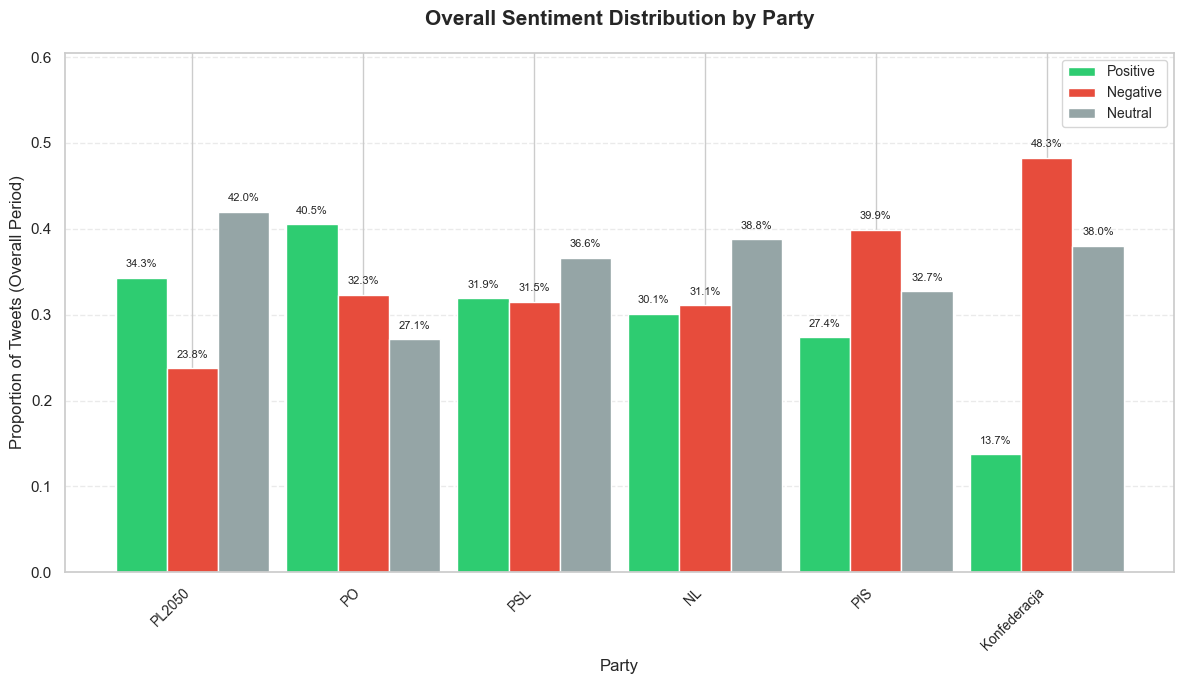


Generating Plot 2: Net Sentiment (Pre vs. Post Election)...


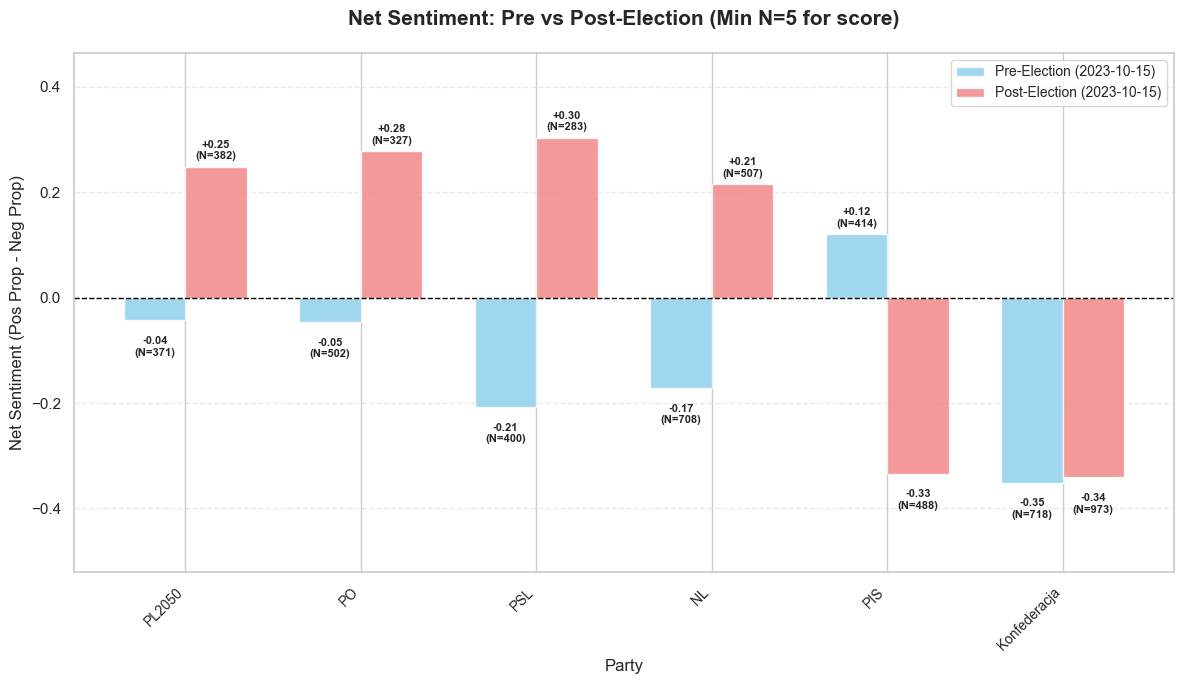


Table: Sentiment Statistics by Party (Overall Period)
Party            Total (Ovr)          Pos (Ovr)          Neg (Ovr)          Neu (Ovr)     Net Sent (Ovr)  Net Sent (Pre) Net Sent (Post)
                      Tweets          Count (%)          Count (%)          Count (%)             (Prop)         (N Pre)        (N Post)
PL2050                   753     258 ( 34.3%)     179 ( 23.8%)     316 ( 42.0%)             +0.105  -0.043 (N=371)  +0.249 (N=382)
PO                       829     336 ( 40.5%)     268 ( 32.3%)     225 ( 27.1%)             +0.082  -0.046 (N=502)  +0.278 (N=327)
PSL                      683     218 ( 31.9%)     215 ( 31.5%)     250 ( 36.6%)             +0.004  -0.208 (N=400)  +0.304 (N=283)
NL                      1215     366 ( 30.1%)     378 ( 31.1%)     471 ( 38.8%)             -0.010  -0.171 (N=708)  +0.215 (N=507)
PIS                      902     247 ( 27.4%)     360 ( 39.9%)     295 ( 32.7%)             -0.125  +0.121 (N=414)  -0.334 (N=488)
Konfederacja    

In [52]:
# --- Step 1: Paste the entire function definition here or ensure it's executed in a prior cell ---
# (The function definition starting with...)
# def plot_sentiment_distribution_by_party_paper_fixed_separate(df, election_date='2023-10-15', min_tweets_for_net_sentiment=5):
#     """
#     Generates two separate plots...
#     """
#     # ... (all the code for the function) ...
#     # ... (ending with the overall summary print) ...

# --- Step 2: Ensure your DataFrame is loaded and ready ---
# For example, if your DataFrame is named df_sentiment_results:
# df_sentiment_results = pd.read_csv('your_data.csv') # Or however you get your data

# --- Step 3: Call the function ---

# Make sure your DataFrame variable name is correct (e.g., df_sentiment_results)
# and that it exists and is a pandas DataFrame.
if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame):
    print("Attempting to generate plots with default settings...")
    plot_sentiment_distribution_by_party_paper_fixed_separate(df_sentiment_results)

    # --- Example with custom parameters ---
    # print("\nAttempting to generate plots with a different election date and minimum tweets threshold...")
    # plot_sentiment_distribution_by_party_paper_fixed_separate(
    #     df_sentiment_results,
    #     election_date='2024-06-09',  # Example: European Parliament elections
    #     min_tweets_for_net_sentiment=10
    # )
else:
    print("ERROR: DataFrame 'df_sentiment_results' is not defined or is not a pandas DataFrame.")
    print("Please make sure you have loaded your data into a DataFrame with that name,")
    print("or update the function call with the correct DataFrame name.")

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches

# Set better default styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ==================================================================================
# PLOT 1: CLEAN SENTIMENT EVOLUTION LINES
# ==================================================================================

def plot_sentiment_evolution_clean(df, election_date='2023-10-15', top_n=6):
    """
    Clean line plots showing sentiment evolution with focus on key changes
    """
    print("\n" + "="*60)
    print("--- Clean Sentiment Evolution ---")
    print("="*60)
    
    # Prepare data
    df_analysis = df.copy()
    df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)
    
    top_parties = df_analysis['party'].value_counts().head(top_n).index
    
    # Create figure with better spacing
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes_flat = axes.flatten()
    
    # Better color scheme
    colors = {
        'Positive': '#27AE60',  # Green
        'Negative': '#E74C3C',  # Red
        'Net': '#3498DB'        # Blue
    }
    
    for idx, party in enumerate(top_parties):
        ax = axes_flat[idx]
        party_data = df_analysis[df_analysis['party'] == party]
        
        # Weekly aggregation
        weekly = party_data.groupby([
            pd.Grouper(key='created_at', freq='W'),
            'final_sentiment_label'
        ]).size().unstack(fill_value=0)
        
        if not weekly.empty:
            # Calculate proportions
            total = weekly.sum(axis=1)
            props = weekly.div(total, axis=0) * 100
            
            # Calculate net sentiment (Positive - Negative)
            net_sentiment = props.get('Positive', 0) - props.get('Negative', 0)
            
            # Apply smoothing
            if len(props) > 5:
                pos_smooth = gaussian_filter1d(props.get('Positive', 0), sigma=1.5)
                neg_smooth = gaussian_filter1d(props.get('Negative', 0), sigma=1.5)
                net_smooth = gaussian_filter1d(net_sentiment, sigma=1.5)
            else:
                pos_smooth = props.get('Positive', 0)
                neg_smooth = props.get('Negative', 0)
                net_smooth = net_sentiment
            
            # Plot lines
            ax.plot(props.index, pos_smooth, color=colors['Positive'], 
                   linewidth=2.5, label='Positive', alpha=0.8)
            ax.plot(props.index, neg_smooth, color=colors['Negative'], 
                   linewidth=2.5, label='Negative', alpha=0.8)
            ax.plot(props.index, net_smooth, color=colors['Net'], 
                   linewidth=3, label='Net Sentiment', linestyle='--')
            
            # Add zero line
            ax.axhline(0, color='gray', linestyle='-', alpha=0.3)
            
            # Add election line
            ax.axvline(election_dt, color='black', linestyle='--', 
                      linewidth=2, alpha=0.7, label='Election')
            
            # Shade pre/post election periods
            ax.axvspan(props.index.min(), election_dt, alpha=0.1, color='gray')
            
            # Calculate and show key metric
            pre_net = net_sentiment[net_sentiment.index < election_dt].mean()
            post_net = net_sentiment[net_sentiment.index >= election_dt].mean()
            change = post_net - pre_net
            
            # Add annotation box
            textstr = f'Net Change: {change:+.1f}pp'
            props_box = dict(boxstyle='round', facecolor='white', 
                            edgecolor='gray', alpha=0.9)
            ax.text(0.95, 0.95, textstr, transform=ax.transAxes, 
                   fontsize=12, verticalalignment='top', 
                   horizontalalignment='right', bbox=props_box)
            
            # Styling
            ax.set_title(party, fontsize=16, fontweight='bold', pad=10)
            ax.set_ylabel('Percentage (%)', fontsize=12)
            ax.set_ylim(-60, 60)
            ax.grid(True, alpha=0.3)
            ax.set_xlabel('')
            
            if idx == 0:
                ax.legend(loc='lower left', fontsize=11, framealpha=0.9)
    
    # Remove empty subplots
    for idx in range(top_n, len(axes_flat)):
        fig.delaxes(axes_flat[idx])
    
    # Overall title
    fig.suptitle('Sentiment Evolution: Net Sentiment Tracker', 
                fontsize=20, fontweight='bold', y=0.98)
    
    # Rotate x labels
    for ax in axes_flat[:top_n]:
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# ==================================================================================
# PLOT 2: SENTIMENT SHIFT HEATMAP
# ==================================================================================

def plot_sentiment_shift_heatmap(df, election_date='2023-10-15'):
    """
    Heatmap showing sentiment shifts across different time windows
    """
    print("\n" + "="*60)
    print("--- Sentiment Shift Heatmap ---")
    print("="*60)
    
    df_analysis = df.copy()
    df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)
    
    # Time windows to analyze
    windows = {
        '4 weeks': 28,
        '3 months': 90,
        '6 months': 180,
        'Full period': None
    }
    
    top_parties = df_analysis['party'].value_counts().head(6).index
    
    # Prepare data for heatmap
    heatmap_data = []
    
    for party in top_parties:
        party_data = df_analysis[df_analysis['party'] == party]
        
        for window_name, days in windows.items():
            if days is None:
                pre_data = party_data[party_data['created_at'] < election_dt]
                post_data = party_data[party_data['created_at'] >= election_dt]
            else:
                window_delta = pd.Timedelta(days=days)
                pre_data = party_data[(party_data['created_at'] >= election_dt - window_delta) & 
                                    (party_data['created_at'] < election_dt)]
                post_data = party_data[(party_data['created_at'] >= election_dt) & 
                                     (party_data['created_at'] < election_dt + window_delta)]
            
            if len(pre_data) > 10 and len(post_data) > 10:
                # Calculate net sentiment change
                pre_pos = (pre_data['final_sentiment_label'] == 'Positive').mean()
                pre_neg = (pre_data['final_sentiment_label'] == 'Negative').mean()
                post_pos = (post_data['final_sentiment_label'] == 'Positive').mean()
                post_neg = (post_data['final_sentiment_label'] == 'Negative').mean()
                
                net_change = (post_pos - post_neg) - (pre_pos - pre_neg)
                
                heatmap_data.append({
                    'Party': party,
                    'Window': window_name,
                    'Net_Change': net_change * 100  # Convert to percentage
                })
    
    # Create DataFrame and pivot
    heatmap_df = pd.DataFrame(heatmap_data)
    pivot_df = heatmap_df.pivot(index='Party', columns='Window', values='Net_Change')
    
    # Reorder columns
    column_order = ['4 weeks', '3 months', '6 months', 'Full period']
    pivot_df = pivot_df[column_order]
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Use diverging colormap centered at 0
    sns.heatmap(pivot_df, annot=True, fmt='.1f', cmap='RdYlGn', 
                center=0, vmin=-30, vmax=30,
                cbar_kws={'label': 'Net Sentiment Change (pp)'},
                annot_kws={'fontsize': 12, 'fontweight': 'bold'},
                linewidths=1, linecolor='white')
    
    ax.set_title('Net Sentiment Change by Time Window\n(Post-Election vs Pre-Election)', 
                fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Time Window', fontsize=14)
    ax.set_ylabel('Political Party', fontsize=14)
    
    # Rotate labels
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')
    plt.setp(ax.get_yticklabels(), rotation=0, ha='right')
    
    plt.tight_layout()
    plt.show()

# ==================================================================================
# PLOT 3: SENTIMENT MOMENTUM CHART
# ==================================================================================

def plot_sentiment_momentum(df, election_date='2023-10-15'):
    """
    Shows momentum (rate of change) in sentiment
    """
    print("\n" + "="*60)
    print("--- Sentiment Momentum Analysis ---")
    print("="*60)
    
    df_analysis = df.copy()
    df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)
    
    top_parties = df_analysis['party'].value_counts().head(6).index
    
    # Create figure
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Colors for parties
    party_colors = plt.cm.Set3(np.linspace(0, 1, len(top_parties)))
    
    for idx, party in enumerate(top_parties):
        party_data = df_analysis[df_analysis['party'] == party]
        
        # Weekly aggregation
        weekly = party_data.groupby(pd.Grouper(key='created_at', freq='W'))['final_sentiment_label'].apply(
            lambda x: ((x == 'Positive').sum() - (x == 'Negative').sum()) / len(x) * 100
        )
        
        if len(weekly) > 3:
            # Smooth the data
            smoothed = gaussian_filter1d(weekly.values, sigma=1)
            
            # Calculate momentum (derivative)
            momentum = np.gradient(smoothed)
            
            # Plot momentum
            ax.plot(weekly.index, momentum, label=party, 
                   color=party_colors[idx], linewidth=2.5, alpha=0.8)
    
    # Add zero line and election line
    ax.axhline(0, color='black', linestyle='-', alpha=0.3)
    ax.axvline(election_dt, color='red', linestyle='--', linewidth=2, 
              alpha=0.7, label='Election')
    
    # Shade momentum zones
    ax.fill_between(ax.get_xlim(), 0, ax.get_ylim()[1], 
                   color='green', alpha=0.1, label='Positive Momentum')
    ax.fill_between(ax.get_xlim(), ax.get_ylim()[0], 0, 
                   color='red', alpha=0.1, label='Negative Momentum')
    
    # Styling
    ax.set_title('Sentiment Momentum: Rate of Change in Net Sentiment', 
                fontsize=18, fontweight='bold')
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Momentum (pp/week)', fontsize=14)
    ax.legend(loc='best', fontsize=11, ncol=2)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ==================================================================================
# PLOT 4: WINNER/LOSER ANALYSIS
# ==================================================================================

def plot_winners_losers(df, election_date='2023-10-15'):
    """
    Clear winner/loser visualization
    """
    print("\n" + "="*60)
    print("--- Winners and Losers Analysis ---")
    print("="*60)
    
    df_analysis = df.copy()
    df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)
    
    # Split data
    pre_election = df_analysis[df_analysis['created_at'] < election_dt]
    post_election = df_analysis[df_analysis['created_at'] >= election_dt]
    
    top_parties = df_analysis['party'].value_counts().head(6).index
    
    # Calculate changes
    results = []
    for party in top_parties:
        pre_party = pre_election[pre_election['party'] == party]
        post_party = post_election[post_election['party'] == party]
        
        if len(pre_party) > 0 and len(post_party) > 0:
            # Net sentiment
            pre_net = ((pre_party['final_sentiment_label'] == 'Positive').sum() - 
                      (pre_party['final_sentiment_label'] == 'Negative').sum()) / len(pre_party)
            post_net = ((post_party['final_sentiment_label'] == 'Positive').sum() - 
                       (post_party['final_sentiment_label'] == 'Negative').sum()) / len(post_party)
            
            change = (post_net - pre_net) * 100
            
            results.append({
                'Party': party,
                'Change': change,
                'Category': 'Winner' if change > 0 else 'Loser'
            })
    
    # Sort by change
    results = sorted(results, key=lambda x: x['Change'], reverse=True)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    parties = [r['Party'] for r in results]
    changes = [r['Change'] for r in results]
    colors = ['#27AE60' if c > 0 else '#E74C3C' for c in changes]
    
    # Create bars
    bars = ax.barh(parties, changes, color=colors, alpha=0.8, height=0.6)
    
    # Add value labels
    for bar, result in zip(bars, results):
        width = bar.get_width()
        label = f"{width:+.1f}pp"
        ax.text(width + (1 if width > 0 else -1), bar.get_y() + bar.get_height()/2,
                label, ha='left' if width > 0 else 'right', va='center',
                fontsize=14, fontweight='bold')
    
    # Add winner/loser labels
    ax.text(0.02, 0.98, 'WINNERS', transform=ax.transAxes, 
           fontsize=16, fontweight='bold', color='#27AE60',
           verticalalignment='top')
    ax.text(0.02, 0.02, 'LOSERS', transform=ax.transAxes, 
           fontsize=16, fontweight='bold', color='#E74C3C',
           verticalalignment='bottom')
    
    # Styling
    ax.axvline(0, color='black', linewidth=2)
    ax.set_xlabel('Net Sentiment Change (percentage points)', fontsize=14)
    ax.set_title('Post-Election Sentiment: Winners and Losers', 
                fontsize=20, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    ax.set_xlim(-60, 60)
    
    # Add divider line between winners and losers
    for i, change in enumerate(changes):
        if i > 0 and changes[i-1] > 0 and change < 0:
            ax.axhline(i - 0.5, color='gray', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

# ==================================================================================
# PLOT 5: SENTIMENT COMPOSITION DONUT CHARTS
# ==================================================================================

def plot_sentiment_donuts(df, election_date='2023-10-15'):
    """
    Donut charts showing sentiment composition change
    """
    print("\n" + "="*60)
    print("--- Sentiment Composition Analysis ---")
    print("="*60)
    
    df_analysis = df.copy()
    df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
    election_dt = pd.to_datetime(election_date, utc=True)
    
    top_parties = df_analysis['party'].value_counts().head(6).index
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes_flat = axes.flatten()
    
    colors = ['#27AE60', '#E74C3C', '#95A5A6']  # Positive, Negative, Neutral
    
    for idx, party in enumerate(top_parties):
        ax = axes_flat[idx]
        
        party_data = df_analysis[df_analysis['party'] == party]
        pre_data = party_data[party_data['created_at'] < election_dt]
        post_data = party_data[party_data['created_at'] >= election_dt]
        
        if len(pre_data) > 0 and len(post_data) > 0:
            # Get proportions
            pre_props = pre_data['final_sentiment_label'].value_counts(normalize=True)
            post_props = post_data['final_sentiment_label'].value_counts(normalize=True)
            
            # Ensure all sentiments are present
            sentiments = ['Positive', 'Negative', 'Neutral']
            pre_values = [pre_props.get(s, 0) for s in sentiments]
            post_values = [post_props.get(s, 0) for s in sentiments]
            
            # Create nested donut chart
            size = 0.3
            
            # Inner ring (pre-election)
            wedges1, texts1 = ax.pie(pre_values, radius=1-size, colors=colors,
                                     wedgeprops=dict(width=size, edgecolor='white'))
            
            # Outer ring (post-election)
            wedges2, texts2 = ax.pie(post_values, radius=1, colors=colors,
                                     wedgeprops=dict(width=size, edgecolor='white'))
            
            # Add center text
            net_change = (post_values[0] - post_values[1]) - (pre_values[0] - pre_values[1])
            center_text = f'{net_change:+.0%}'
            ax.text(0, 0, center_text, ha='center', va='center', 
                   fontsize=20, fontweight='bold',
                   color='#27AE60' if net_change > 0 else '#E74C3C')
            
            # Title
            ax.set_title(f'{party}\nInner: Pre | Outer: Post', 
                        fontsize=14, fontweight='bold')
    
    # Remove empty subplots
    for idx in range(len(top_parties), len(axes_flat)):
        fig.delaxes(axes_flat[idx])
    
    # Add legend
    legend_elements = [mpatches.Patch(color=colors[0], label='Positive'),
                      mpatches.Patch(color=colors[1], label='Negative'),
                      mpatches.Patch(color=colors[2], label='Neutral')]
    fig.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, 0.02), 
              ncol=3, fontsize=12)
    
    plt.suptitle('Sentiment Composition: Pre vs Post Election', 
                fontsize=20, fontweight='bold')
    plt.tight_layout()
    plt.show()

# ==================================================================================
# RUN ALL IMPROVED VISUALIZATIONS
# ==================================================================================

def run_improved_analysis(df):
    """
    Run all improved visualizations
    """
    print("\n" + "="*60)
    print("RUNNING IMPROVED SENTIMENT ANALYSIS")
    print("="*60)
    
    # 1. Clean evolution lines
    plot_sentiment_evolution_clean(df)
    
    # 2. Heatmap
    plot_sentiment_shift_heatmap(df)
    
    # 3. Momentum chart
    plot_sentiment_momentum(df)
    
    # 4. Winners/Losers
    plot_winners_losers(df)
    
    # 5. Donut charts
    plot_sentiment_donuts(df)
    
    print("\n" + "="*60)
    print("ANALYSIS COMPLETE!")
    print("="*60)


RUNNING IMPROVED SENTIMENT ANALYSIS

--- Clean Sentiment Evolution ---


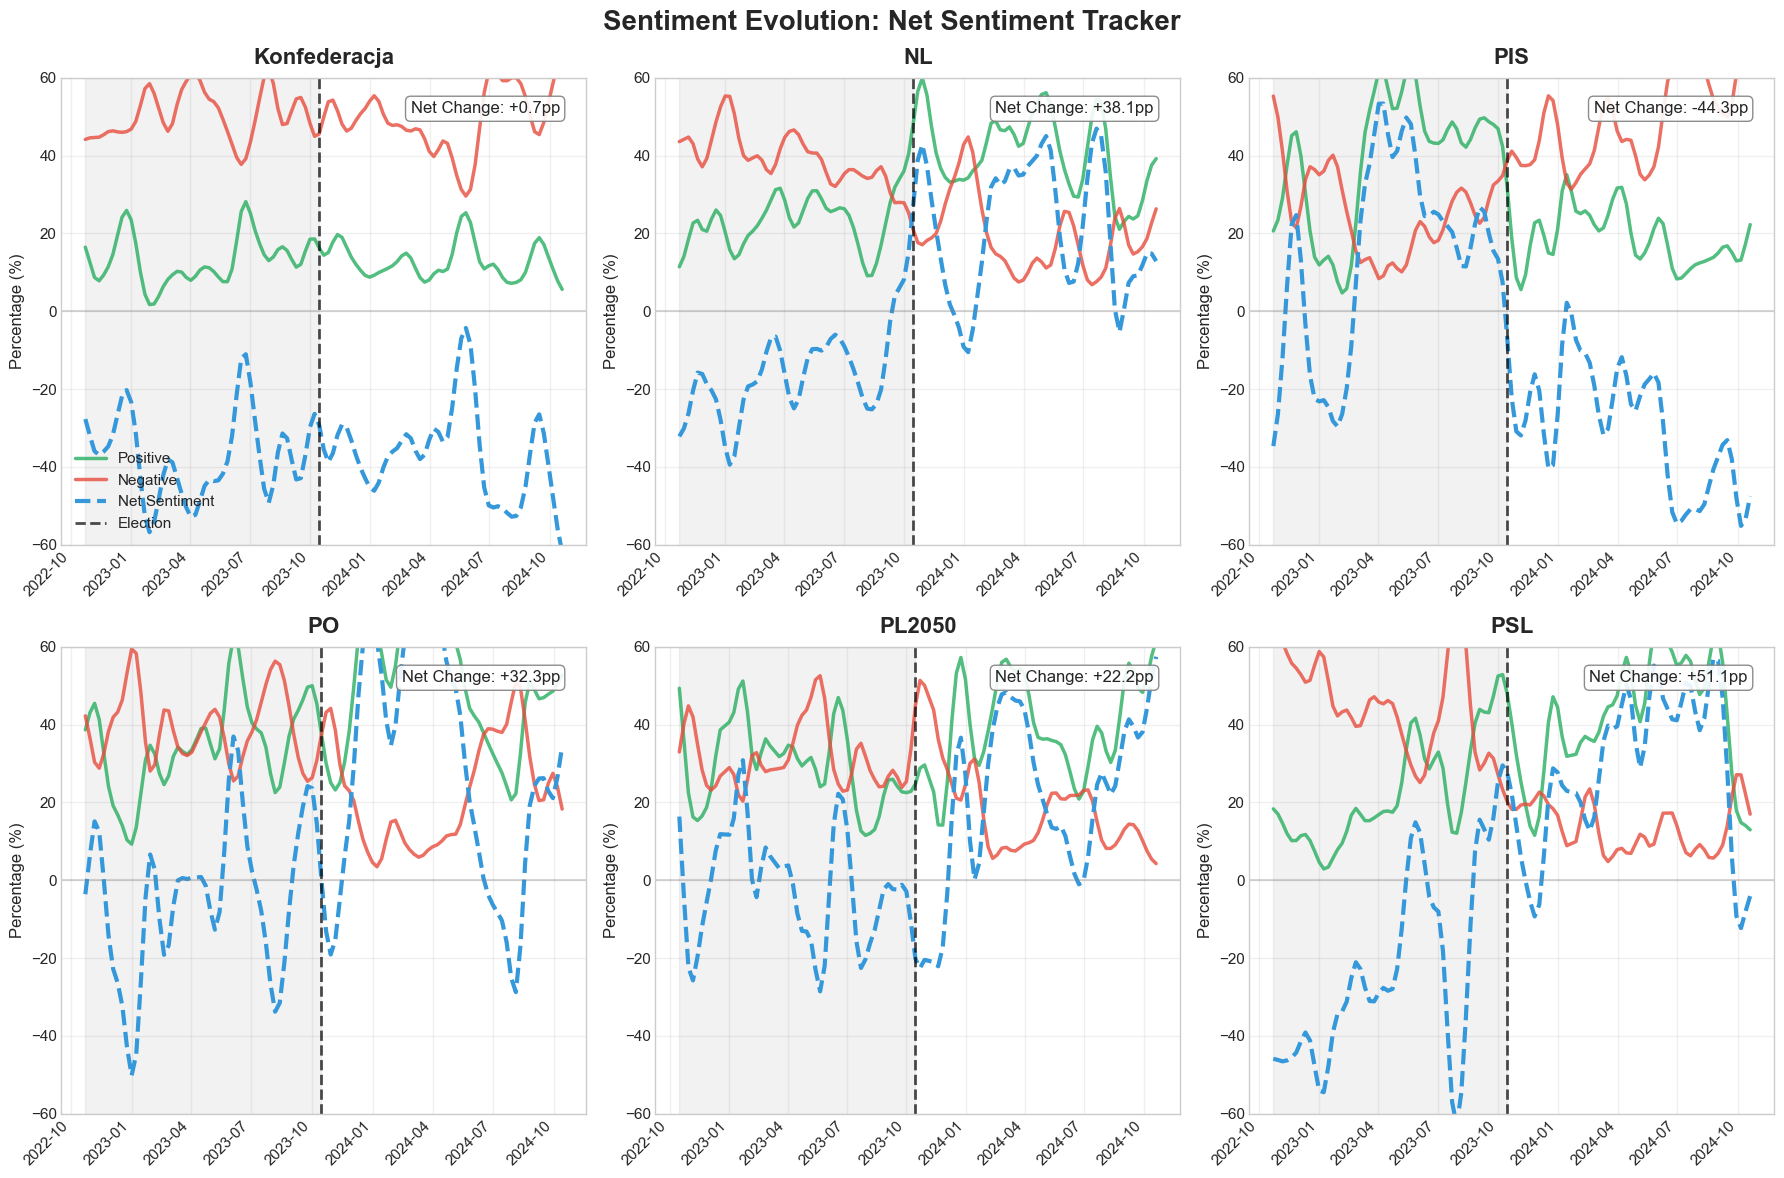


--- Sentiment Shift Heatmap ---


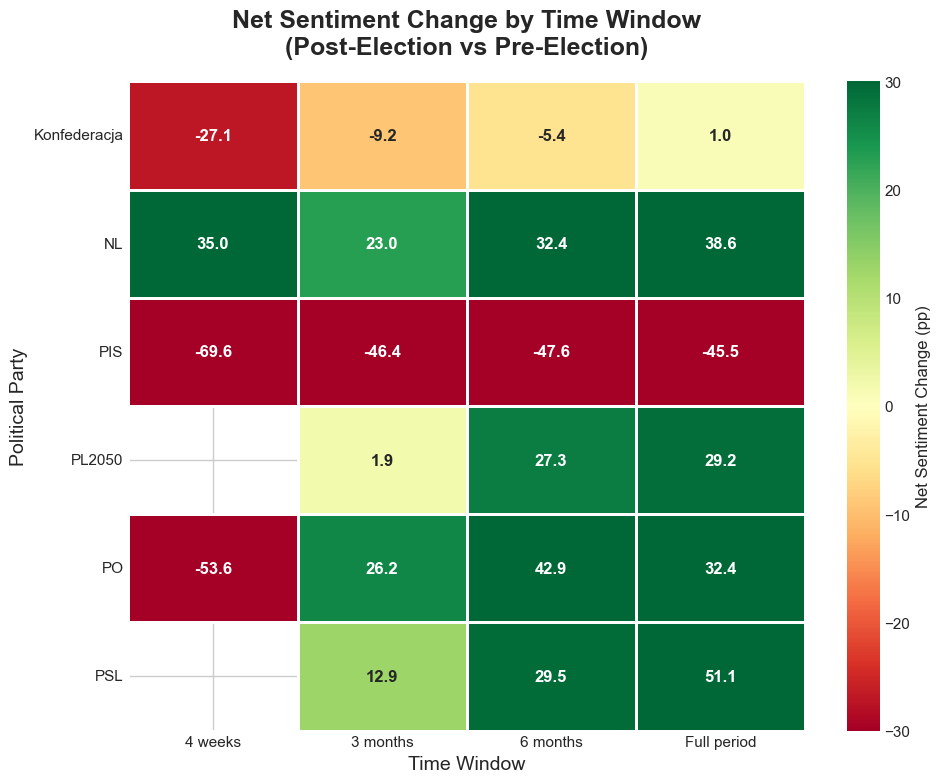


--- Sentiment Momentum Analysis ---


C:\Users\macie\AppData\Local\Temp\ipykernel_2724\2868472376.py:244: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: ((x == 'Positive').sum() - (x == 'Negative').sum()) / len(x) * 100


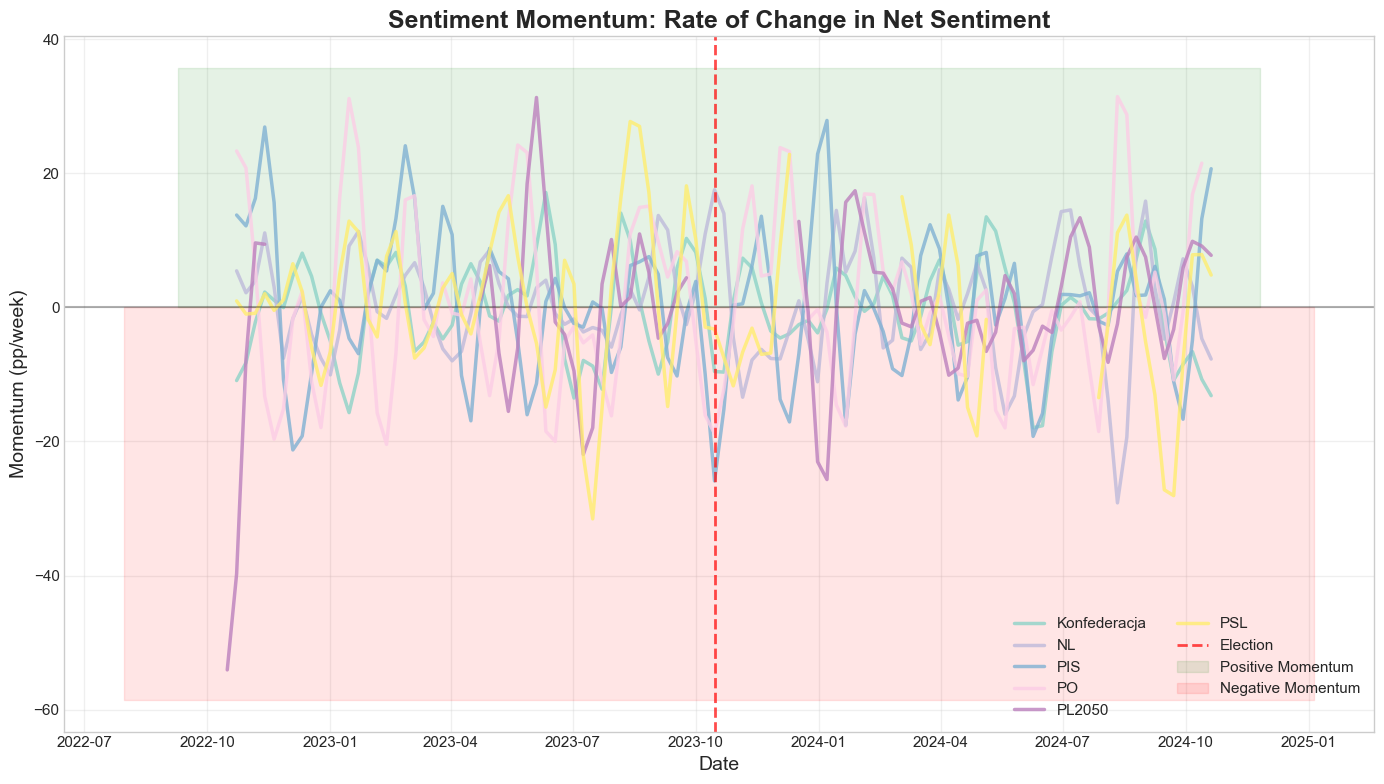


--- Winners and Losers Analysis ---


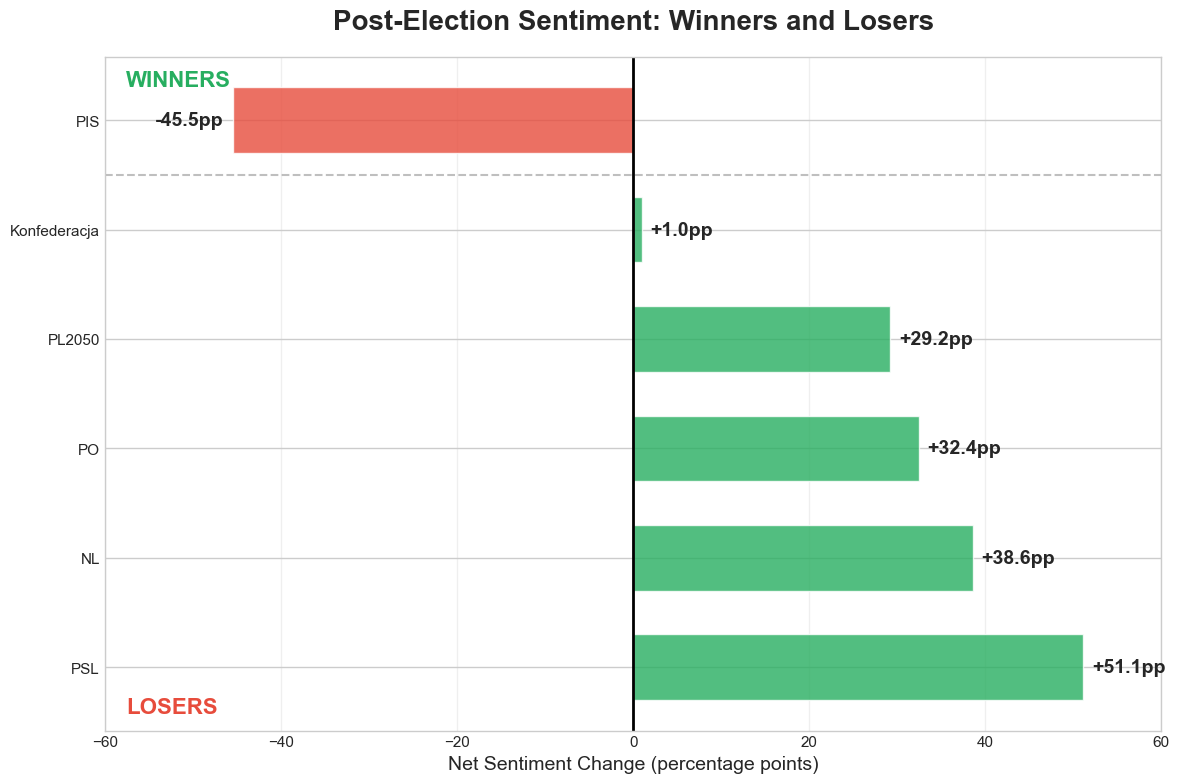


--- Sentiment Composition Analysis ---


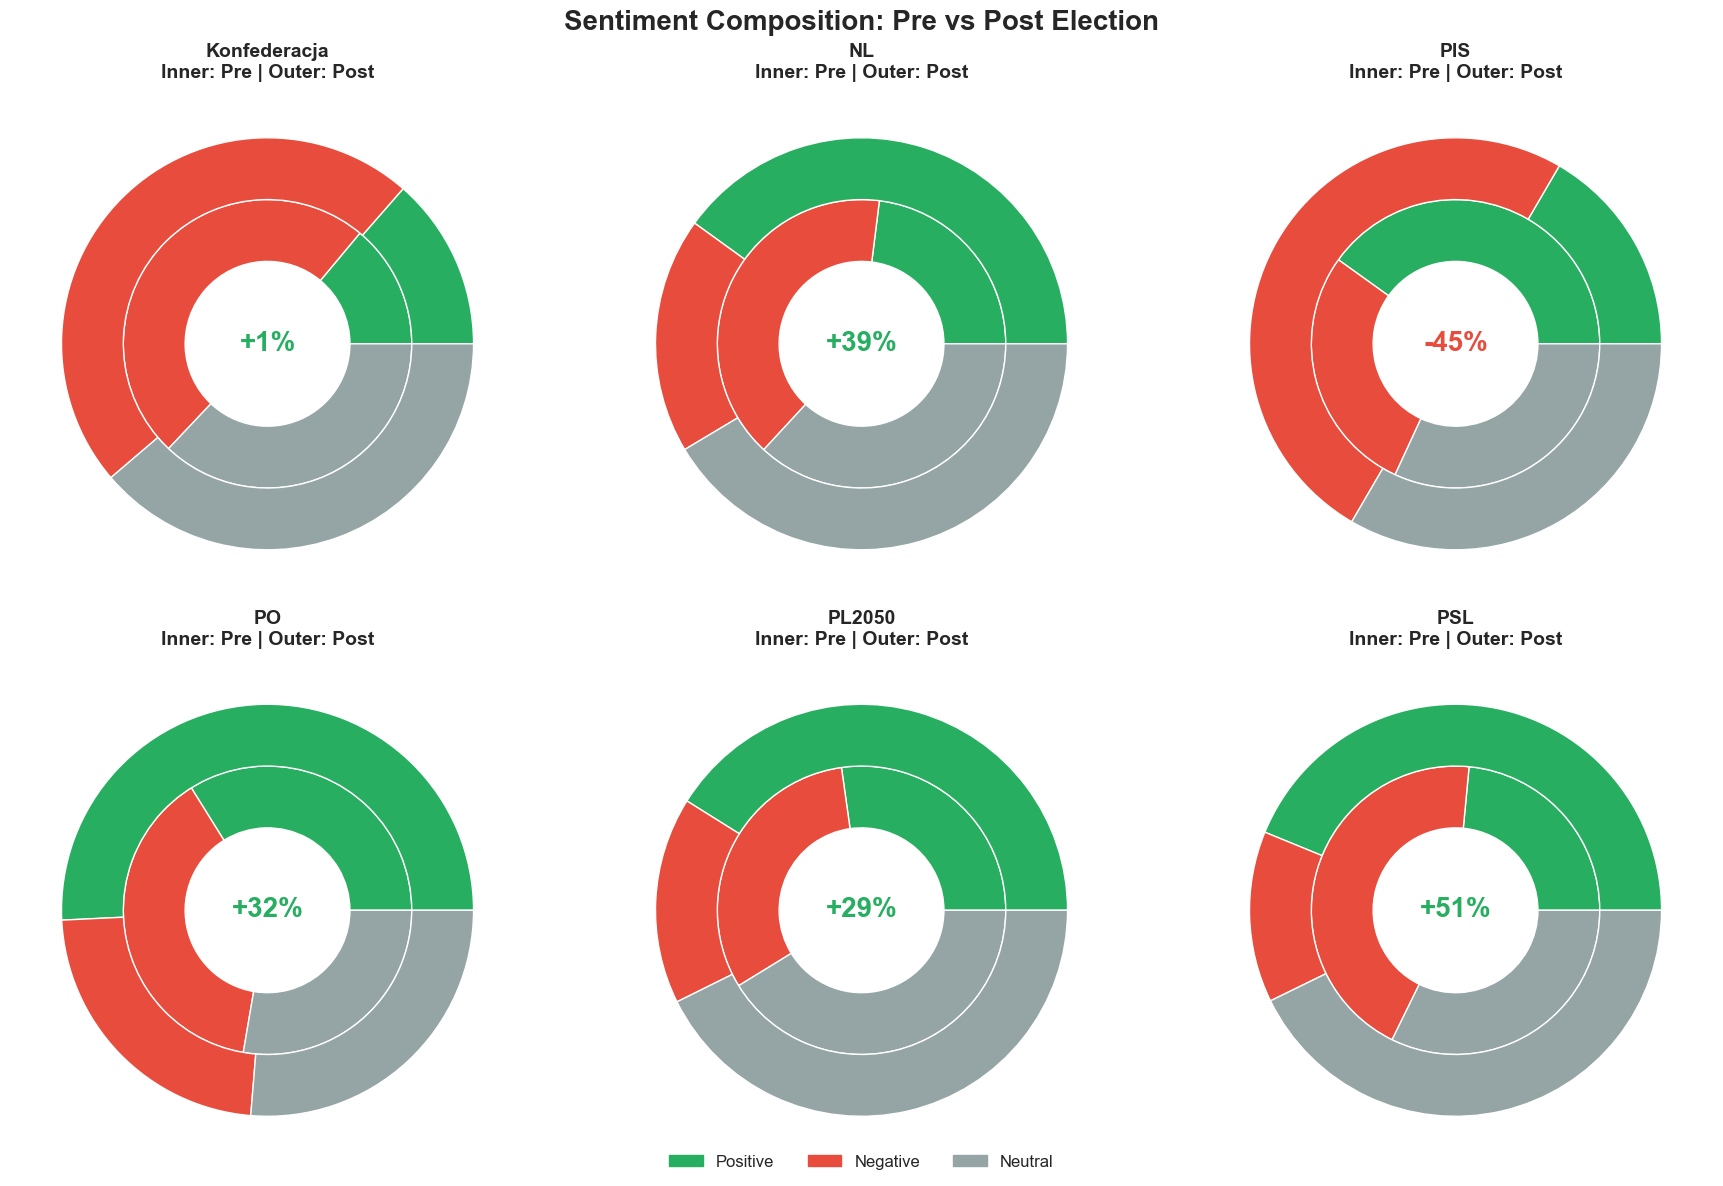


ANALYSIS COMPLETE!


In [80]:
# Run all improved visualizations
run_improved_analysis(df_sentiment_results)

Sentiment codes done, full economic words analysis is done.